In [1]:
###############################
#Author: Ayse Dincer
#Script for creating plots of maximum p-values of each node
###############################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib.ticker import MaxNLocator

/homes/gws/abdincer/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Define cancer types and names
cancer_types = ['BRCA', 'AML', 
                'COLON', 'LUNG', 
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'SKIN', 'PROSTATE',
                'THYROID', 'UTERINE', 
                'HEAD_NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

cancer_names = ['BREAST', 'AML',
                'COLORECTAL', 'LUNG',
                'BRAIN', 'OV', 
                'SARCOMA', 'KIDNEY', 
                'LIVER', 'STOMACH', 
                'MELANOMA', 'PROSTATE',
                'THYROID', 'UTERINE', 
                'HEAD&NECK', 'PANCREAS',
                'CERVICAL', 'BLADDER']

method_names = ['RP', 'PCA', 'ICA', 'AE', 'DAE', 'DeepProfile']


In [3]:
#Method for calculating number of pathways captured
def pathway_counts(method, start, end, cancer_type):
    
    thresholds = np.arange(1, 11, step = 1)
    print("thresholds ", thresholds)
    
    input_folder = '../../ALL_CANCER_FILES/' + cancer_type + '/PATHWAY_FILES/'  
   
    L = 150
    counts_ALL = np.zeros((len(thresholds), end - start))
    for run in range(start, end):
        data_df = pd.read_table(input_folder + cancer_type + '_FISHER_FDR_CORRECTED_PVALS_C2_' + method + '_' + str(run + 1) + '.tsv', index_col = 0)
        print("P-values dataframe ", data_df.shape)

        #Record the number of nodes with coverage above threhold
        counts = np.zeros(len(thresholds))
        for t in range(len(thresholds)):
            threshold = thresholds[t]
            best_pvals_for_nodes = -1 * np.log10(np.min(data_df.values, axis = 1))
            count = len(np.where(best_pvals_for_nodes > threshold)[0])
            counts[t] = count
        
        print(counts)
        counts_ALL[:, run] = counts / 150

    #Record average count
    return np.mean(counts_ALL, axis = 1)

In [4]:
#Method for creating plots for each cancer type
def createPlot(cancer_type):

    #Set plot borders
    import matplotlib as mpl
    mpl.rcParams['axes.linewidth'] = 5
    
    #Set font sizes of plot
    SMALL_SIZE = 250
    MEDIUM_SIZE = 300
    BIGGER_SIZE = 350

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    
    #1) DEEPPROFILE
    DP_counts = pathway_counts('DeepProfile', 0, 1, cancer_type)
    
    #2) PCA
    PCA_counts = pathway_counts('PCA', 0, 1, cancer_type)
    
    #3) ICA
    ICA_counts = pathway_counts('ICA', 0, 10, cancer_type)
    
    #4) RP
    RP_counts = pathway_counts('RP', 0, 10, cancer_type)
    
    #5) AE
    AE_counts = pathway_counts('AE', -1, 9, cancer_type)
    
    #6) DAE
    DAE_counts = pathway_counts('DAE', -1, 9, cancer_type)
    
    #Combine all values
    ALL_VALUES = [RP_counts, PCA_counts, ICA_counts, AE_counts, DAE_counts, DP_counts]
    
    #Create main plot
    fig, ax = plt.subplots()
    fig.set_size_inches(60, 40)
    plt.rc('grid', linestyle="-", color='black')
    #plt.title(np.asarray(cancer_names)[np.where(np.asarray(cancer_types) == cancer_type)[0][0]], weight="bold")    
        
    colors =['#9999ff', '#ff9933', '#2eb8b8', '#ff9999', '#99ccff','#ff4d4d']
    colors = ['#6a89cc', '#fad390', '#38ada9', '#fa983a',  '#82ccdd','#e55039']
    
    plots = []
    for i in range(len(ALL_VALUES) - 1, -1, -1):
        plot = plt.bar( np.arange(len(ALL_VALUES[i])), ALL_VALUES[i], color=colors[i], alpha = 0.6)
        plt.plot( np.arange(len(ALL_VALUES[i])), ALL_VALUES[i], 'o-', 
                 ms = 100, color=colors[i], linewidth = 30, label = method_names[i])
        plots.append(plot)
    
    #plt.ylabel('Highest -log10(p-value) for a node')
    #plt.xlabel('LDR nodes')
    plt.gca().yaxis.grid(which="major", color='#8c8c8c', linestyle='-', linewidth=5)
    plt.gca().xaxis.grid(which="major", color='#8c8c8c', linestyle='-', linewidth=5)
    plt.gca().set_xticks(np.arange(30, 200, 30))
    #plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))

    #plt.legend()
    
    ax.set_xlim([-1,10])
    ax.set_ylim([-0.2, 1.2])
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    plt.grid(True)
    plt.box(False)
    plt.show()
    

BRCA
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[149. 140. 129. 115. 109. 104.  99.  93.  92.  86.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[54. 25. 16. 12. 10. 10.  8.  7.  7.  7.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[59. 24. 12.  6.  5.  4.  4.  4.  3.  3.]
P-values dataframe  (150, 1077)
[64. 25. 14.  7.  6.  5.  5.  4.  4.  4.]
P-values dataframe  (150, 1077)
[65. 27. 15.  5.  5.  5.  4.  3.  3.  3.]
P-values dataframe  (150, 1077)
[67. 26. 12.  9.  8.  6.  5.  4.  4.  4.]
P-values dataframe  (150, 1077)
[57. 25. 14.  8.  6.  5.  5.  4.  4.  4.]
P-values dataframe  (150, 1077)
[69. 23. 14.  8.  5.  5.  4.  2.  2.  2.]
P-values dataframe  (150, 1077)
[66. 26. 15. 12.  9.  6.  6.  5.  5.  5.]
P-values dataframe  (150, 1077)
[60. 26. 14.  9.  7.  6.  5.  4.  3.  3.]
P-values dataframe  (150, 1077)
[71. 24. 17. 10.  9.  8.  8.  6.  5.  5.]
P-values dataframe  (150, 1077)
[71. 25

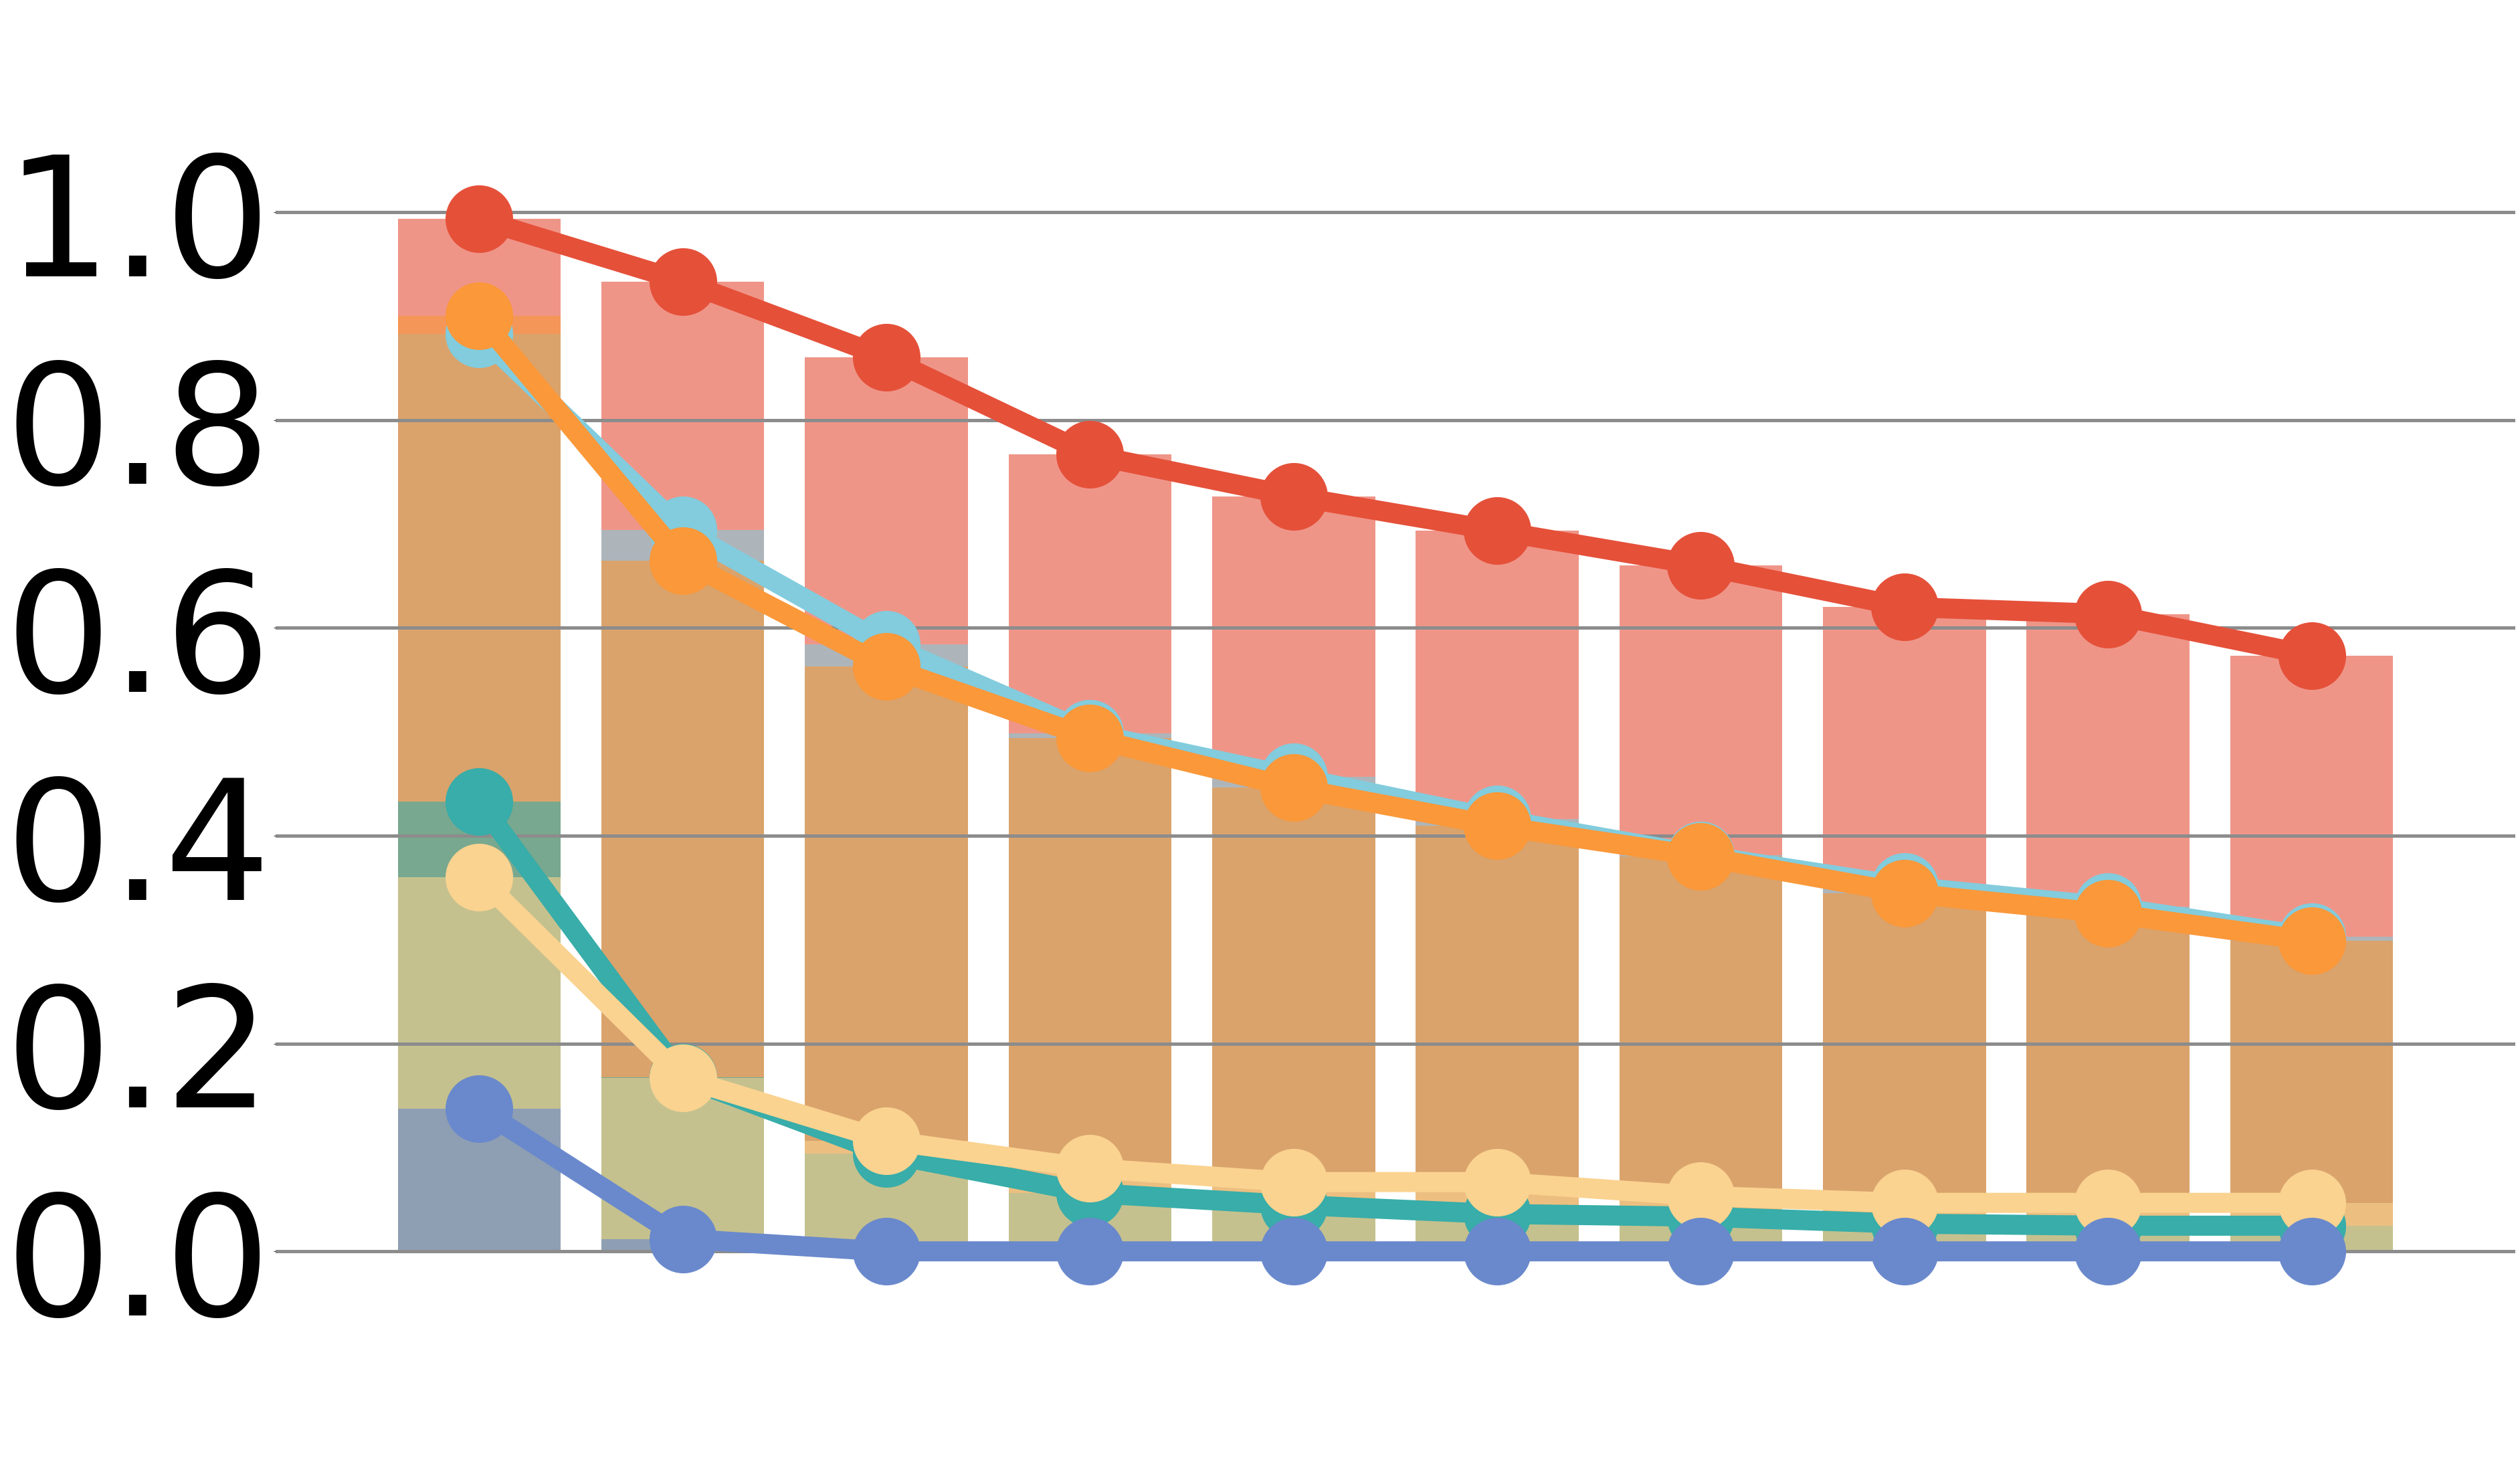

AML
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 145. 143. 137. 135. 135. 135. 126. 117. 117.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[95. 48. 34. 24. 21. 18. 17. 15. 11. 11.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[86. 38. 29. 23. 22. 19. 18. 15. 11. 10.]
P-values dataframe  (150, 1077)
[82. 38. 24. 21. 20. 18. 18. 13. 11. 11.]
P-values dataframe  (150, 1077)
[81. 39. 26. 22. 22. 19. 17. 17. 15. 14.]
P-values dataframe  (150, 1077)
[73. 43. 31. 25. 21. 18. 16. 14. 11.  9.]
P-values dataframe  (150, 1077)
[79. 33. 25. 19. 18. 17. 14. 14. 10.  9.]
P-values dataframe  (150, 1077)
[74. 34. 26. 23. 20. 17. 15. 12. 10. 10.]
P-values dataframe  (150, 1077)
[80. 36. 26. 21. 19. 17. 15. 15. 11. 10.]
P-values dataframe  (150, 1077)
[87. 42. 31. 22. 20. 18. 15. 15. 12. 12.]
P-values dataframe  (150, 1077)
[84. 40. 27. 23. 21. 16. 16. 13. 10. 10.]
P-values dataframe  (150, 1077)
[85. 33.

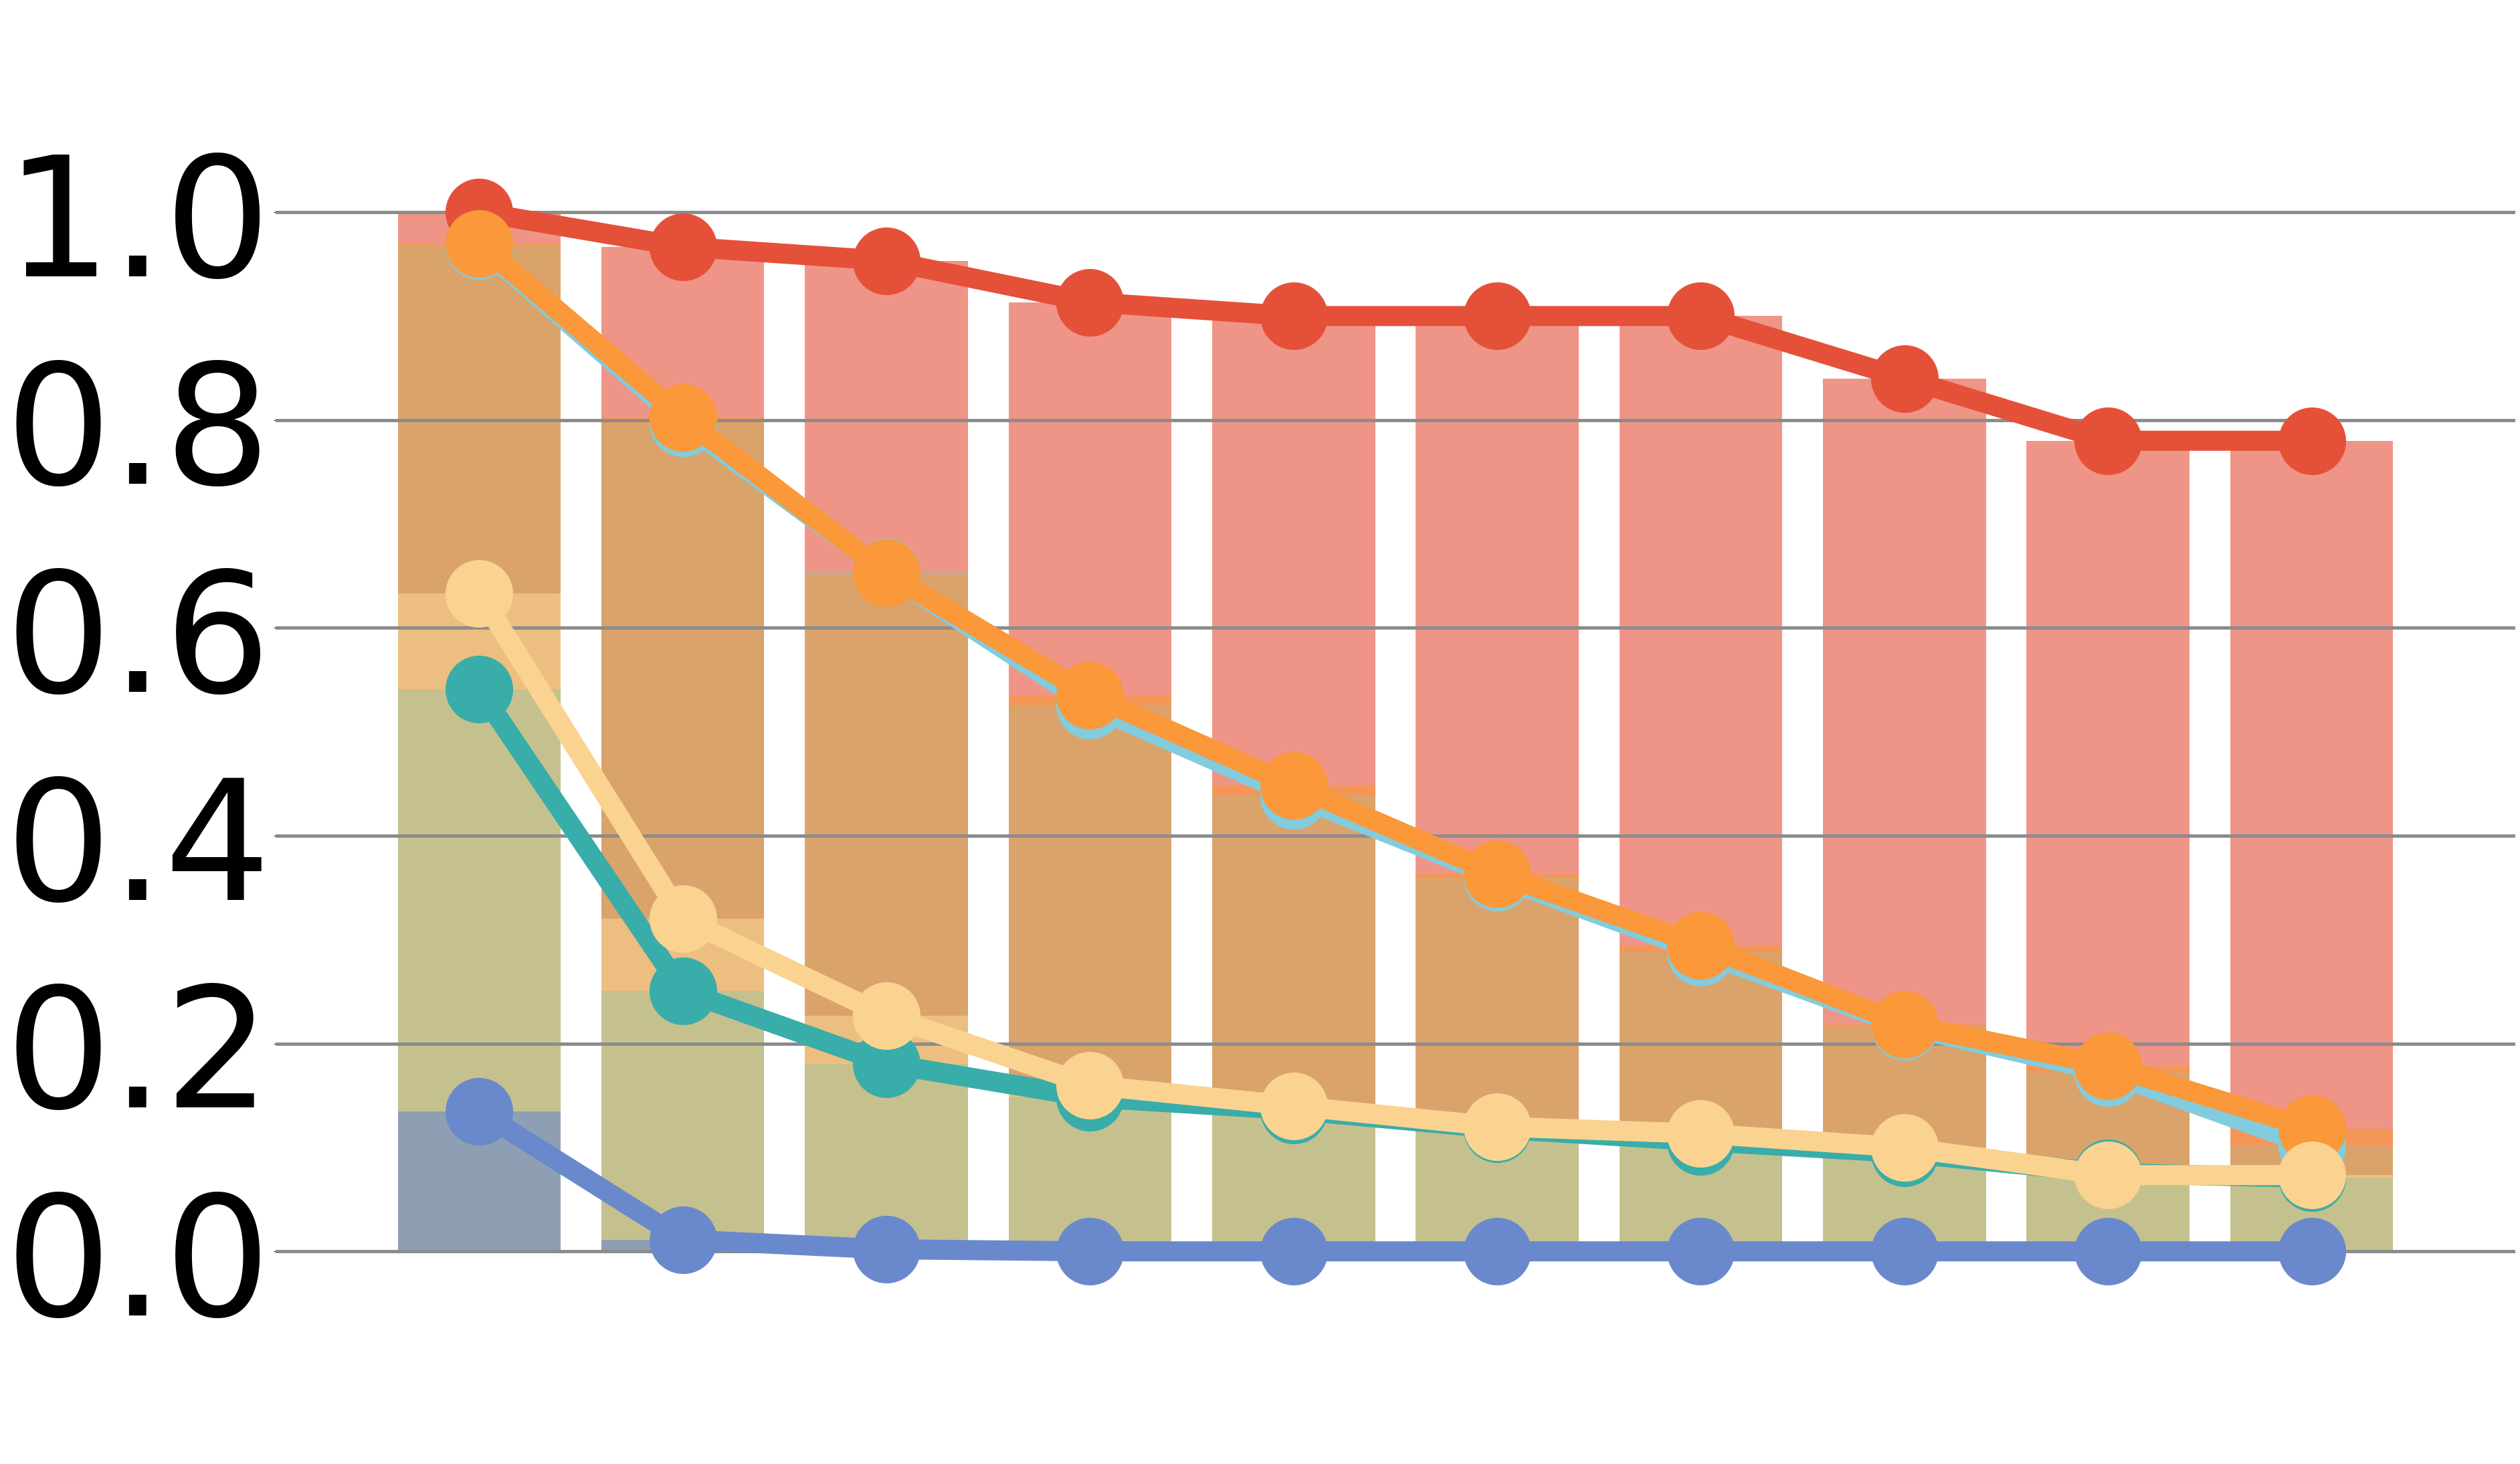

COLON
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[144. 110.  55.  42.  35.  32.  25.  24.  21.  19.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[85. 41. 25. 20. 14. 10.  8.  6.  6.  3.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[84. 41. 29. 22. 16. 13. 12.  8.  7.  5.]
P-values dataframe  (150, 1077)
[87. 45. 25. 17. 15. 11.  9.  6.  5.  4.]
P-values dataframe  (150, 1077)
[94. 49. 31. 19. 15. 12. 10.  8.  7.  5.]
P-values dataframe  (150, 1077)
[88. 37. 23. 19. 10.  8.  6.  4.  3.  2.]
P-values dataframe  (150, 1077)
[81. 43. 29. 17. 12. 10.  8.  6.  6.  5.]
P-values dataframe  (150, 1077)
[84. 43. 30. 18. 15. 10.  8.  5.  4.  3.]
P-values dataframe  (150, 1077)
[86. 34. 22. 19. 12. 11. 10.  5.  3.  3.]
P-values dataframe  (150, 1077)
[91. 49. 28. 17. 11.  8.  7.  5.  4.  2.]
P-values dataframe  (150, 1077)
[95. 42. 29. 19. 12.  9.  9.  6.  4.  3.]
P-values dataframe  (150, 1077)
[83. 4

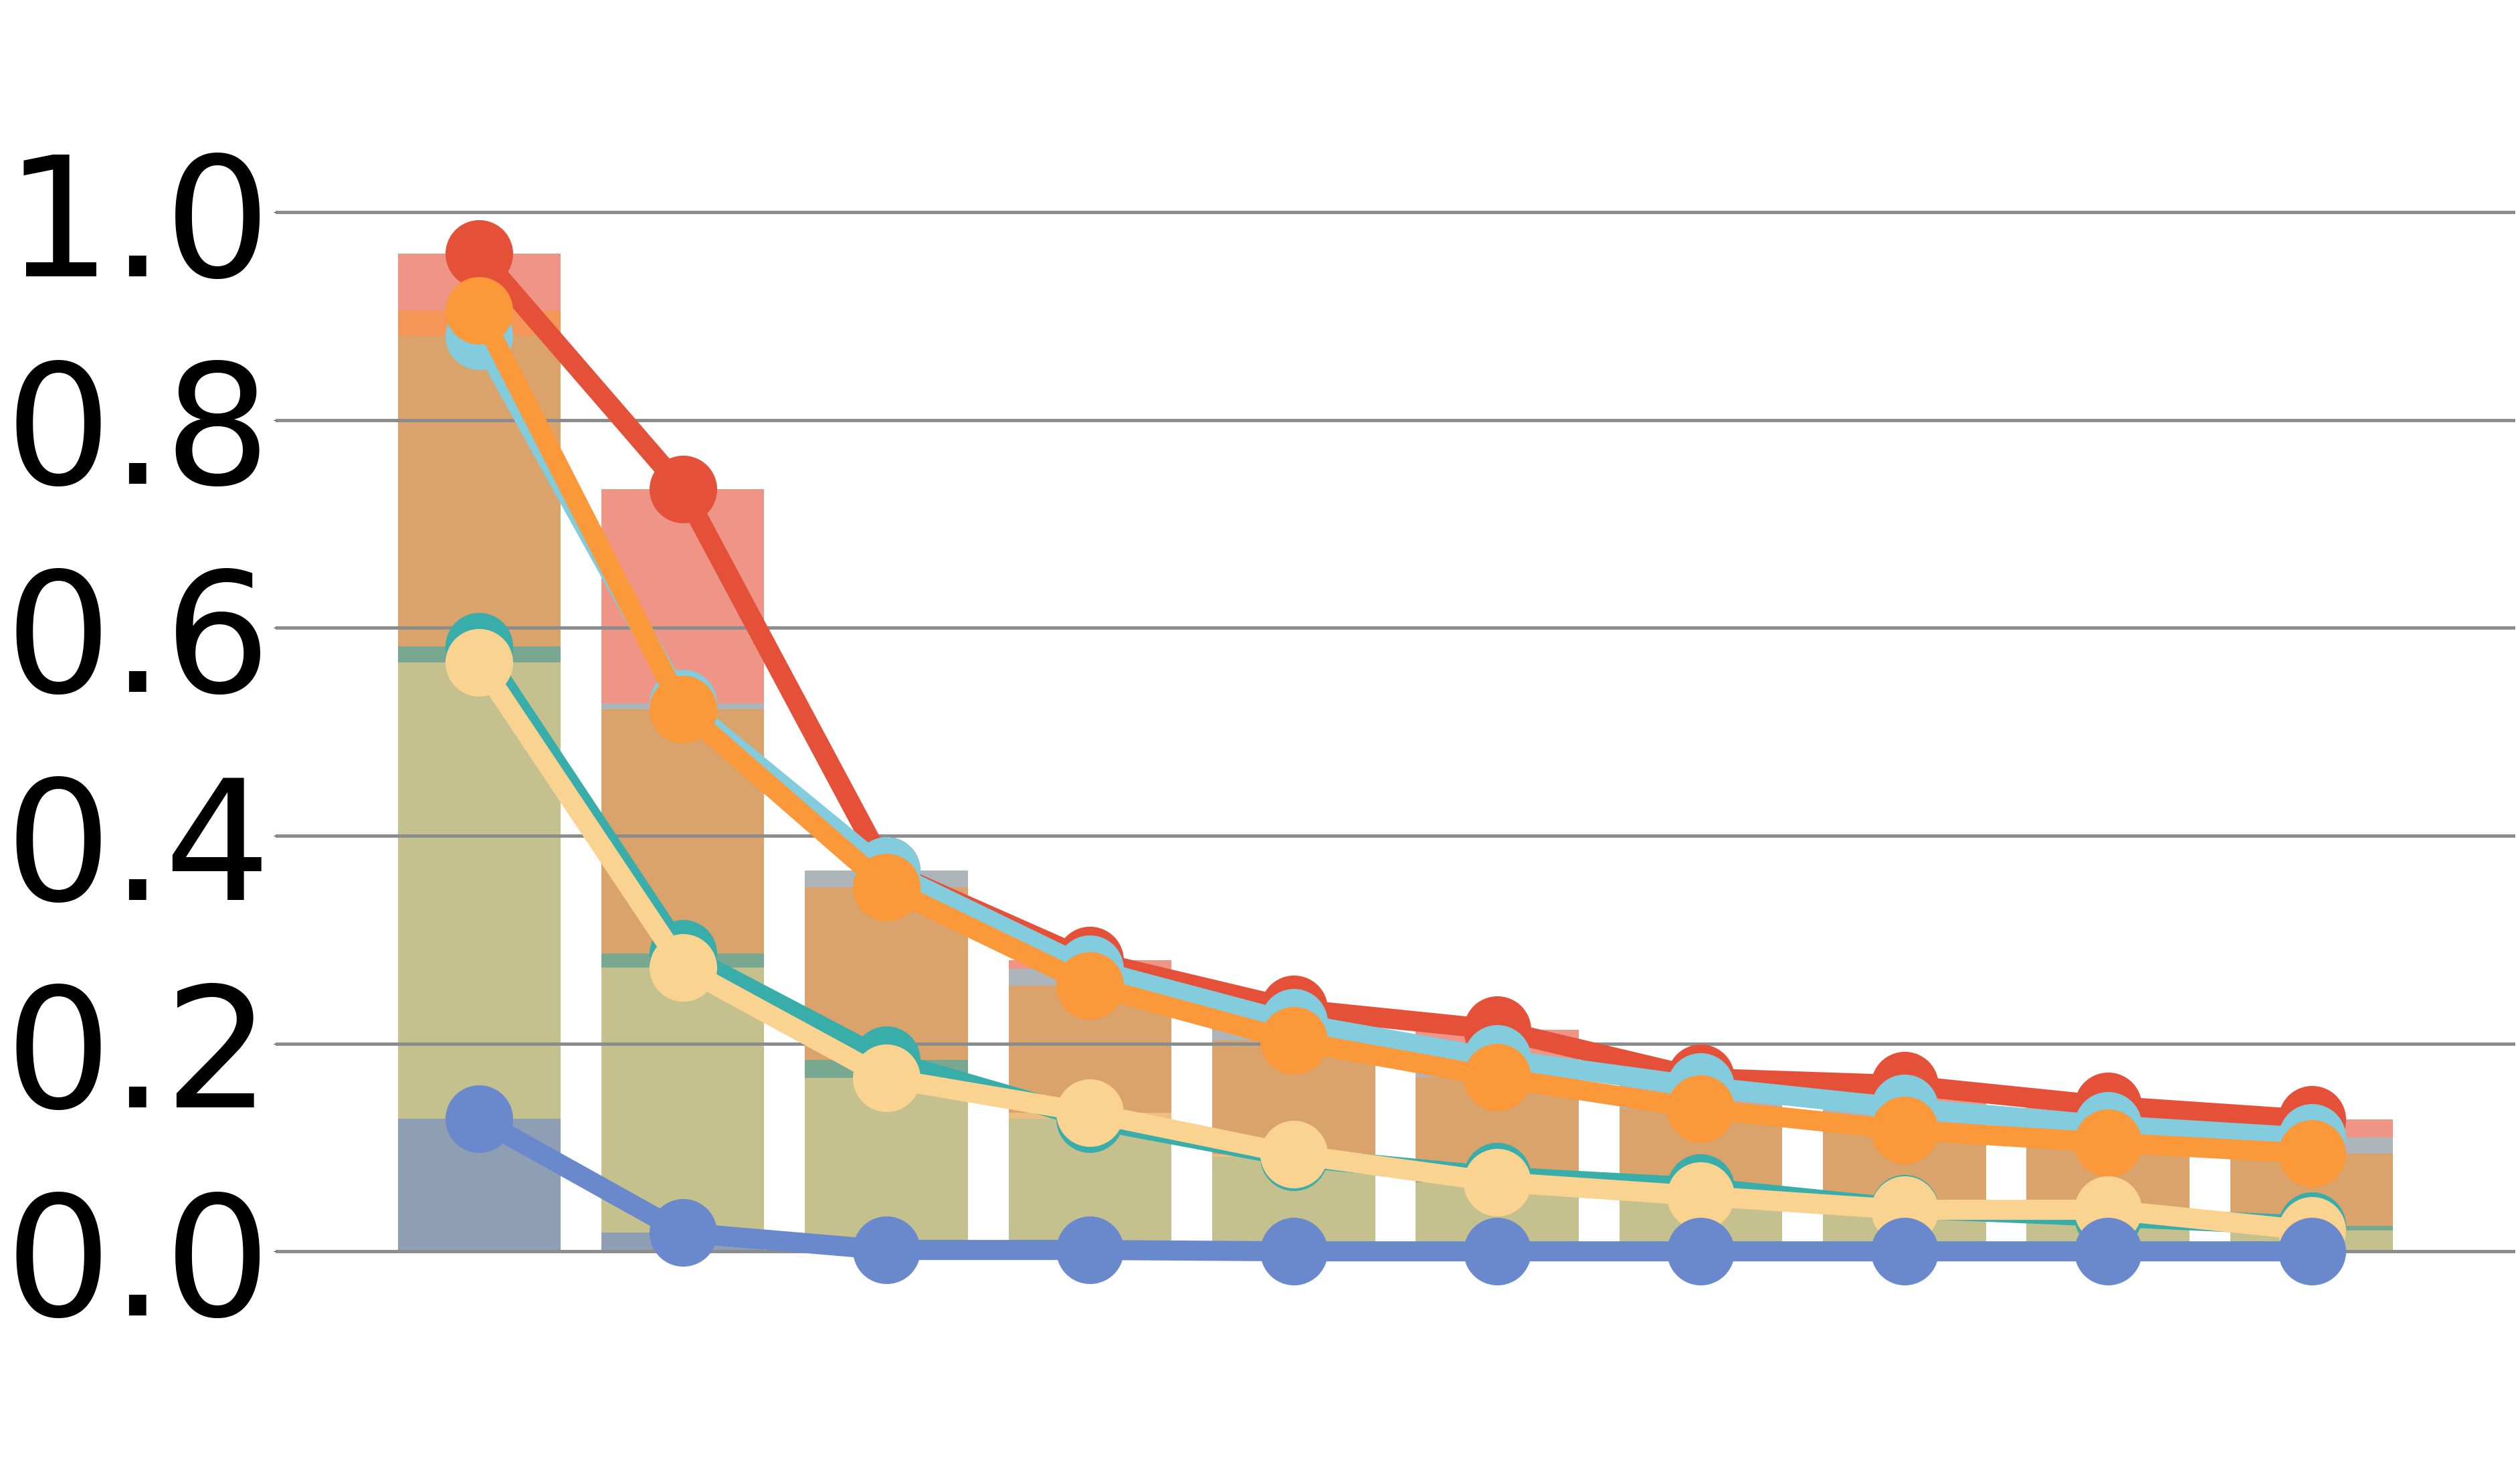

LUNG
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[145. 130. 117. 111. 105.  97.  91.  76.  72.  68.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[71. 33. 24. 19. 17. 13. 11. 10.  9.  4.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[66. 26. 19. 11.  8.  7.  7.  6.  6.  5.]
P-values dataframe  (150, 1077)
[69. 37. 22. 15. 12.  8.  7.  6.  6.  5.]
P-values dataframe  (150, 1077)
[85. 38. 23. 16. 13.  9.  9.  8.  8.  8.]
P-values dataframe  (150, 1077)
[72. 31. 20. 15. 12.  9.  7.  6.  6.  5.]
P-values dataframe  (150, 1077)
[83. 37. 24. 19. 15. 10.  9.  7.  7.  7.]
P-values dataframe  (150, 1077)
[71. 29. 20. 16. 11.  9.  9.  7.  7.  7.]
P-values dataframe  (150, 1077)
[80. 34. 25. 18. 13. 10.  9.  8.  7.  6.]
P-values dataframe  (150, 1077)
[74. 27. 18. 13. 10.  7.  7.  6.  4.  4.]
P-values dataframe  (150, 1077)
[75. 32. 21. 18. 13. 11. 10.  8.  7.  7.]
P-values dataframe  (150, 1077)
[69. 31

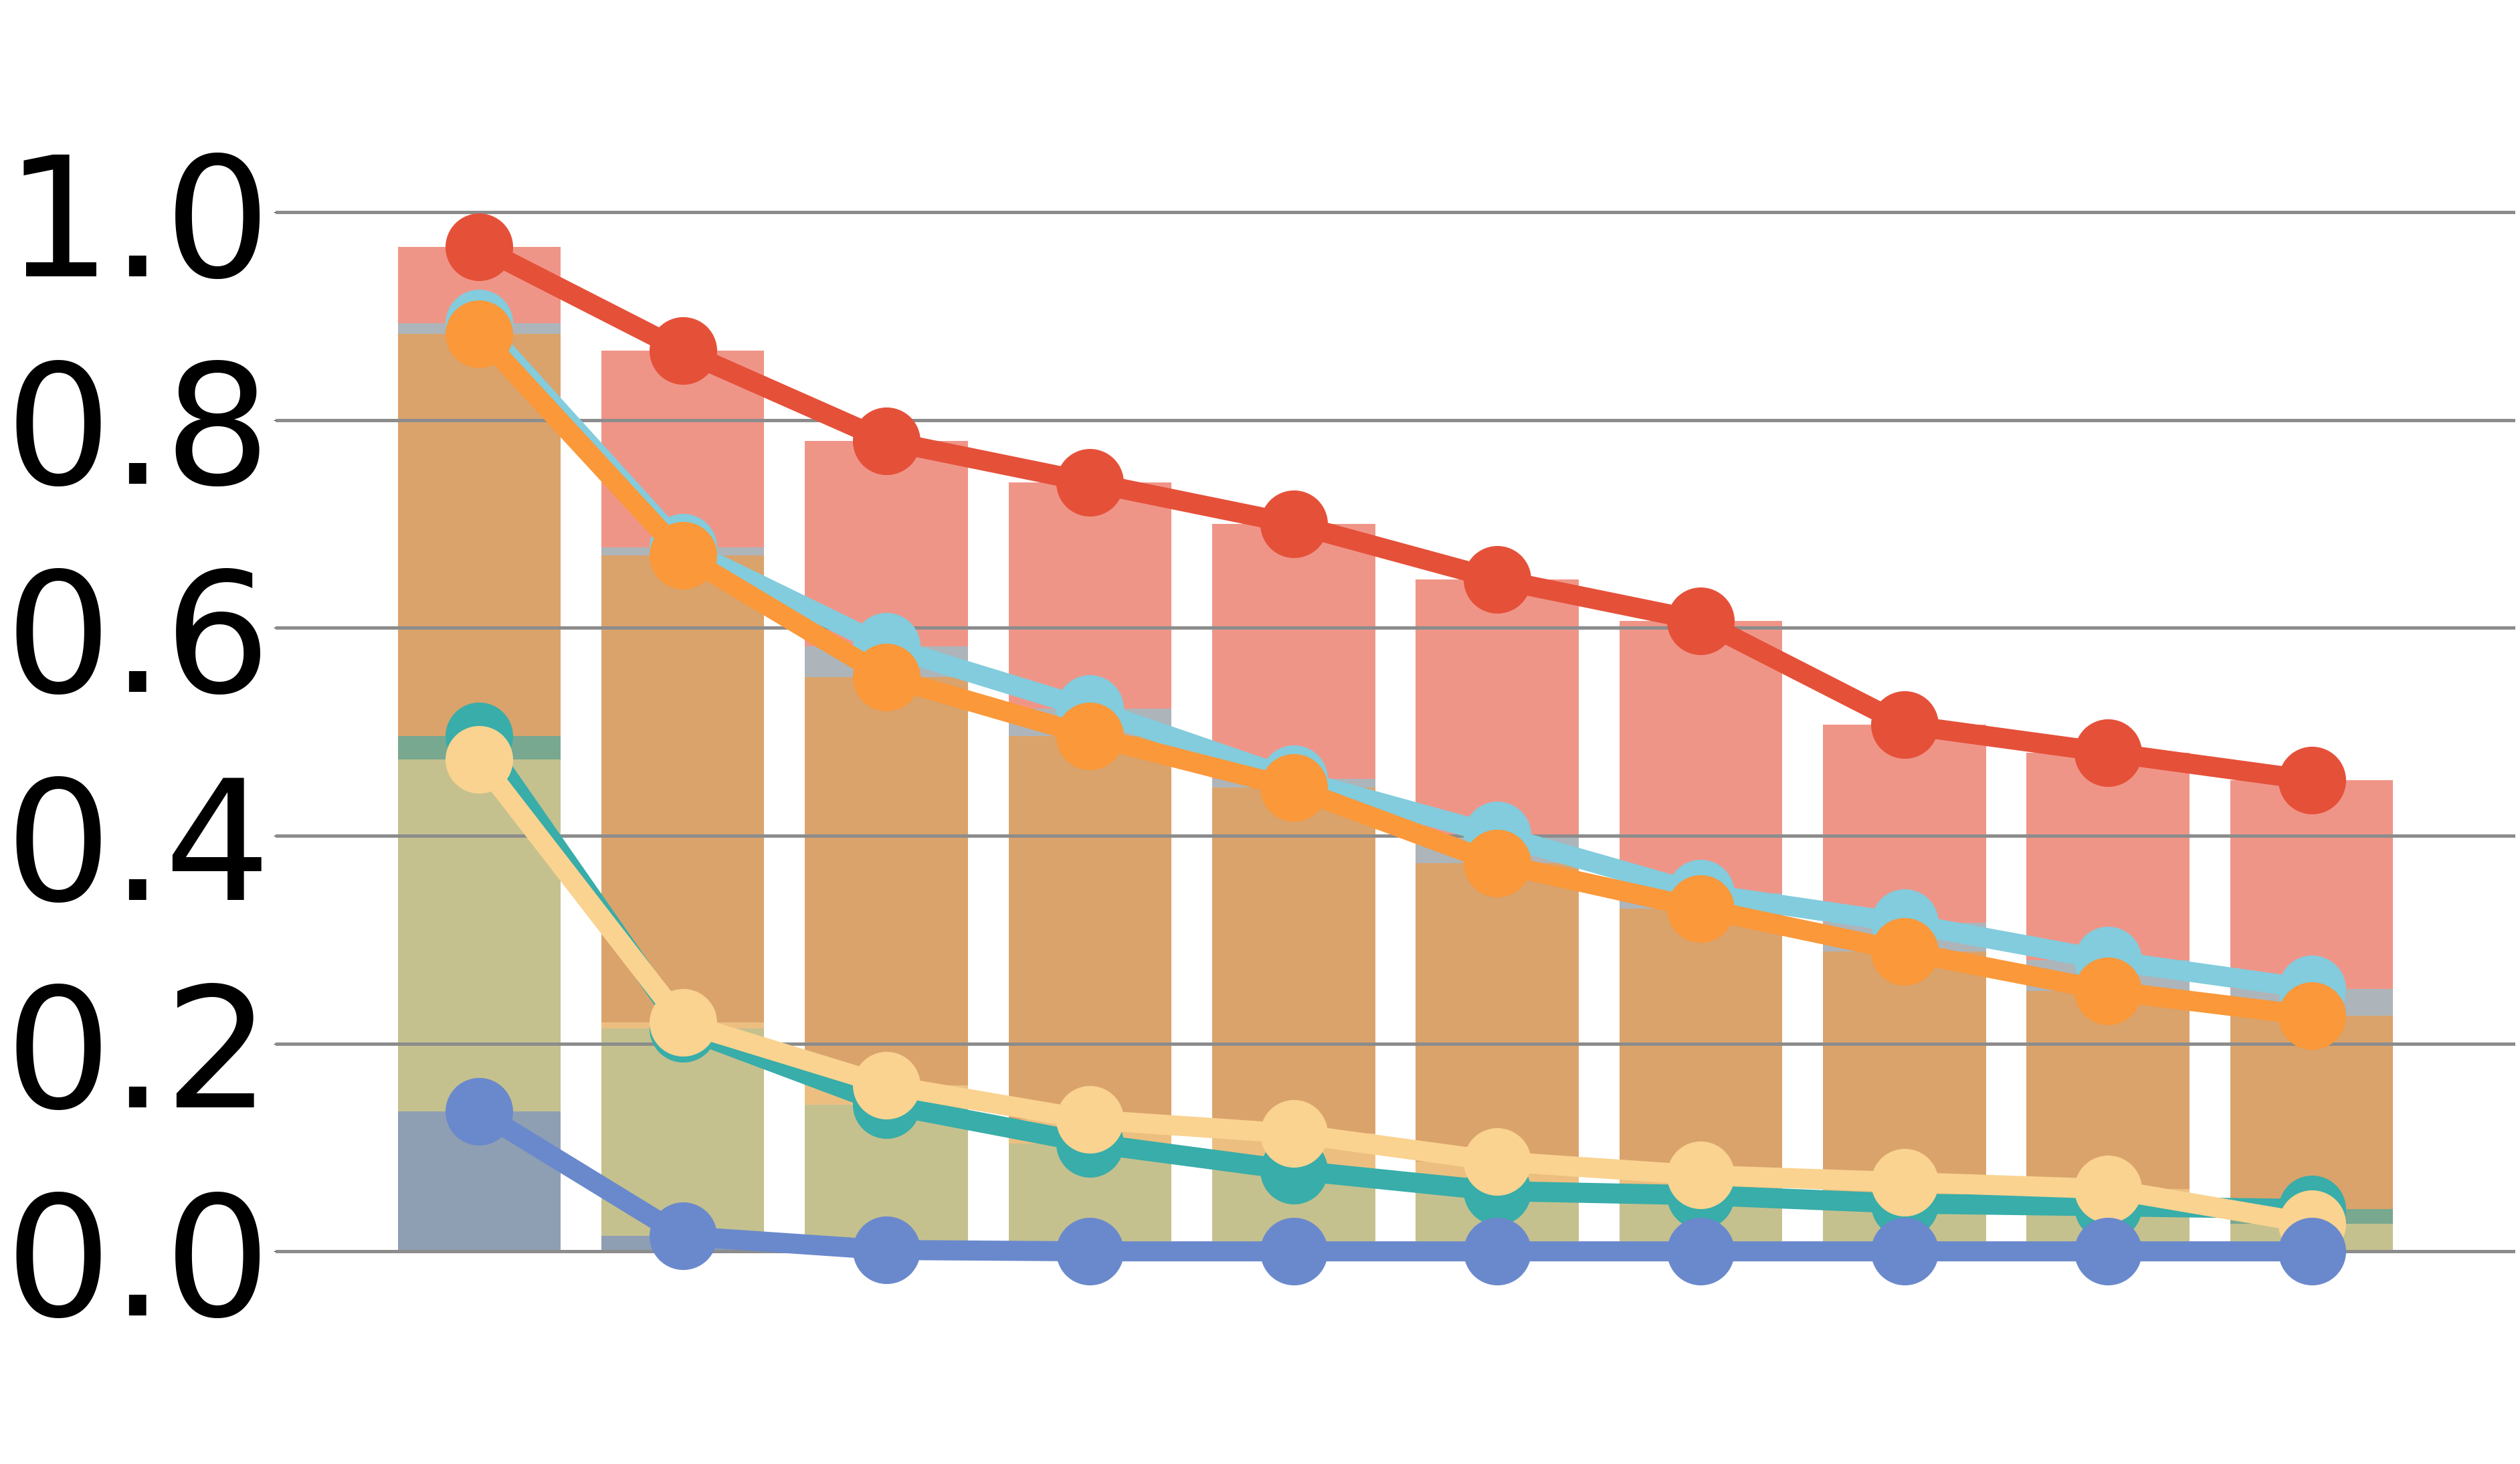

BRAIN
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[147. 101.  41.  29.  23.  15.   8.   4.   0.   0.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[47. 18. 11.  8.  6.  4.  4.  3.  1.  1.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[57. 27. 16. 14. 11. 10.  9.  9.  3.  3.]
P-values dataframe  (150, 1077)
[54. 21. 11.  9.  8.  8.  7.  7.  5.  4.]
P-values dataframe  (150, 1077)
[59. 24. 12. 11. 10.  8.  8.  6.  4.  4.]
P-values dataframe  (150, 1077)
[57. 30. 15. 13. 12. 10.  8.  8.  8.  7.]
P-values dataframe  (150, 1077)
[54. 25. 13. 11.  9.  9.  9.  9.  7.  6.]
P-values dataframe  (150, 1077)
[60. 21. 19. 13. 11. 10.  7.  6.  5.  5.]
P-values dataframe  (150, 1077)
[53. 22. 10.  9.  7.  5.  4.  3.  3.  3.]
P-values dataframe  (150, 1077)
[52. 24. 16. 13. 10.  9.  8.  7.  6.  6.]
P-values dataframe  (150, 1077)
[50. 20. 13. 11. 10. 10.  8.  8.  6.  5.]
P-values dataframe  (150, 1077)
[56. 2

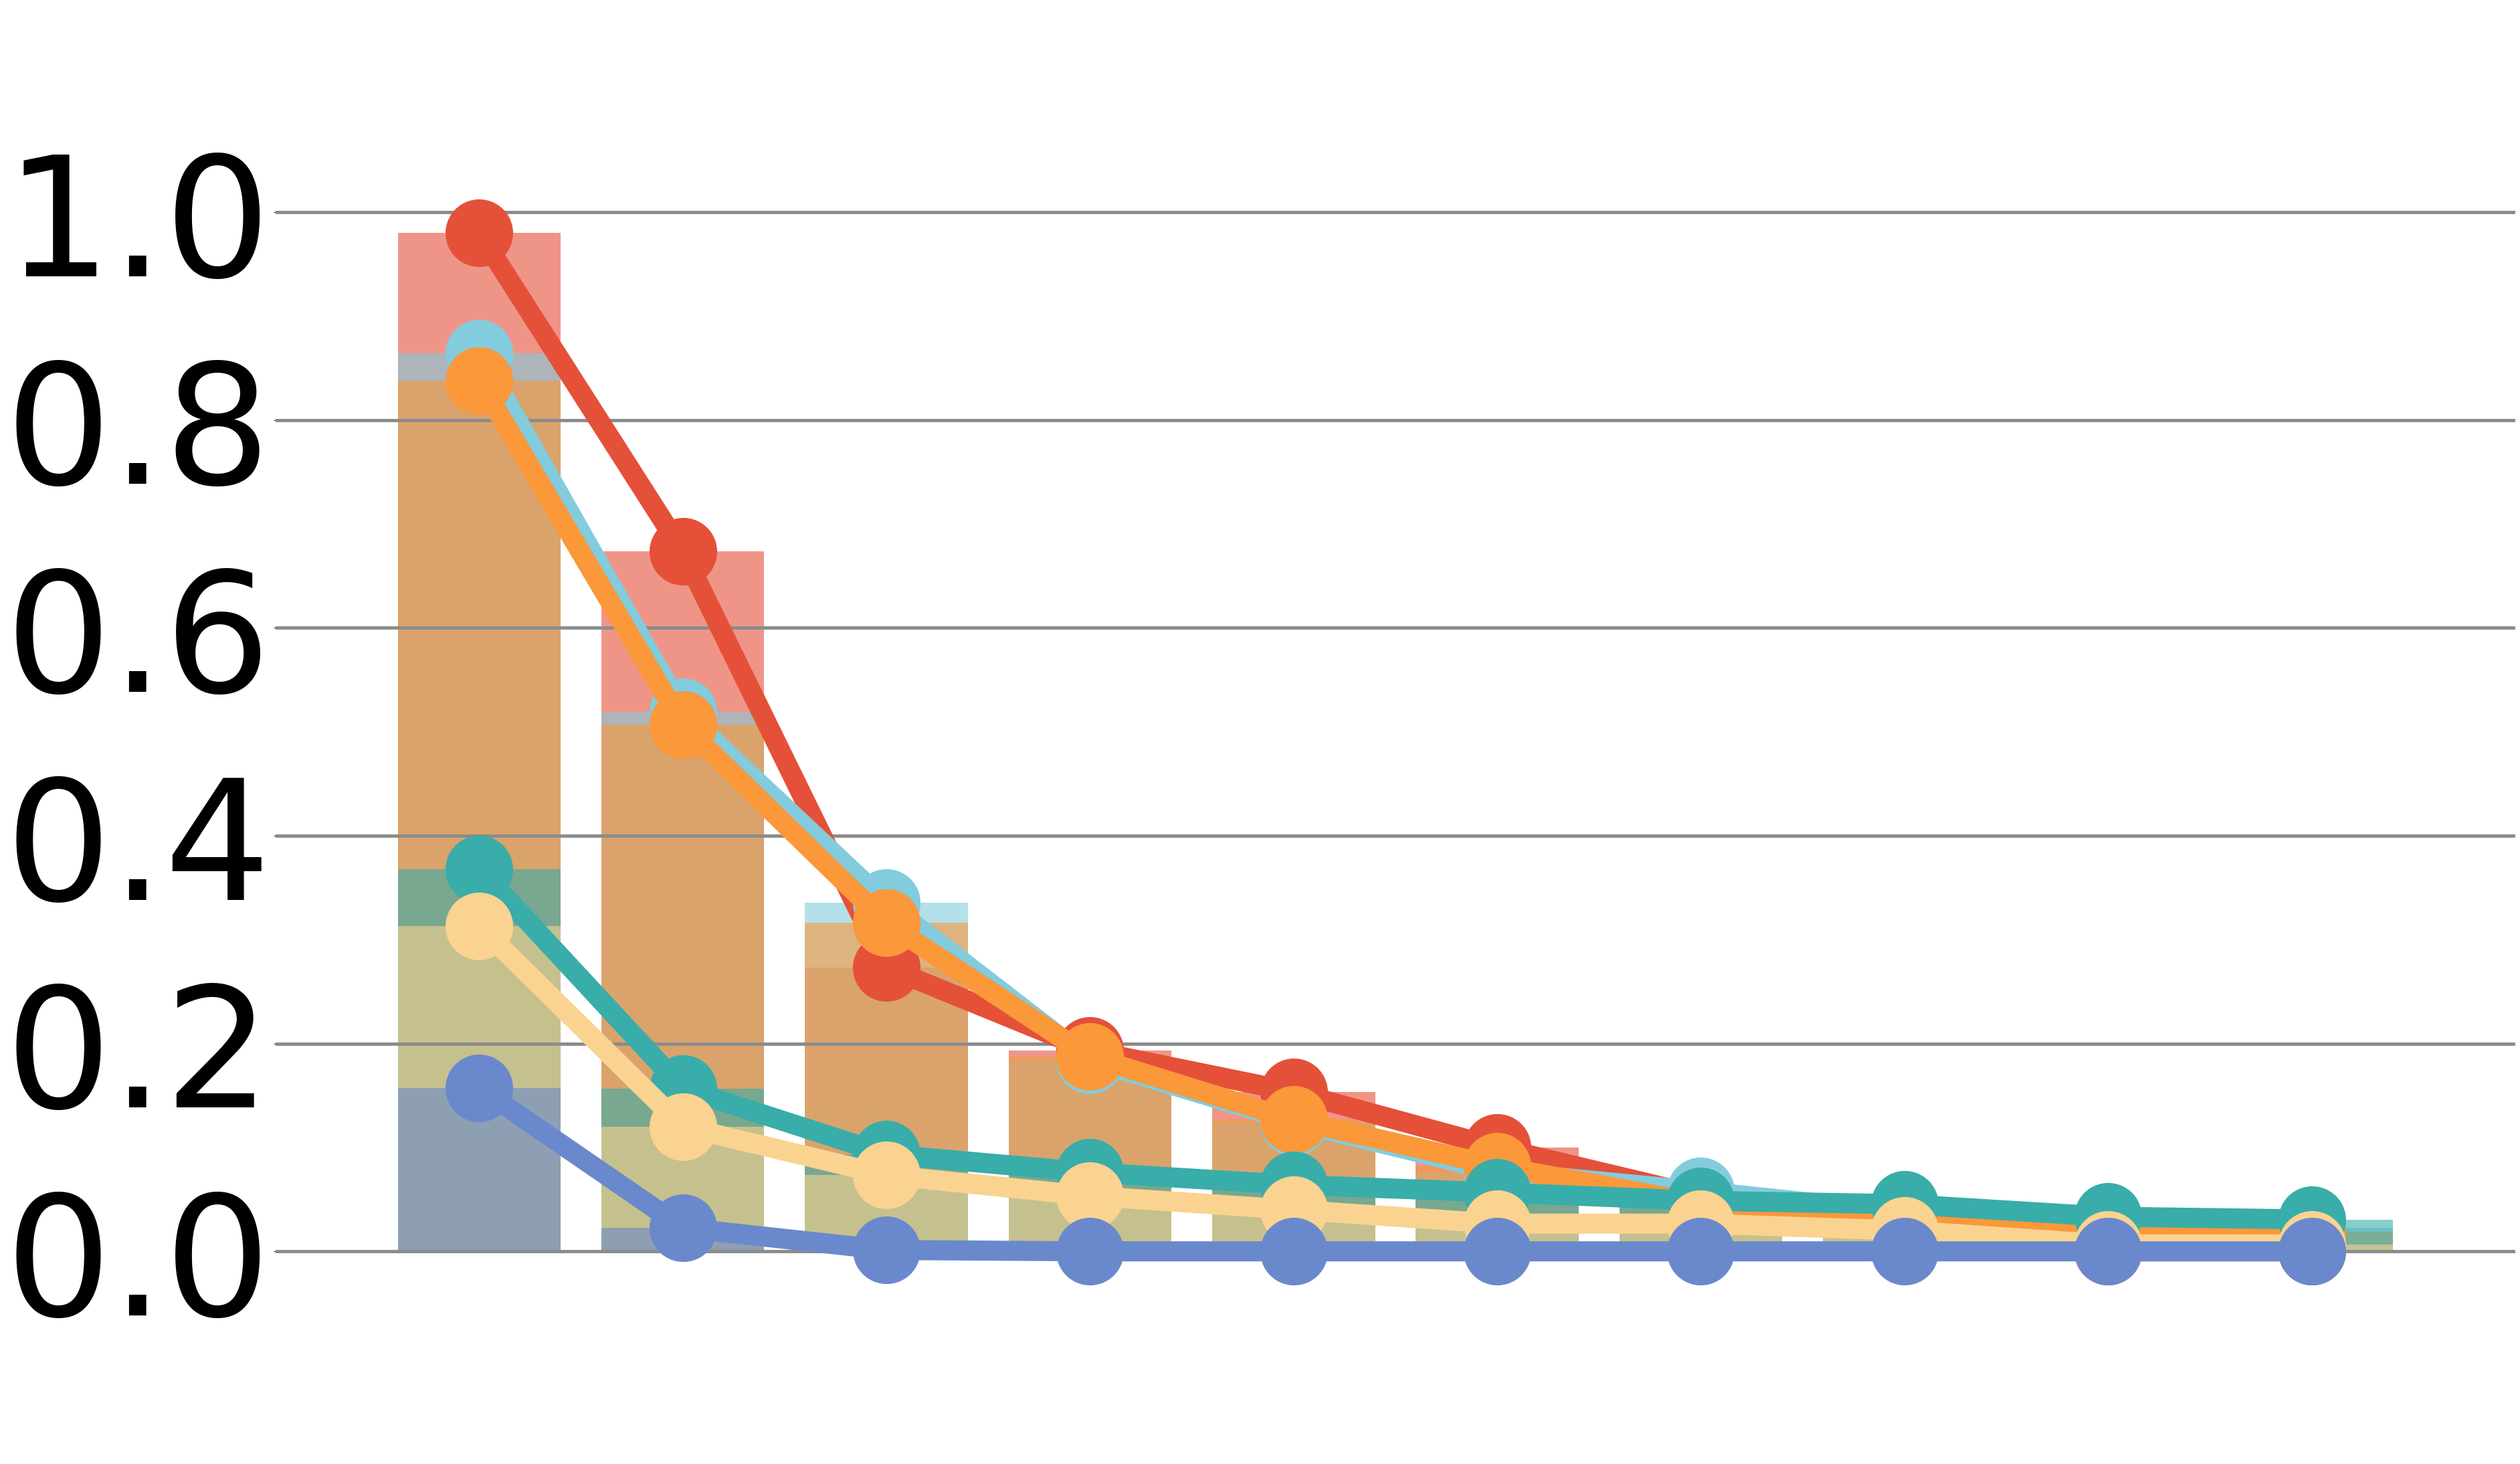

OV
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 138. 124. 119. 104.  95.  80.  65.  63.  57.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[65. 16. 10.  7.  6.  6.  4.  4.  3.  3.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[69. 30. 16. 12.  8.  7.  6.  6.  5.  4.]
P-values dataframe  (150, 1077)
[68. 25. 12.  8.  7.  7.  4.  4.  4.  4.]
P-values dataframe  (150, 1077)
[82. 28. 11.  9.  8.  4.  4.  3.  3.  3.]
P-values dataframe  (150, 1077)
[75. 36. 15.  8.  6.  6.  6.  5.  5.  5.]
P-values dataframe  (150, 1077)
[81. 25. 14.  9.  6.  6.  6.  4.  4.  4.]
P-values dataframe  (150, 1077)
[74. 27. 16. 10.  6.  4.  3.  3.  3.  3.]
P-values dataframe  (150, 1077)
[70. 24. 15.  9.  9.  7.  7.  7.  6.  4.]
P-values dataframe  (150, 1077)
[76. 27. 12.  7.  4.  3.  3.  3.  3.  3.]
P-values dataframe  (150, 1077)
[67. 27. 10.  7.  6.  5.  5.  4.  4.  3.]
P-values dataframe  (150, 1077)
[74. 26. 

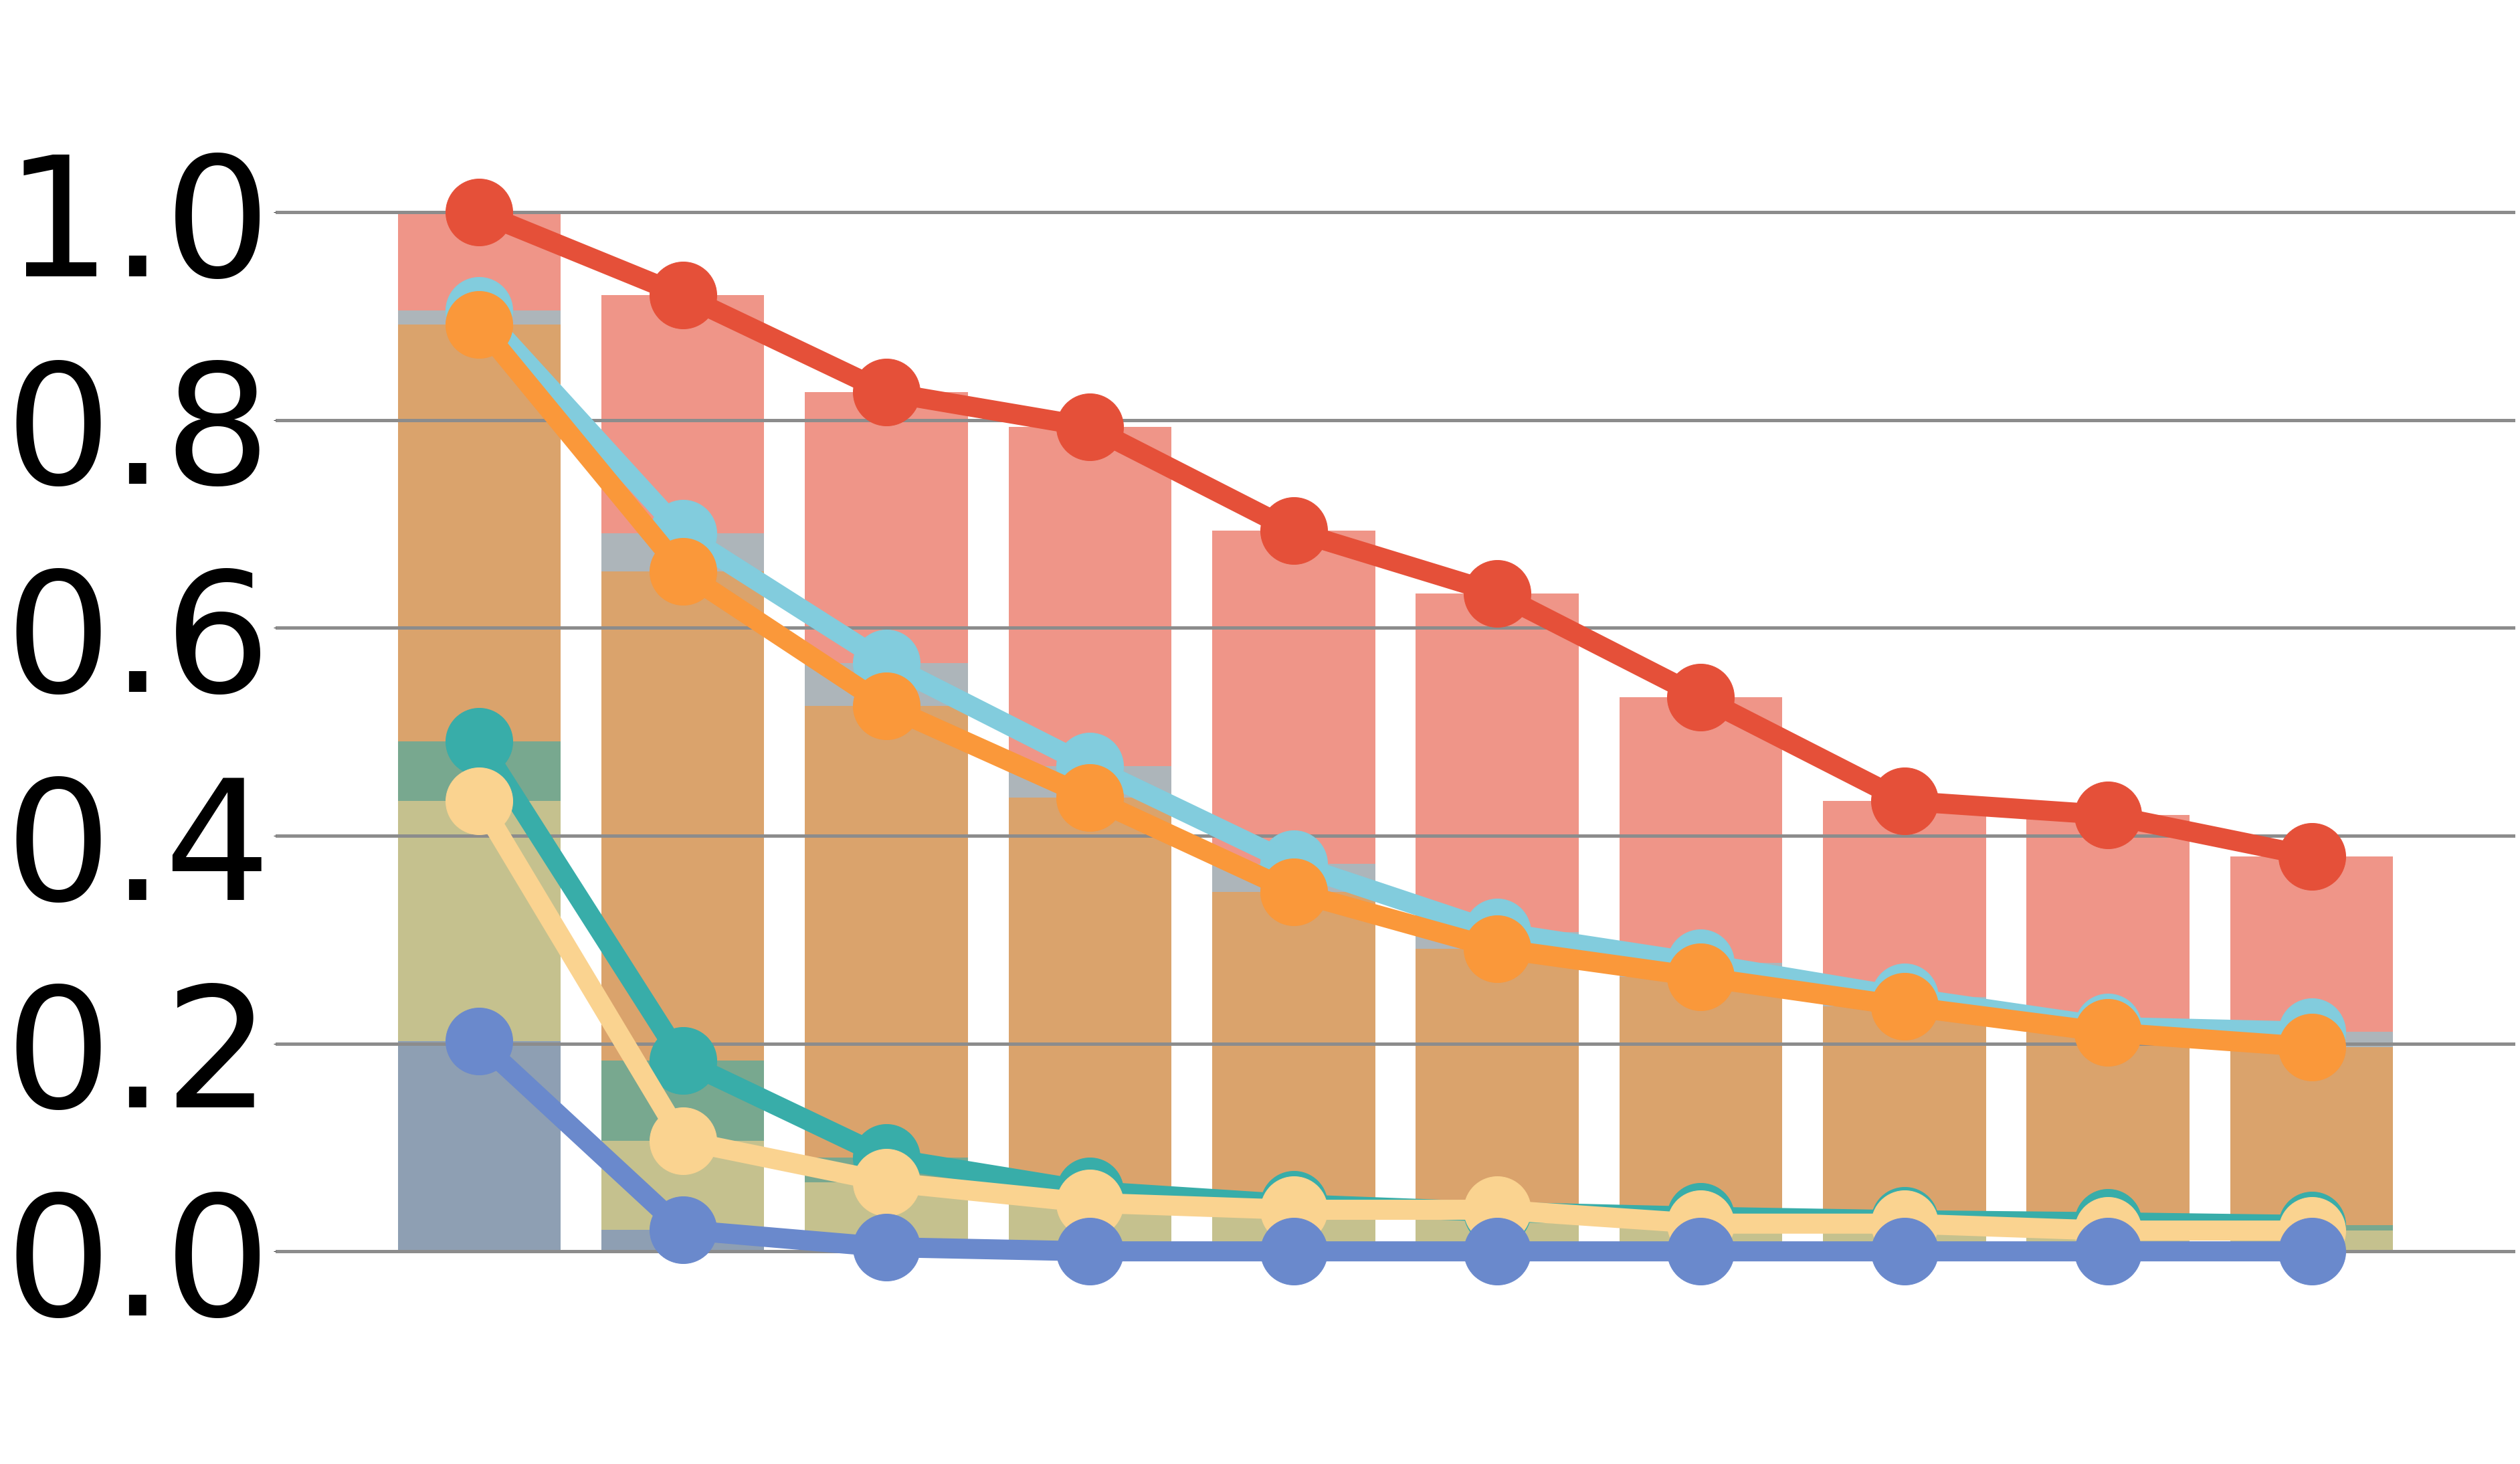

SARCOMA
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 144. 123.  94.  79.  71.  61.  55.  37.  32.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[54. 26. 16.  9.  8.  7.  6.  6.  5.  4.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[43. 16.  6.  1.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[53. 14.  7.  3.  3.  3.  3.  2.  1.  1.]
P-values dataframe  (150, 1077)
[49. 16. 10.  5.  3.  2.  2.  1.  0.  0.]
P-values dataframe  (150, 1077)
[45. 16.  9.  6.  6.  2.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[42. 14.  6.  4.  3.  2.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[49. 15.  8.  4.  4.  2.  2.  0.  0.  0.]
P-values dataframe  (150, 1077)
[49. 18. 10.  5.  5.  5.  4.  1.  1.  1.]
P-values dataframe  (150, 1077)
[46. 22.  9.  5.  5.  4.  4.  1.  1.  1.]
P-values dataframe  (150, 1077)
[49. 18.  5.  2.  2.  2.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[47.

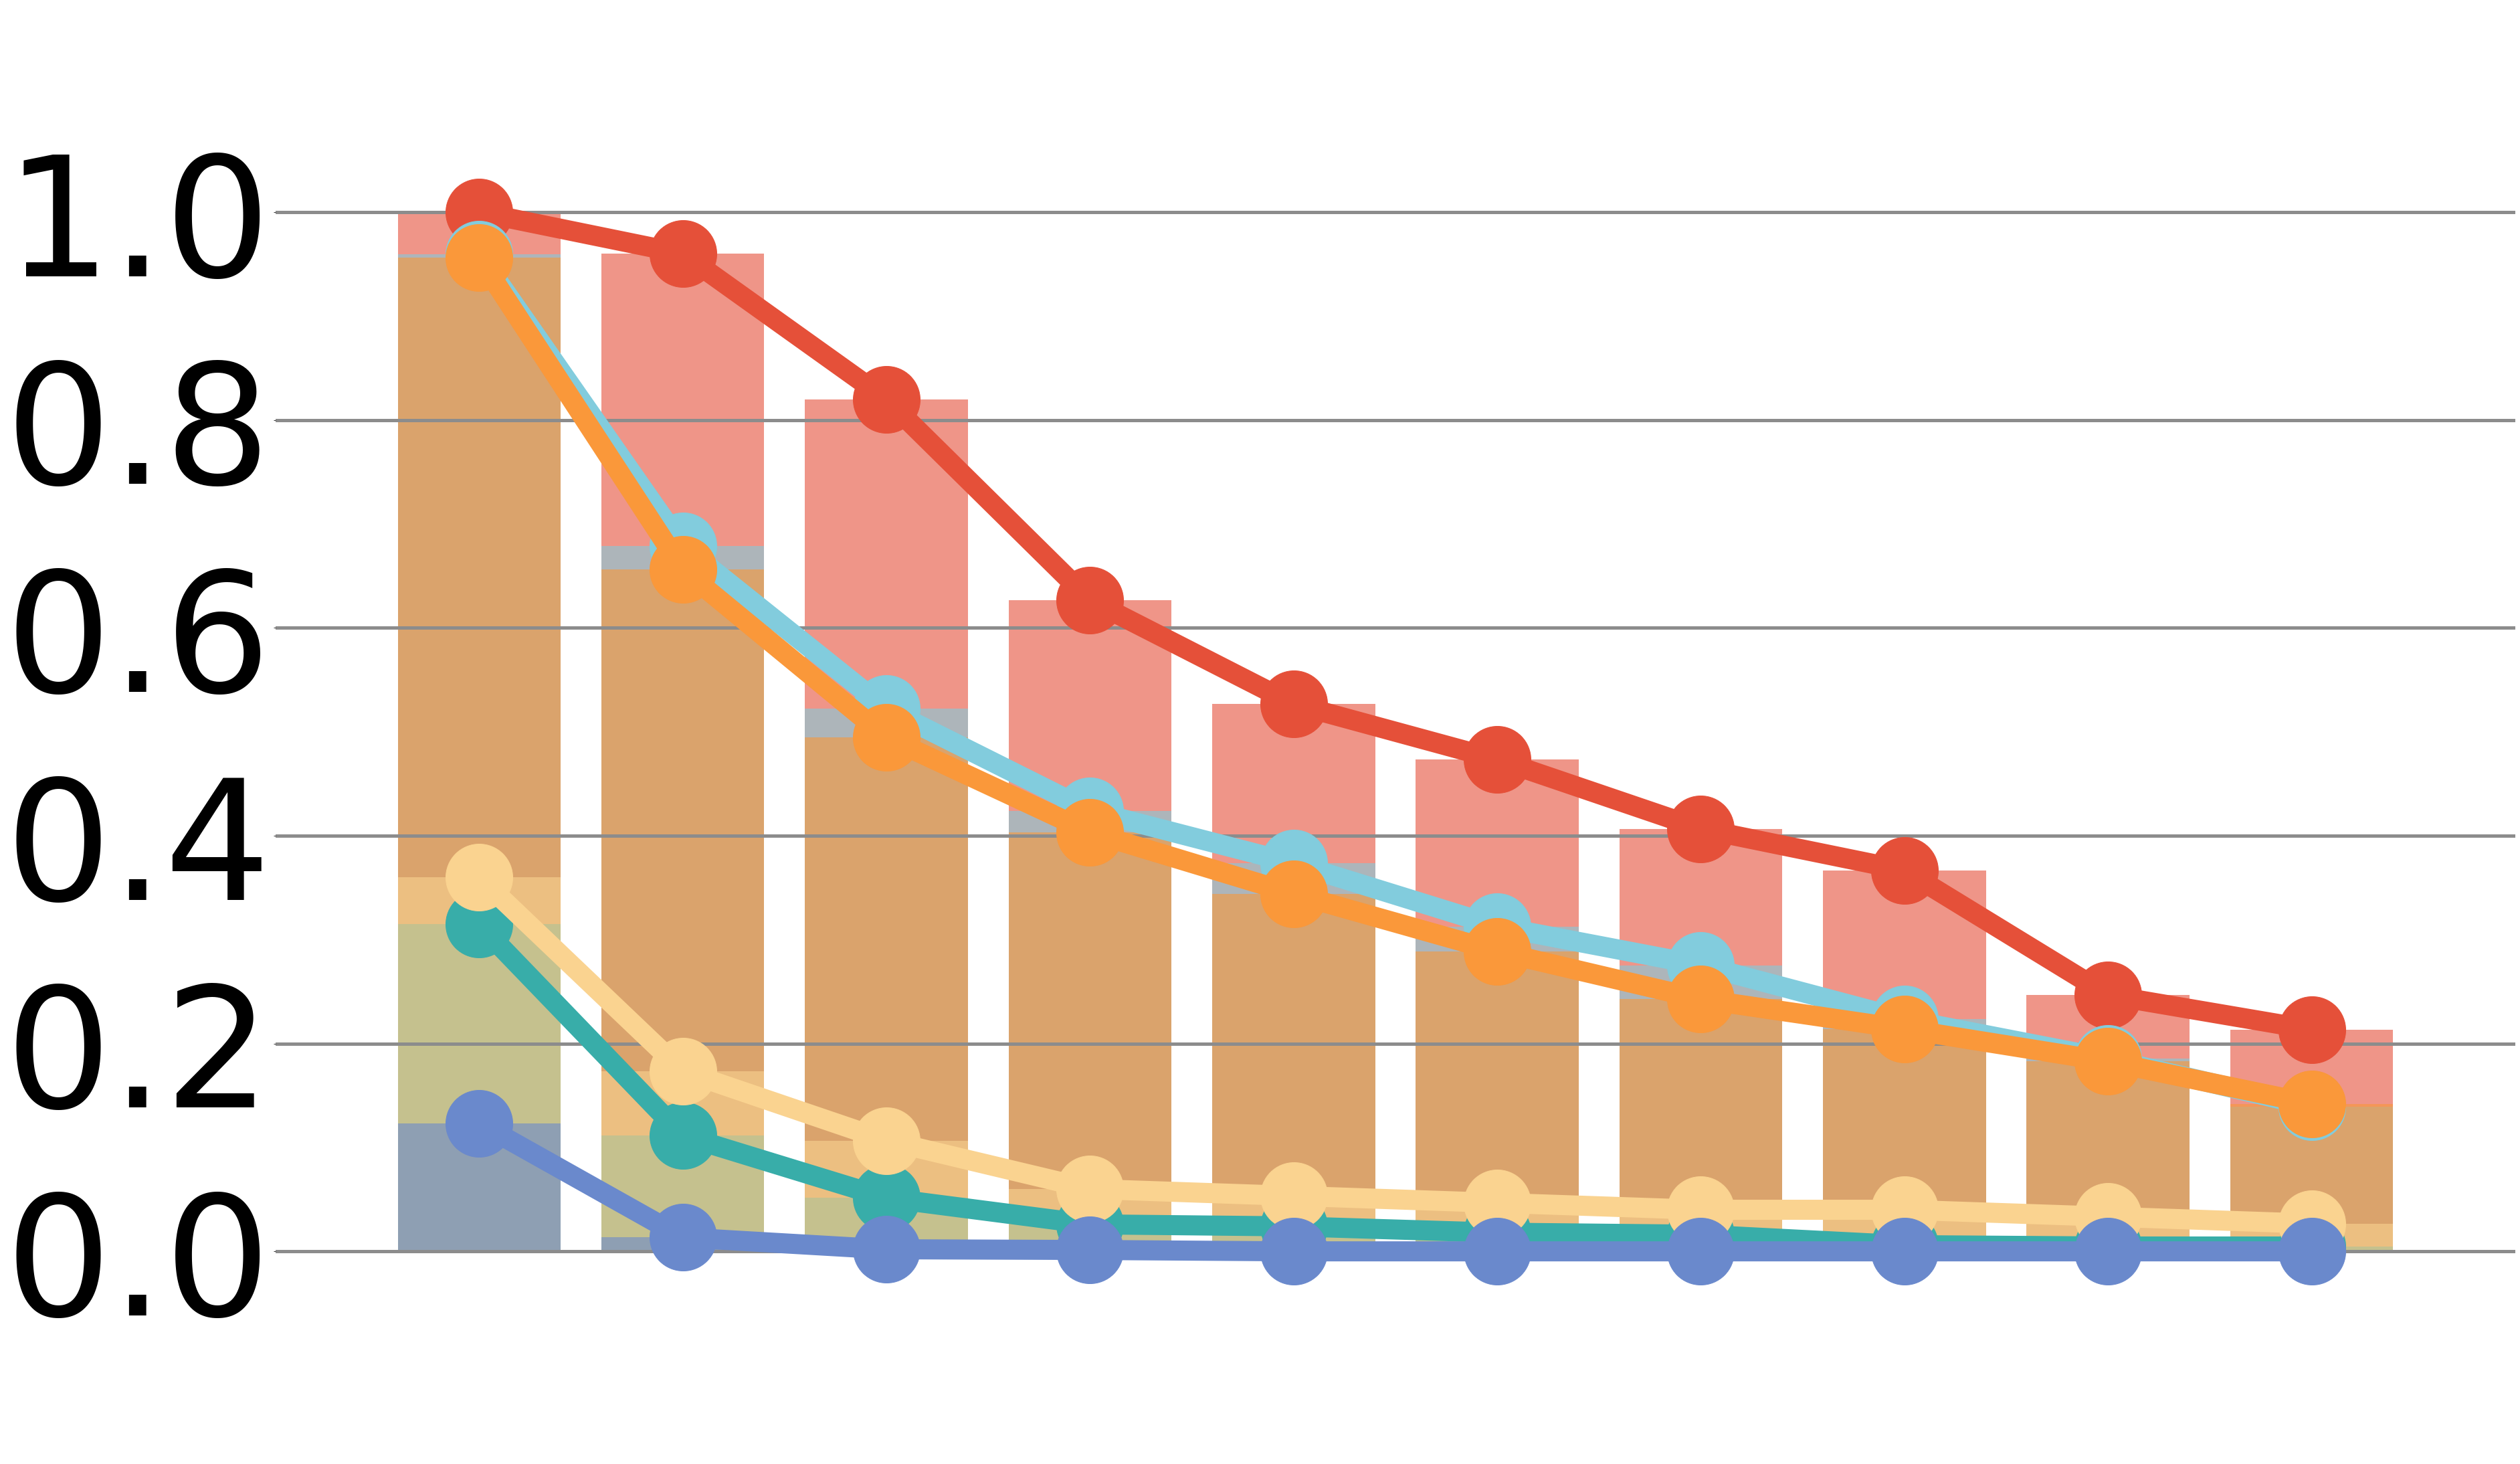

KIDNEY
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[145. 125. 106.  87.  76.  55.  43.  36.  30.  26.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[56. 25. 17. 16. 10.  8.  6.  6.  4.  3.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[69. 32. 15. 13. 11. 11.  9.  8.  6.  6.]
P-values dataframe  (150, 1077)
[66. 29. 17. 14. 12.  9.  7.  7.  6.  6.]
P-values dataframe  (150, 1077)
[74. 29. 17. 11.  7.  7.  6.  6.  6.  6.]
P-values dataframe  (150, 1077)
[72. 28. 17. 12.  8.  6.  6.  6.  5.  5.]
P-values dataframe  (150, 1077)
[73. 35. 18. 12.  9.  8.  8.  7.  6.  6.]
P-values dataframe  (150, 1077)
[64. 27. 16. 12.  8.  7.  6.  6.  6.  6.]
P-values dataframe  (150, 1077)
[76. 33. 13. 10.  7.  7.  6.  5.  4.  4.]
P-values dataframe  (150, 1077)
[61. 26. 12. 11. 10.  6.  6.  6.  6.  6.]
P-values dataframe  (150, 1077)
[69. 32. 16. 13. 11.  7.  7.  7.  6.  6.]
P-values dataframe  (150, 1077)
[62. 

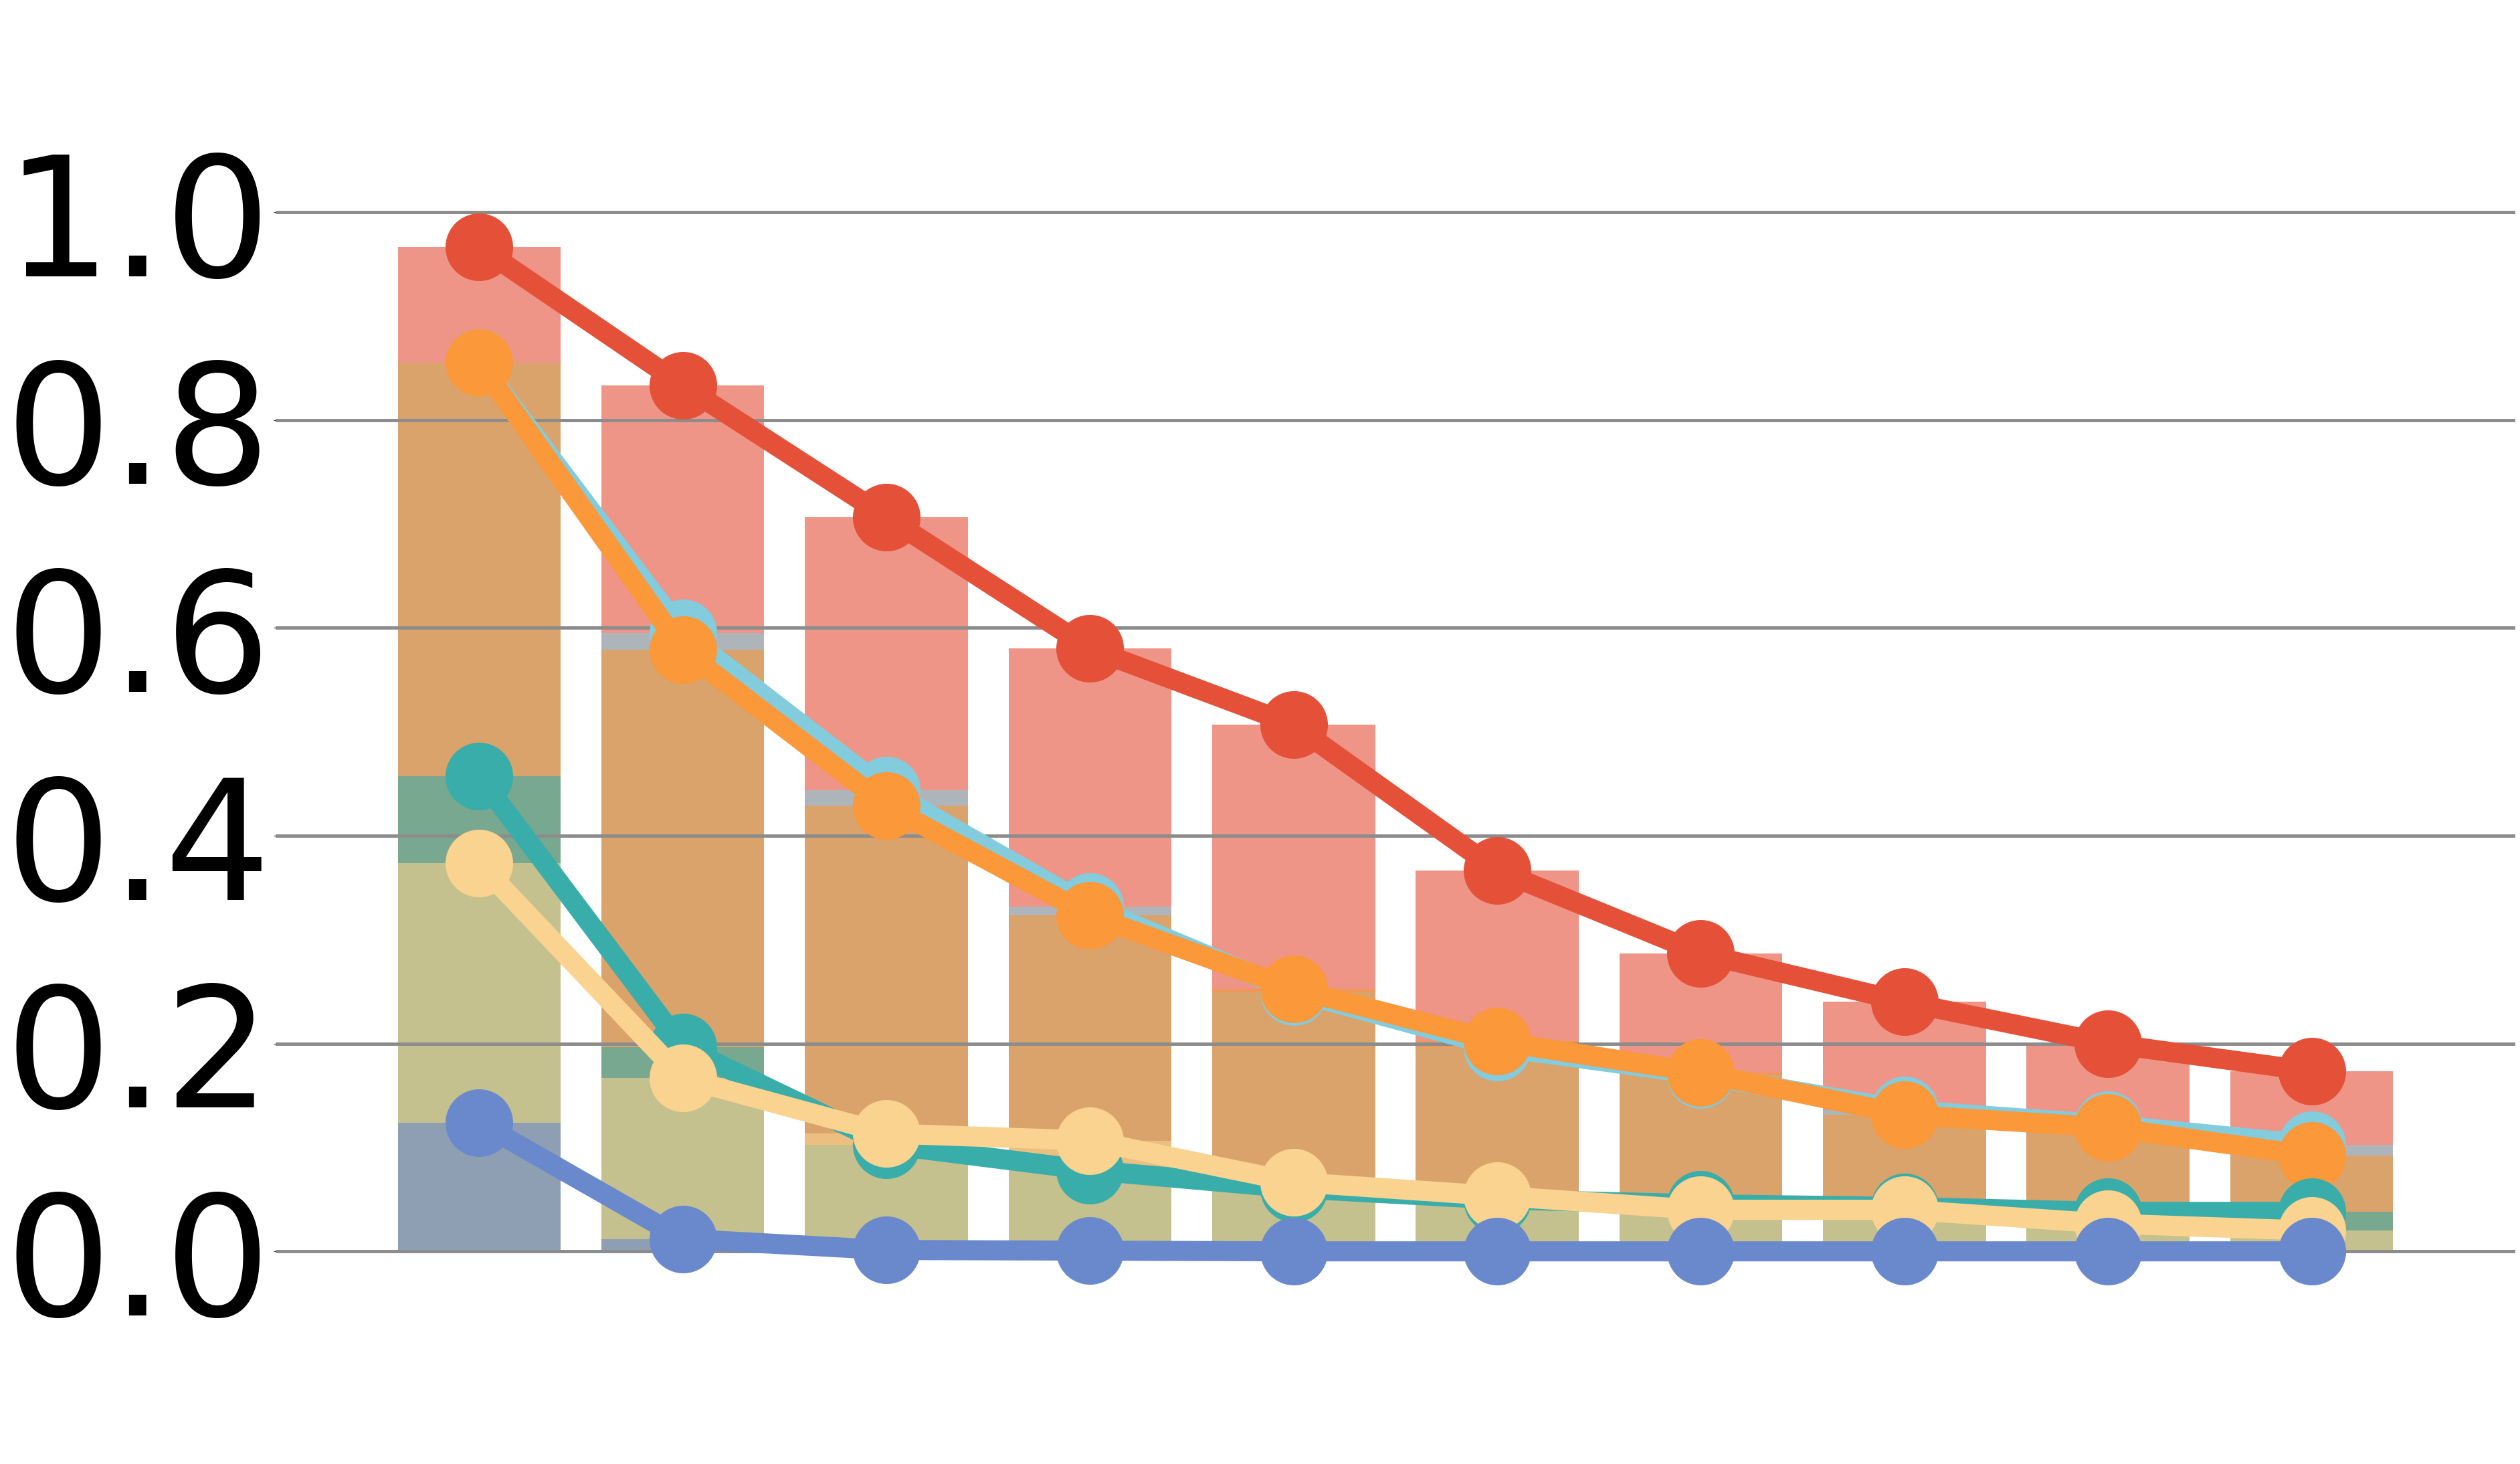

LIVER
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 119.  86.  66.  45.  34.  15.  11.   8.   5.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[63. 30. 20. 14. 14. 12.  8.  7.  5.  5.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[62. 18.  8.  7.  4.  4.  3.  2.  1.  1.]
P-values dataframe  (150, 1077)
[58. 18. 10.  9.  4.  4.  3.  3.  3.  3.]
P-values dataframe  (150, 1077)
[57. 15.  9.  8.  5.  5.  4.  4.  4.  4.]
P-values dataframe  (150, 1077)
[64. 21. 11.  8.  6.  5.  3.  1.  1.  1.]
P-values dataframe  (150, 1077)
[69. 22. 12. 10.  7.  7.  6.  5.  5.  4.]
P-values dataframe  (150, 1077)
[73. 20. 10.  9.  6.  6.  4.  4.  3.  3.]
P-values dataframe  (150, 1077)
[57. 14. 10.  8.  6.  5.  5.  5.  4.  4.]
P-values dataframe  (150, 1077)
[61. 19. 12. 10.  7.  7.  4.  3.  1.  1.]
P-values dataframe  (150, 1077)
[58. 18.  7.  7.  7.  7.  5.  5.  4.  4.]
P-values dataframe  (150, 1077)
[47. 1

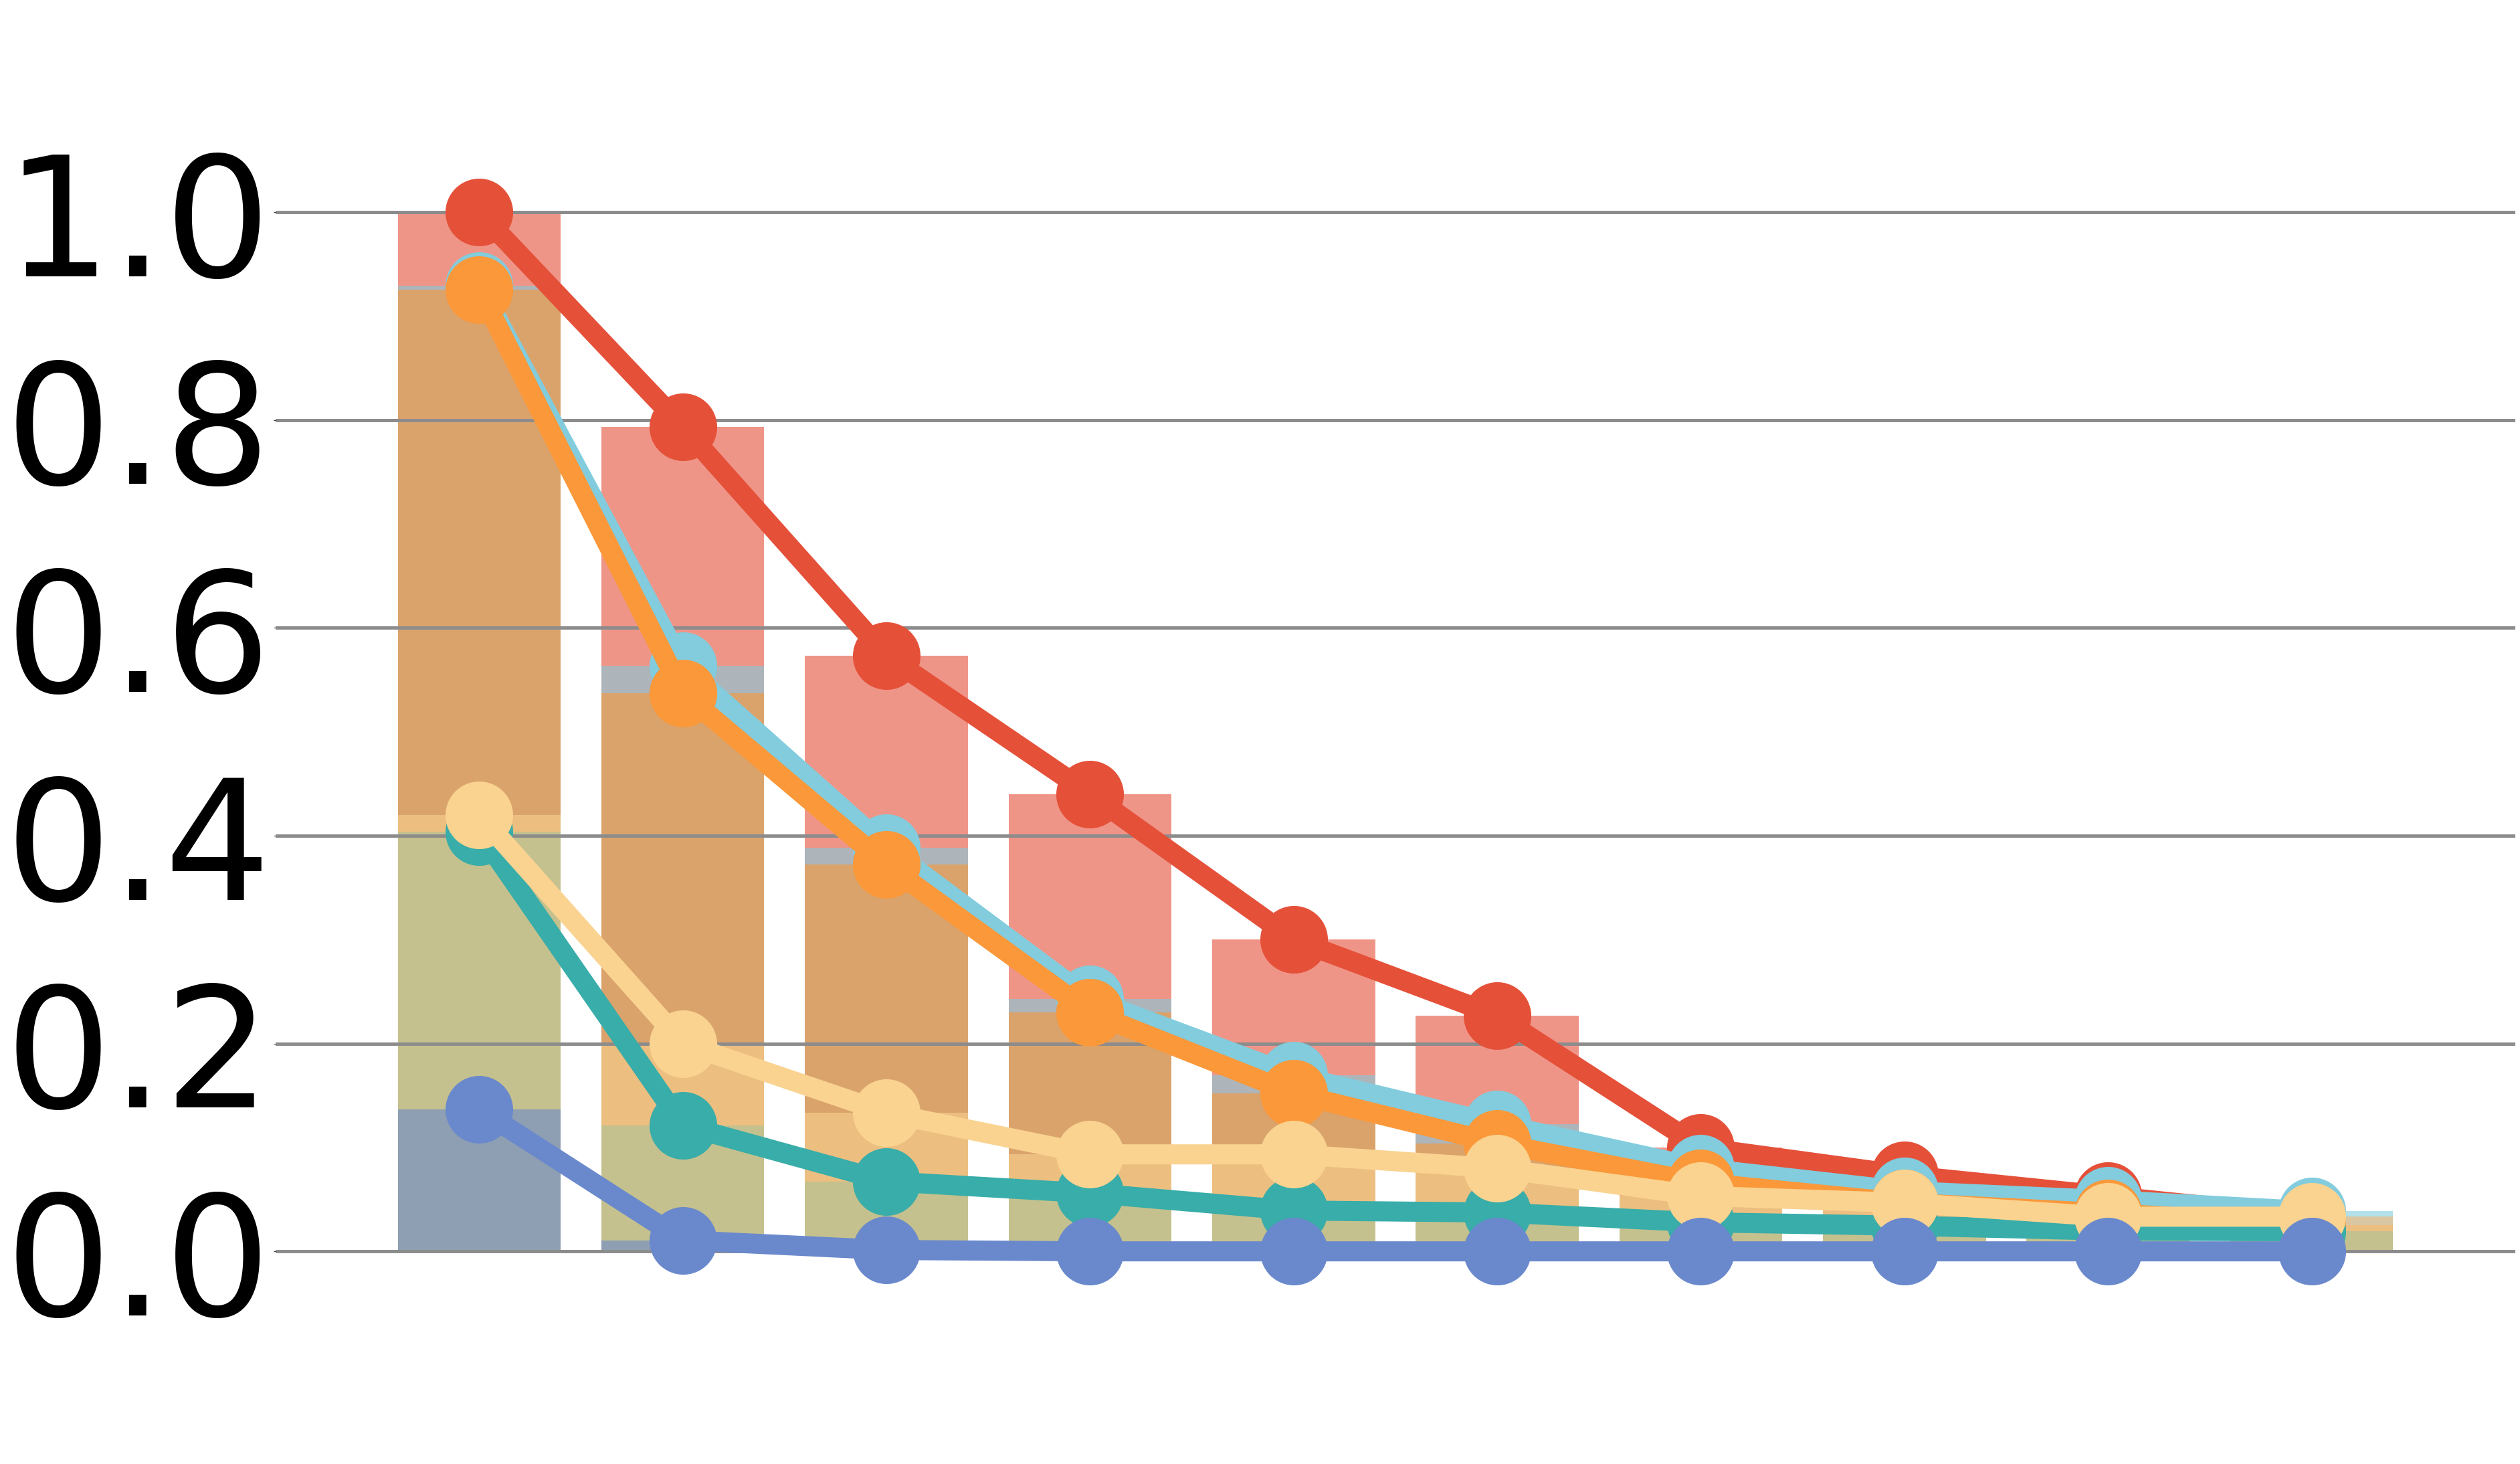

STOMACH
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 112.  88.  67.  54.  41.  38.  29.  26.  25.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[60. 30. 20. 12. 10. 10.  9.  9.  7.  6.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[56. 29. 21. 13. 10.  8.  8.  8.  8.  4.]
P-values dataframe  (150, 1077)
[56. 27. 23. 16. 15. 12.  8.  8.  5.  4.]
P-values dataframe  (150, 1077)
[65. 28. 18. 13. 12. 10.  8.  8.  7.  6.]
P-values dataframe  (150, 1077)
[63. 29. 22. 15. 13. 12. 11. 10.  7.  6.]
P-values dataframe  (150, 1077)
[66. 30. 21. 17. 13. 10.  9.  9.  6.  5.]
P-values dataframe  (150, 1077)
[63. 29. 21. 18. 13. 12.  9.  8.  8.  7.]
P-values dataframe  (150, 1077)
[68. 34. 28. 21. 20. 13. 10. 10.  7.  5.]
P-values dataframe  (150, 1077)
[61. 25. 19. 13. 11. 10.  8.  7.  6.  5.]
P-values dataframe  (150, 1077)
[61. 26. 21. 17. 13. 10.  9.  9.  9.  6.]
P-values dataframe  (150, 1077)
[68.

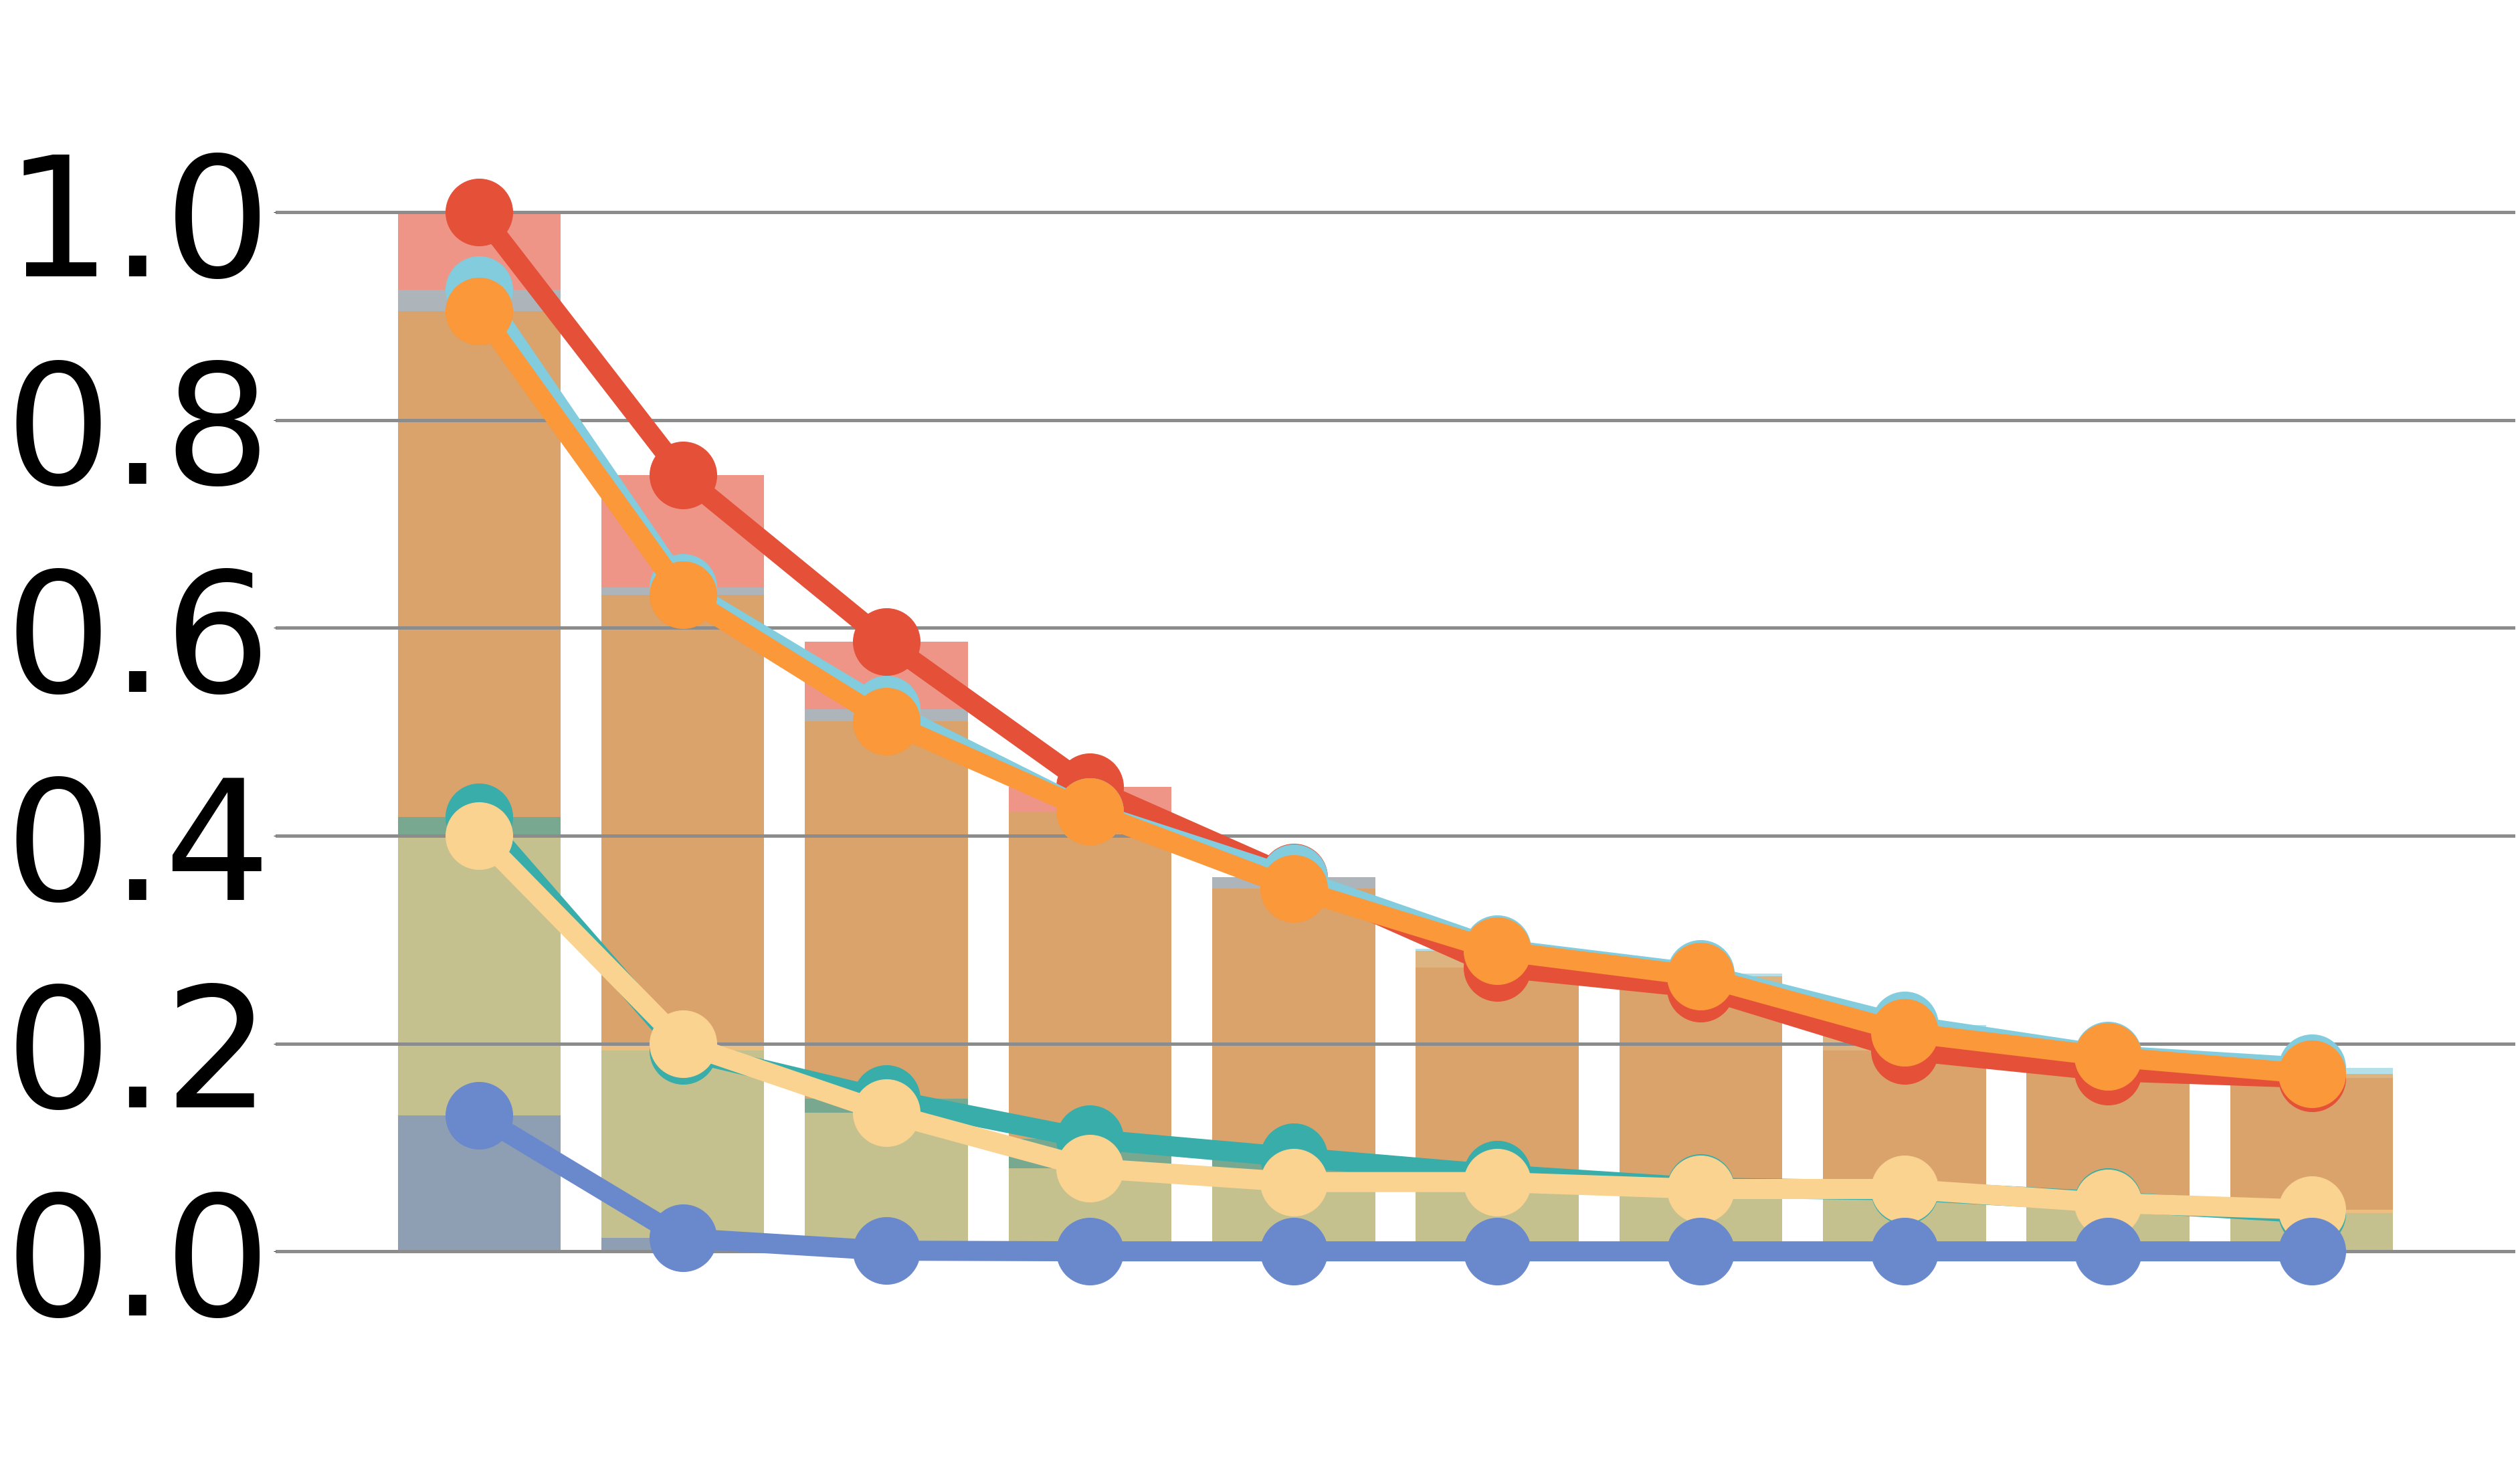

SKIN
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[149. 134. 117.  97.  85.  76.  70.  64.  58.  53.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[59. 19. 13.  8.  8.  6.  5.  5.  2.  2.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[52. 25. 14. 11. 10.  9.  9.  6.  2.  2.]
P-values dataframe  (150, 1077)
[53. 22. 14. 10.  9.  8.  7.  6.  4.  3.]
P-values dataframe  (150, 1077)
[52. 21. 14. 10. 10.  9.  7.  6.  3.  3.]
P-values dataframe  (150, 1077)
[54. 24. 15. 12. 11. 10.  6.  5.  4.  2.]
P-values dataframe  (150, 1077)
[53. 19. 15. 12. 10.  9.  6.  4.  3.  3.]
P-values dataframe  (150, 1077)
[45. 22. 13. 10.  7.  6.  5.  4.  2.  2.]
P-values dataframe  (150, 1077)
[52. 22. 14. 11.  9.  7.  5.  4.  2.  2.]
P-values dataframe  (150, 1077)
[48. 19. 15. 13. 12. 11. 11.  9.  6.  5.]
P-values dataframe  (150, 1077)
[55. 21. 17. 13. 10.  9.  8.  7.  4.  3.]
P-values dataframe  (150, 1077)
[53. 19

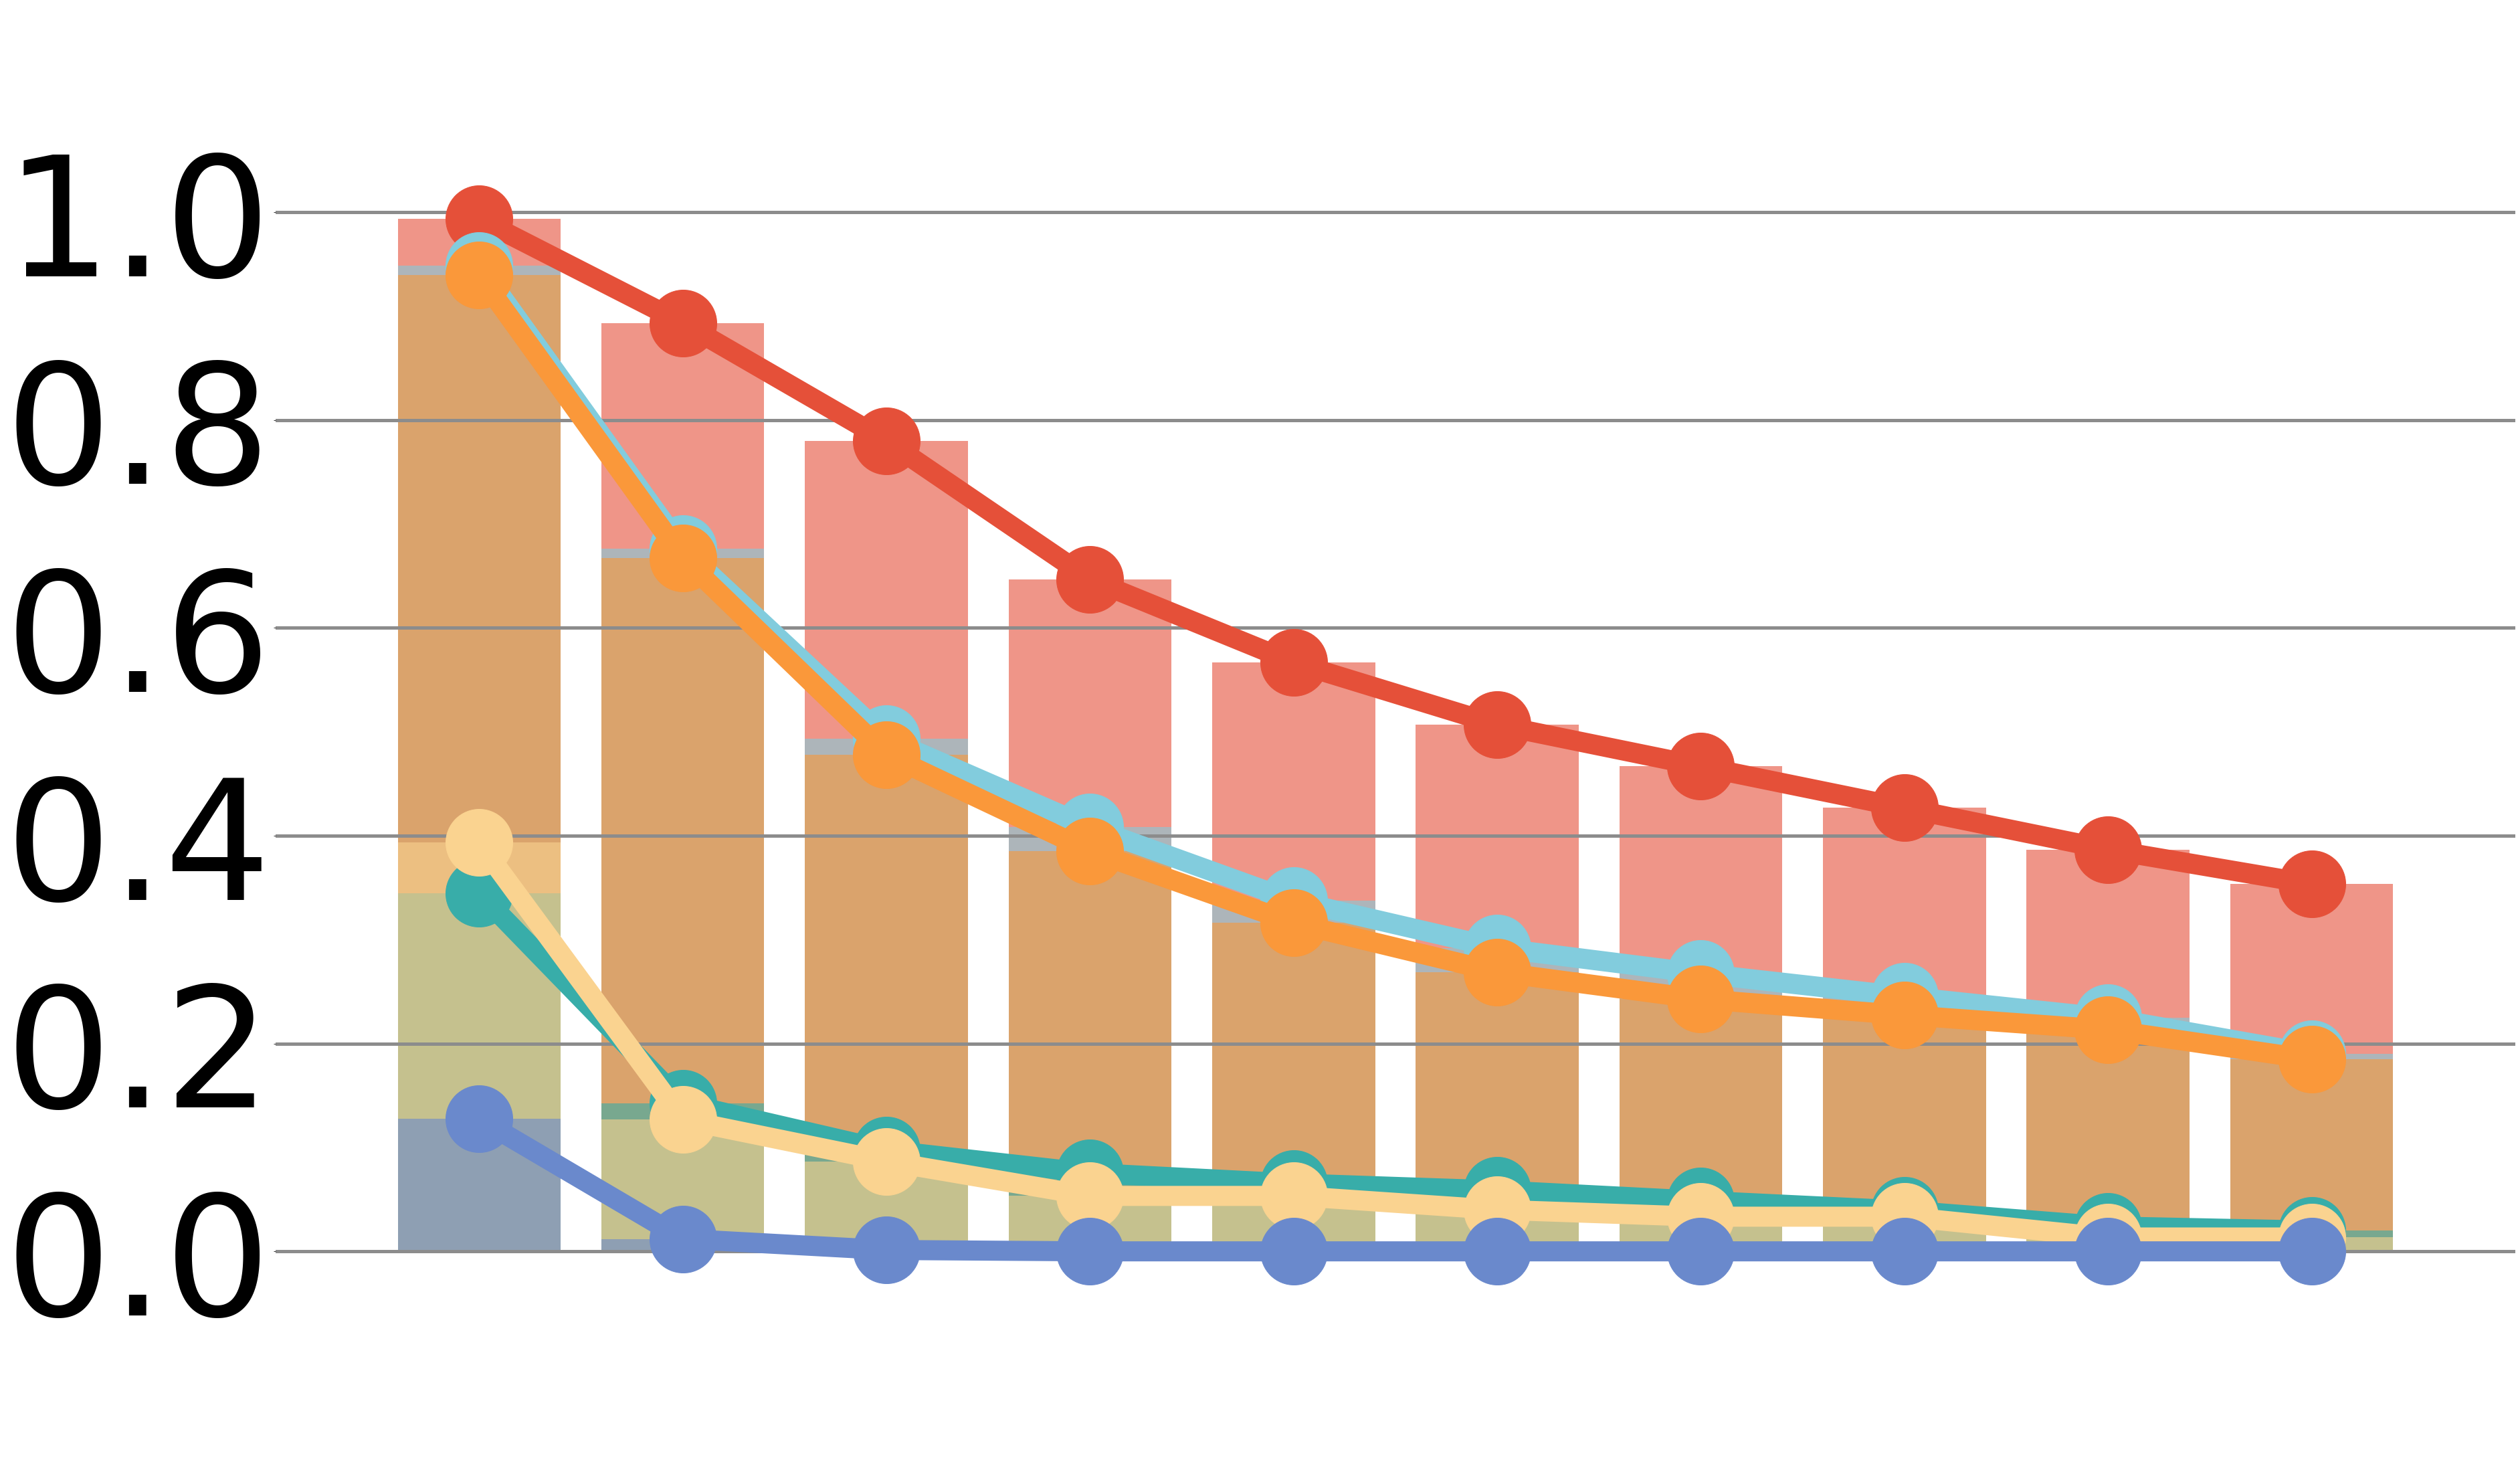

PROSTATE
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 106.  69.  49.  44.  40.  34.  34.  30.  25.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[57. 20. 12.  6.  4.  3.  3.  3.  1.  1.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[59. 18.  8.  6.  5.  5.  5.  5.  5.  4.]
P-values dataframe  (150, 1077)
[70. 25. 12.  7.  4.  3.  3.  2.  2.  2.]
P-values dataframe  (150, 1077)
[57. 22.  8.  6.  5.  5.  5.  5.  3.  3.]
P-values dataframe  (150, 1077)
[56. 21. 10.  5.  4.  2.  2.  2.  2.  2.]
P-values dataframe  (150, 1077)
[45. 14. 10.  8.  7.  6.  5.  5.  5.  4.]
P-values dataframe  (150, 1077)
[57. 19.  9.  5.  5.  4.  4.  3.  2.  2.]
P-values dataframe  (150, 1077)
[54. 16.  8.  7.  5.  5.  5.  4.  4.  3.]
P-values dataframe  (150, 1077)
[59. 22. 16. 10.  9.  8.  6.  5.  4.  4.]
P-values dataframe  (150, 1077)
[59. 18.  7.  6.  4.  3.  3.  3.  3.  3.]
P-values dataframe  (150, 1077)
[49

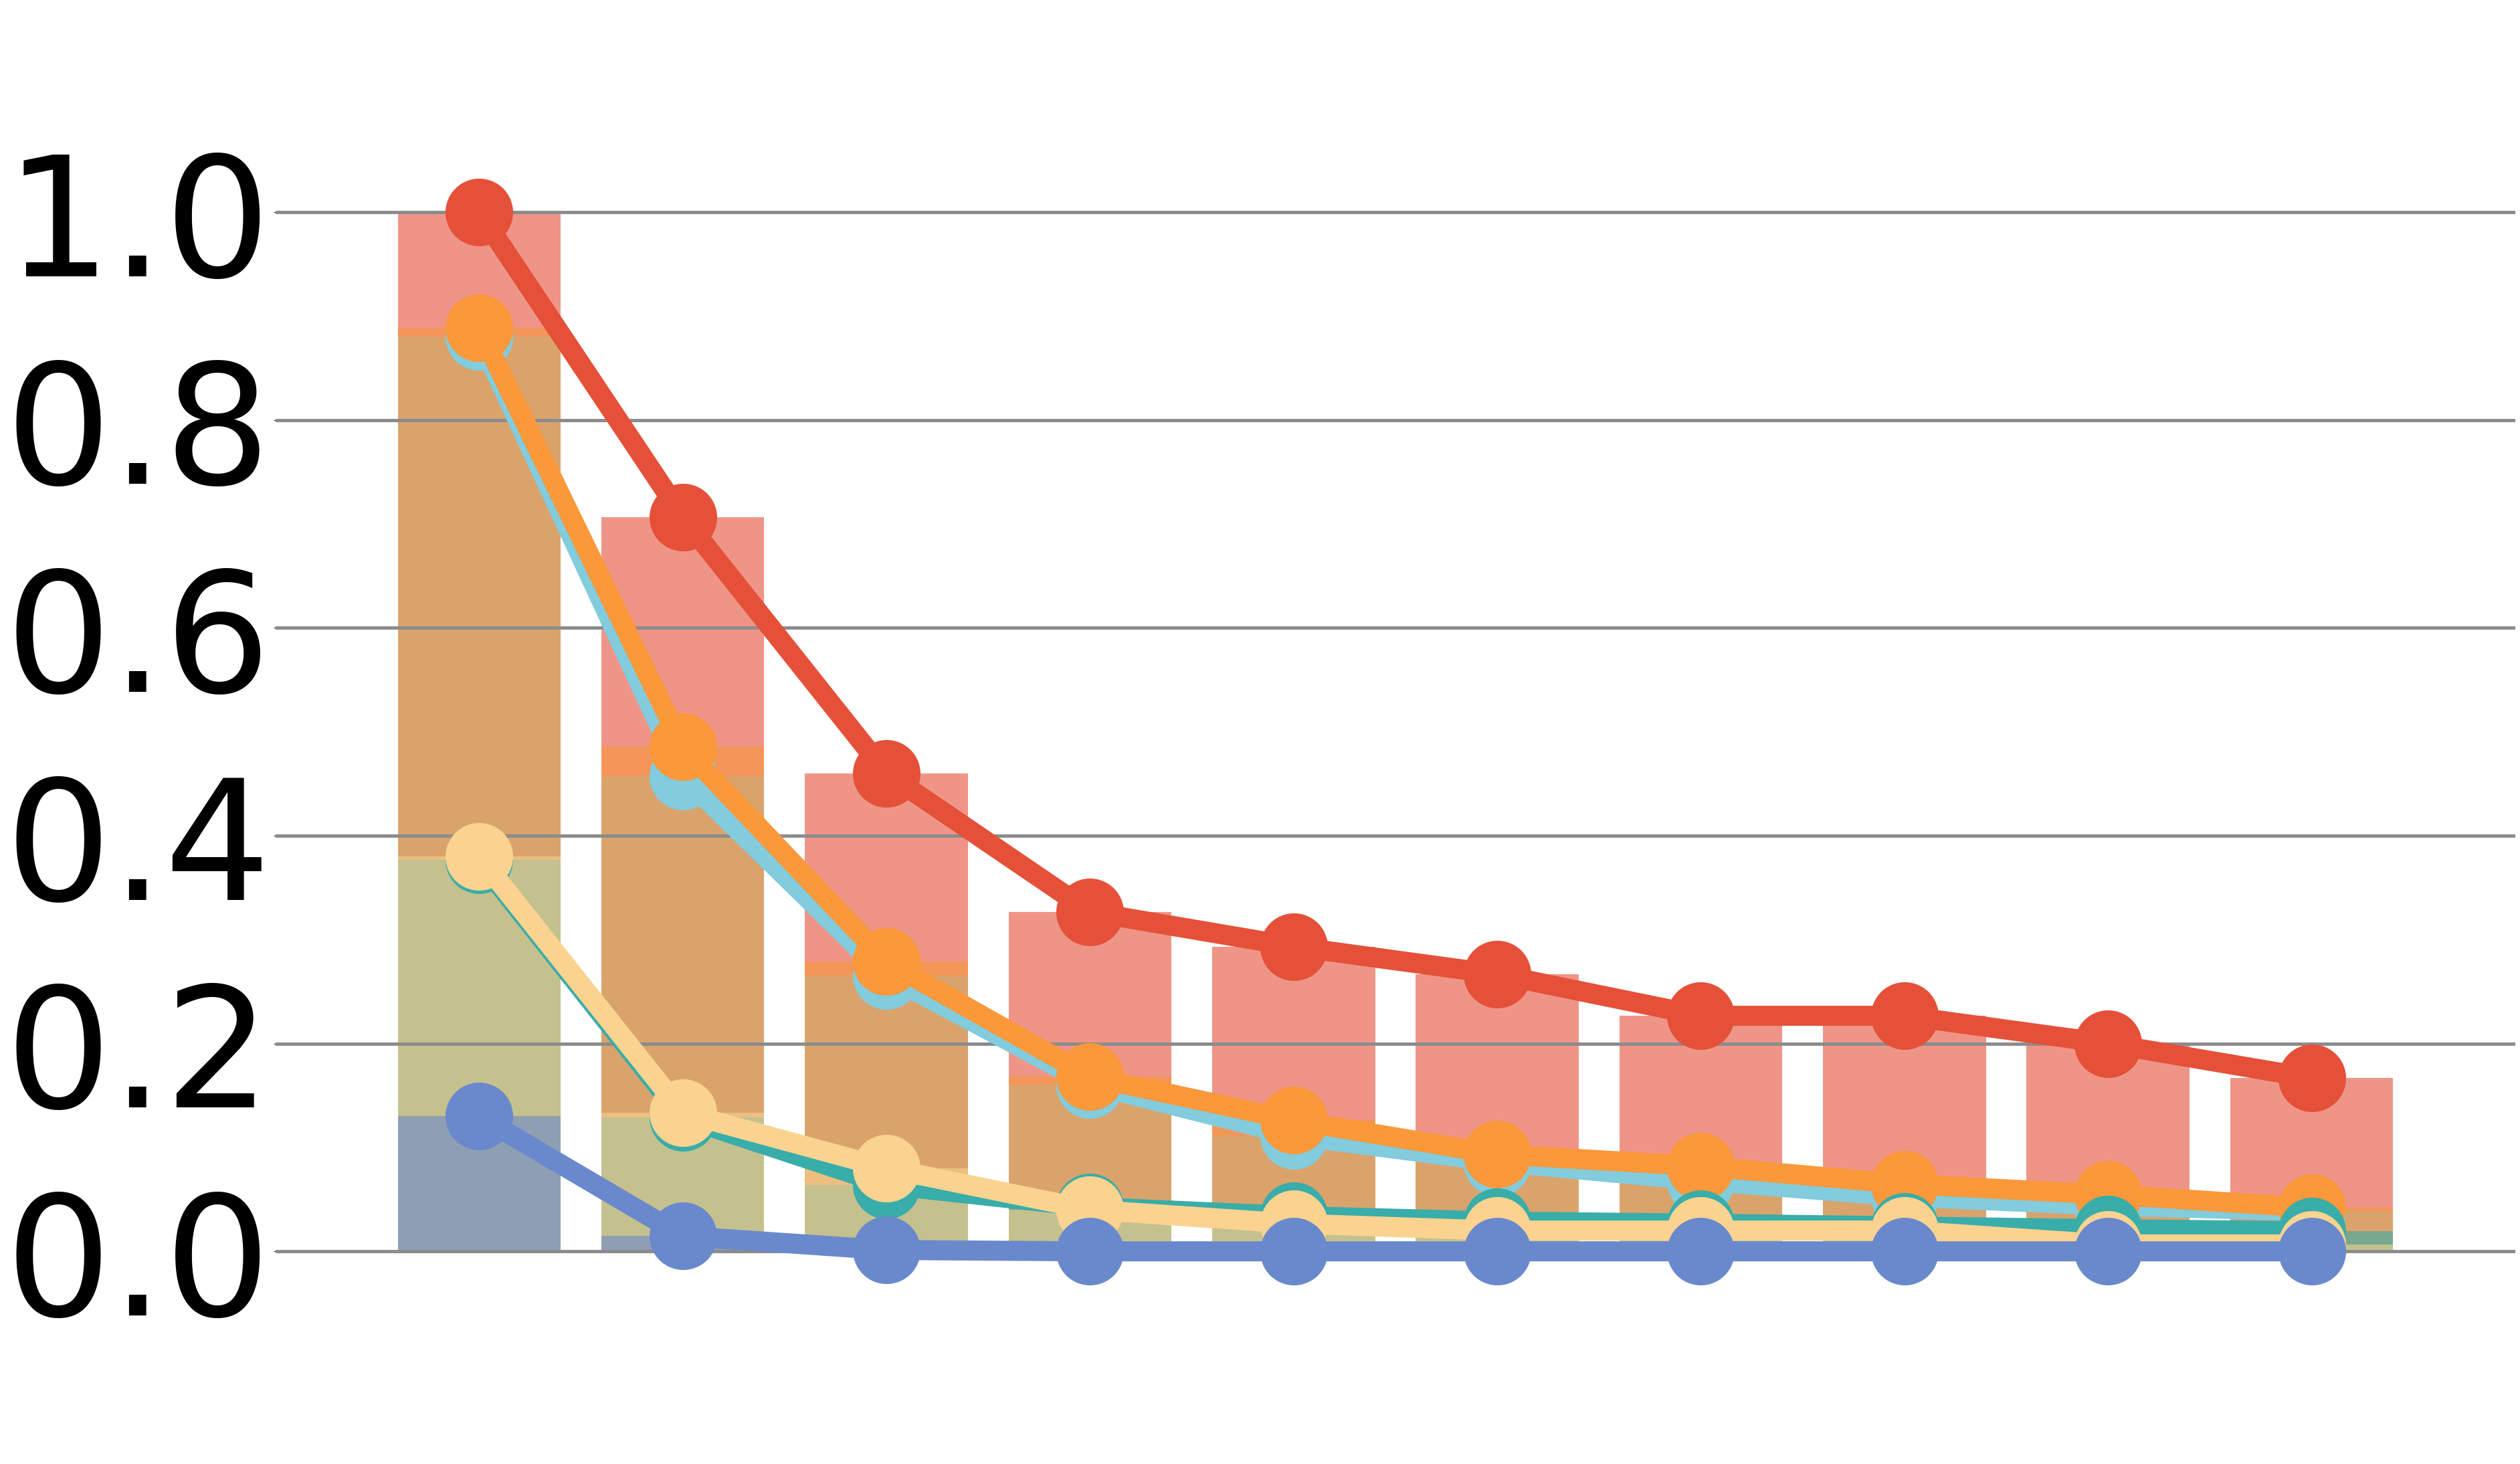

THYROID
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[143.  97.  49.  29.  26.  22.  18.  13.  10.  10.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[48. 12.  6.  5.  5.  4.  2.  1.  1.  0.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[40. 12.  7.  6.  6.  5.  2.  2.  2.  1.]
P-values dataframe  (150, 1077)
[46. 13.  9.  6.  4.  4.  3.  3.  3.  2.]
P-values dataframe  (150, 1077)
[43. 11.  6.  4.  3.  3.  3.  3.  3.  1.]
P-values dataframe  (150, 1077)
[41. 10.  5.  4.  4.  3.  3.  3.  3.  2.]
P-values dataframe  (150, 1077)
[45. 12.  5.  4.  3.  2.  2.  2.  2.  1.]
P-values dataframe  (150, 1077)
[45. 13.  9.  6.  5.  3.  3.  2.  2.  1.]
P-values dataframe  (150, 1077)
[40. 14.  8.  7.  5.  4.  4.  4.  3.  1.]
P-values dataframe  (150, 1077)
[50. 16.  9.  7.  6.  5.  3.  3.  3.  2.]
P-values dataframe  (150, 1077)
[46. 15.  7.  6.  6.  5.  3.  3.  3.  2.]
P-values dataframe  (150, 1077)
[50.

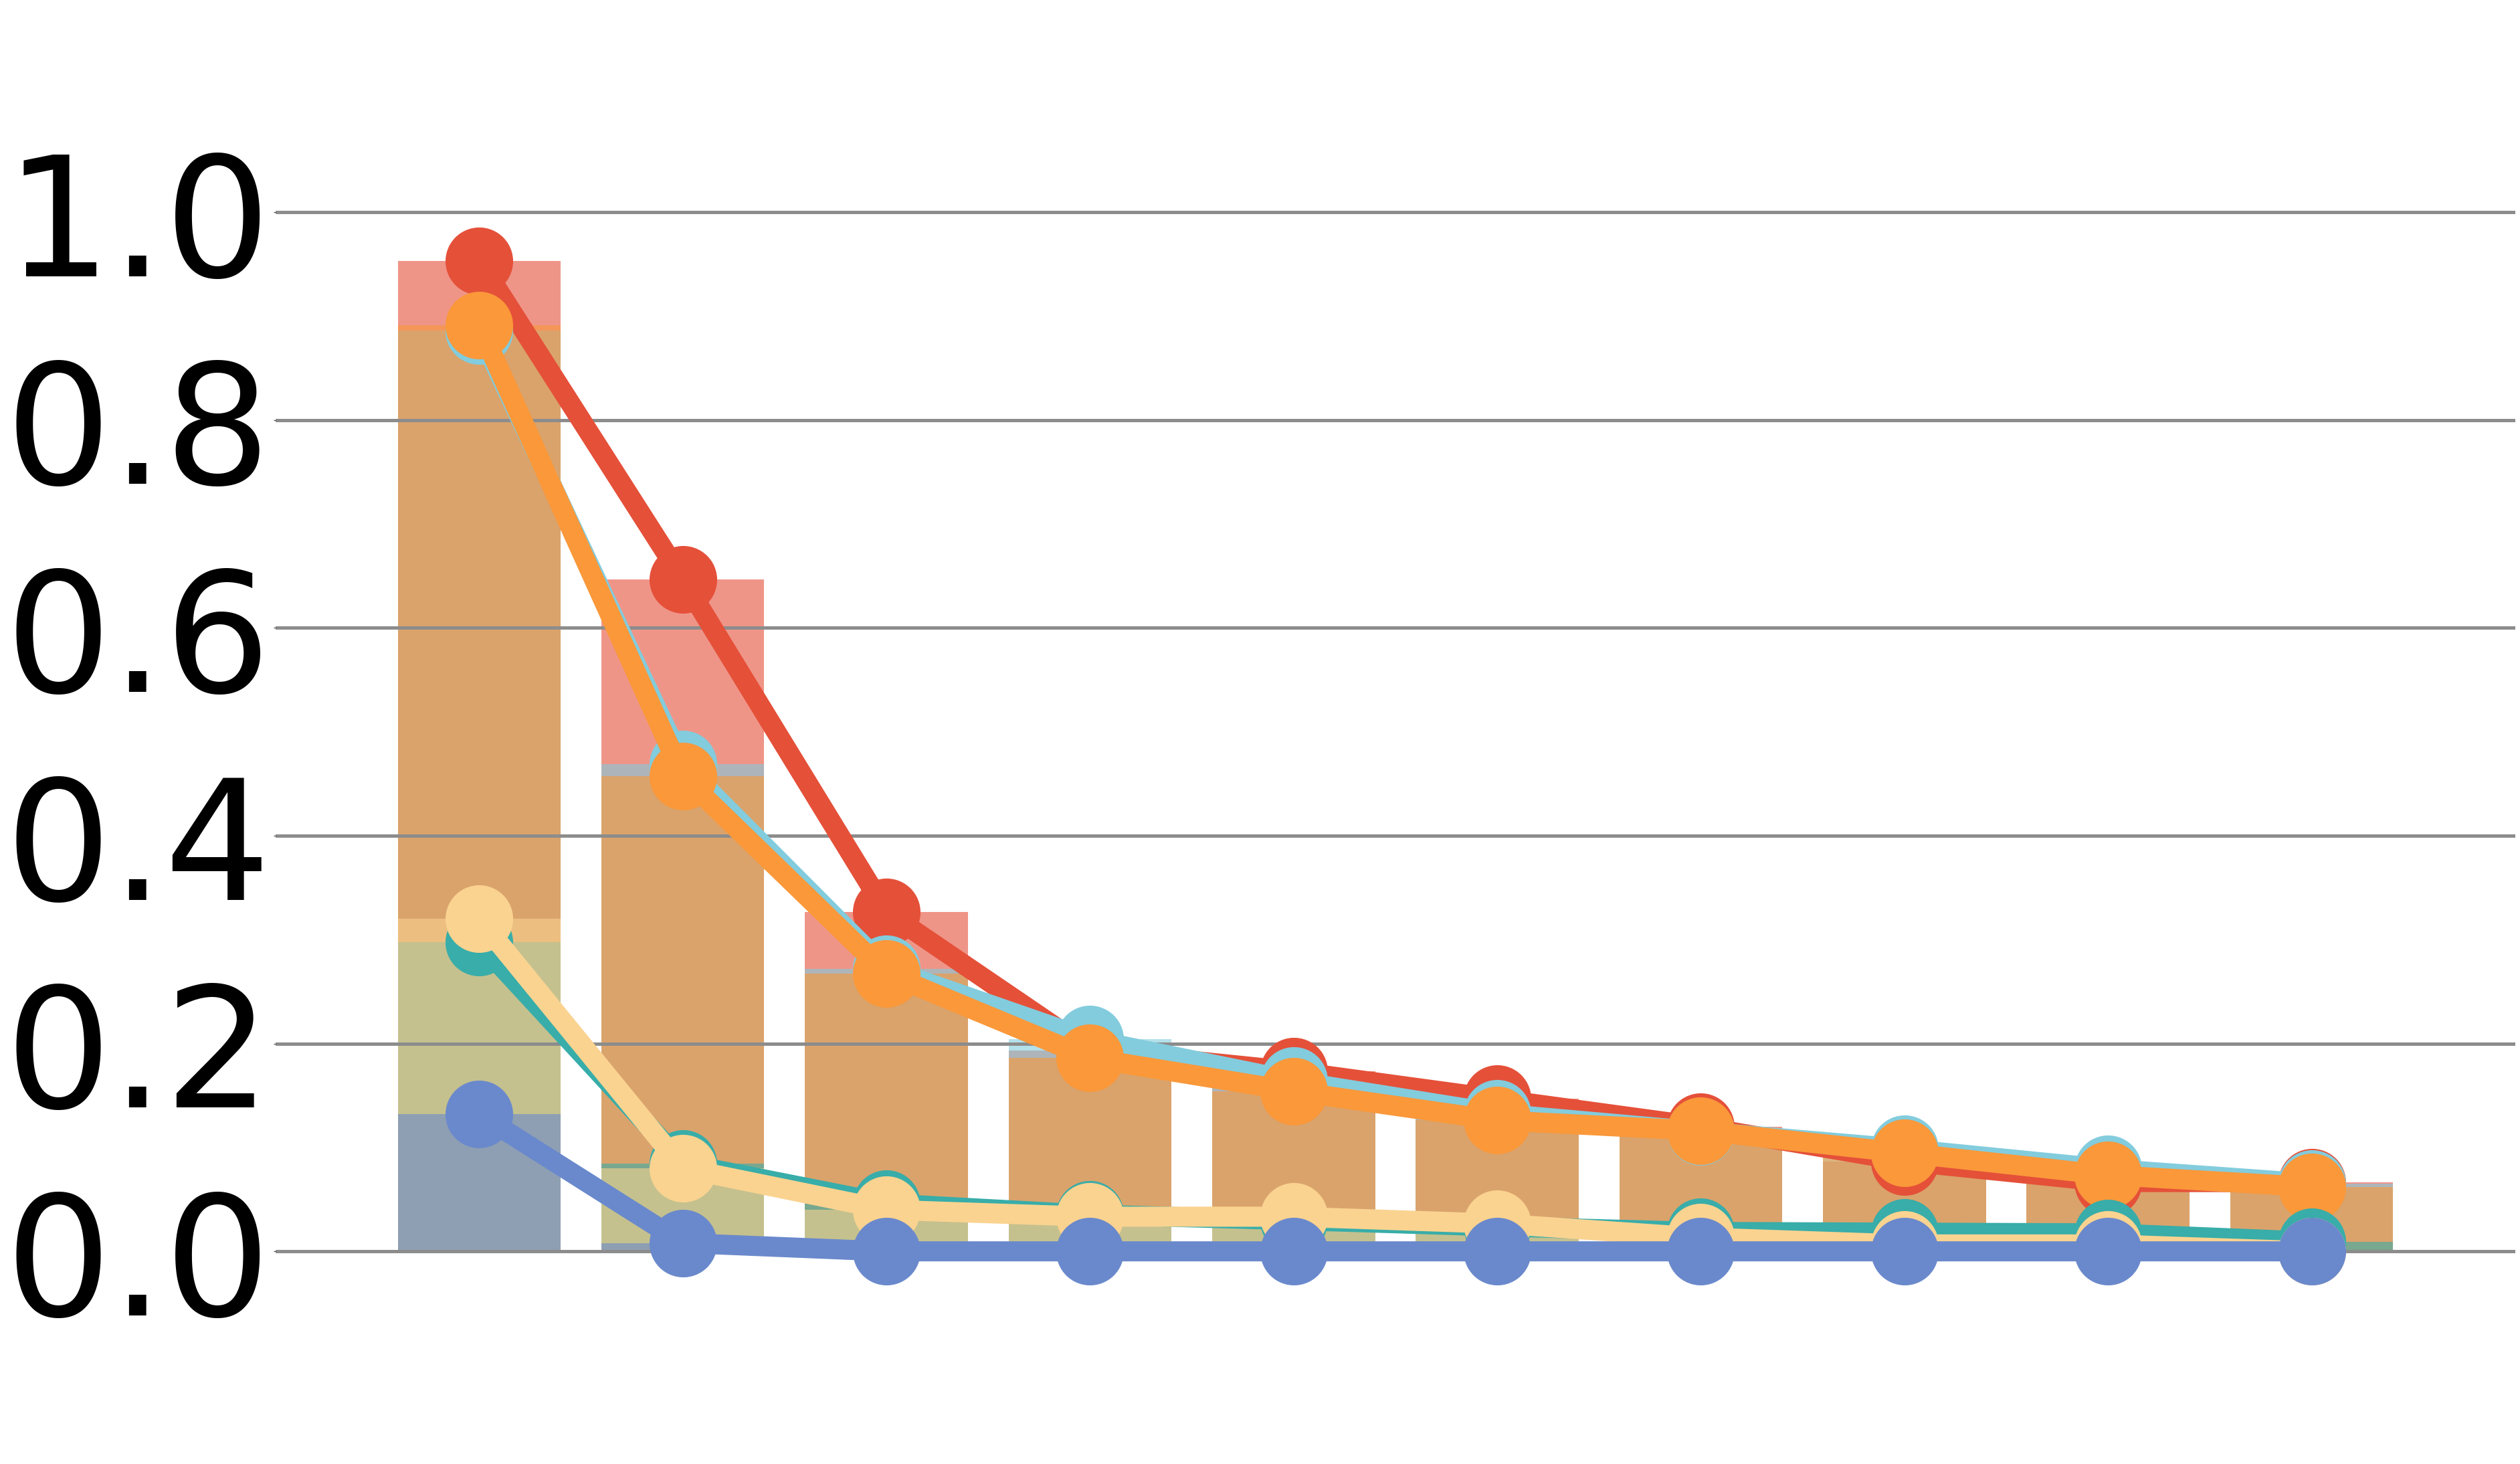

UTERINE
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[146. 135. 128. 128. 115. 104. 100.  96.  87.  79.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[62. 23. 17.  9.  8.  4.  4.  2.  2.  2.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[40. 11.  5.  4.  3.  3.  3.  3.  3.  1.]
P-values dataframe  (150, 1077)
[44. 12.  8.  5.  5.  5.  5.  3.  2.  2.]
P-values dataframe  (150, 1077)
[40. 12.  6.  6.  4.  4.  4.  3.  2.  2.]
P-values dataframe  (150, 1077)
[40. 12.  8.  6.  3.  3.  3.  2.  2.  2.]
P-values dataframe  (150, 1077)
[52. 13.  9.  8.  7.  6.  5.  3.  3.  3.]
P-values dataframe  (150, 1077)
[44. 14.  8.  8.  6.  4.  4.  3.  3.  3.]
P-values dataframe  (150, 1077)
[43. 13.  6.  6.  5.  4.  4.  2.  1.  1.]
P-values dataframe  (150, 1077)
[50. 16.  9.  7.  5.  3.  3.  2.  2.  2.]
P-values dataframe  (150, 1077)
[37. 10.  5.  5.  5.  4.  3.  2.  1.  1.]
P-values dataframe  (150, 1077)
[39.

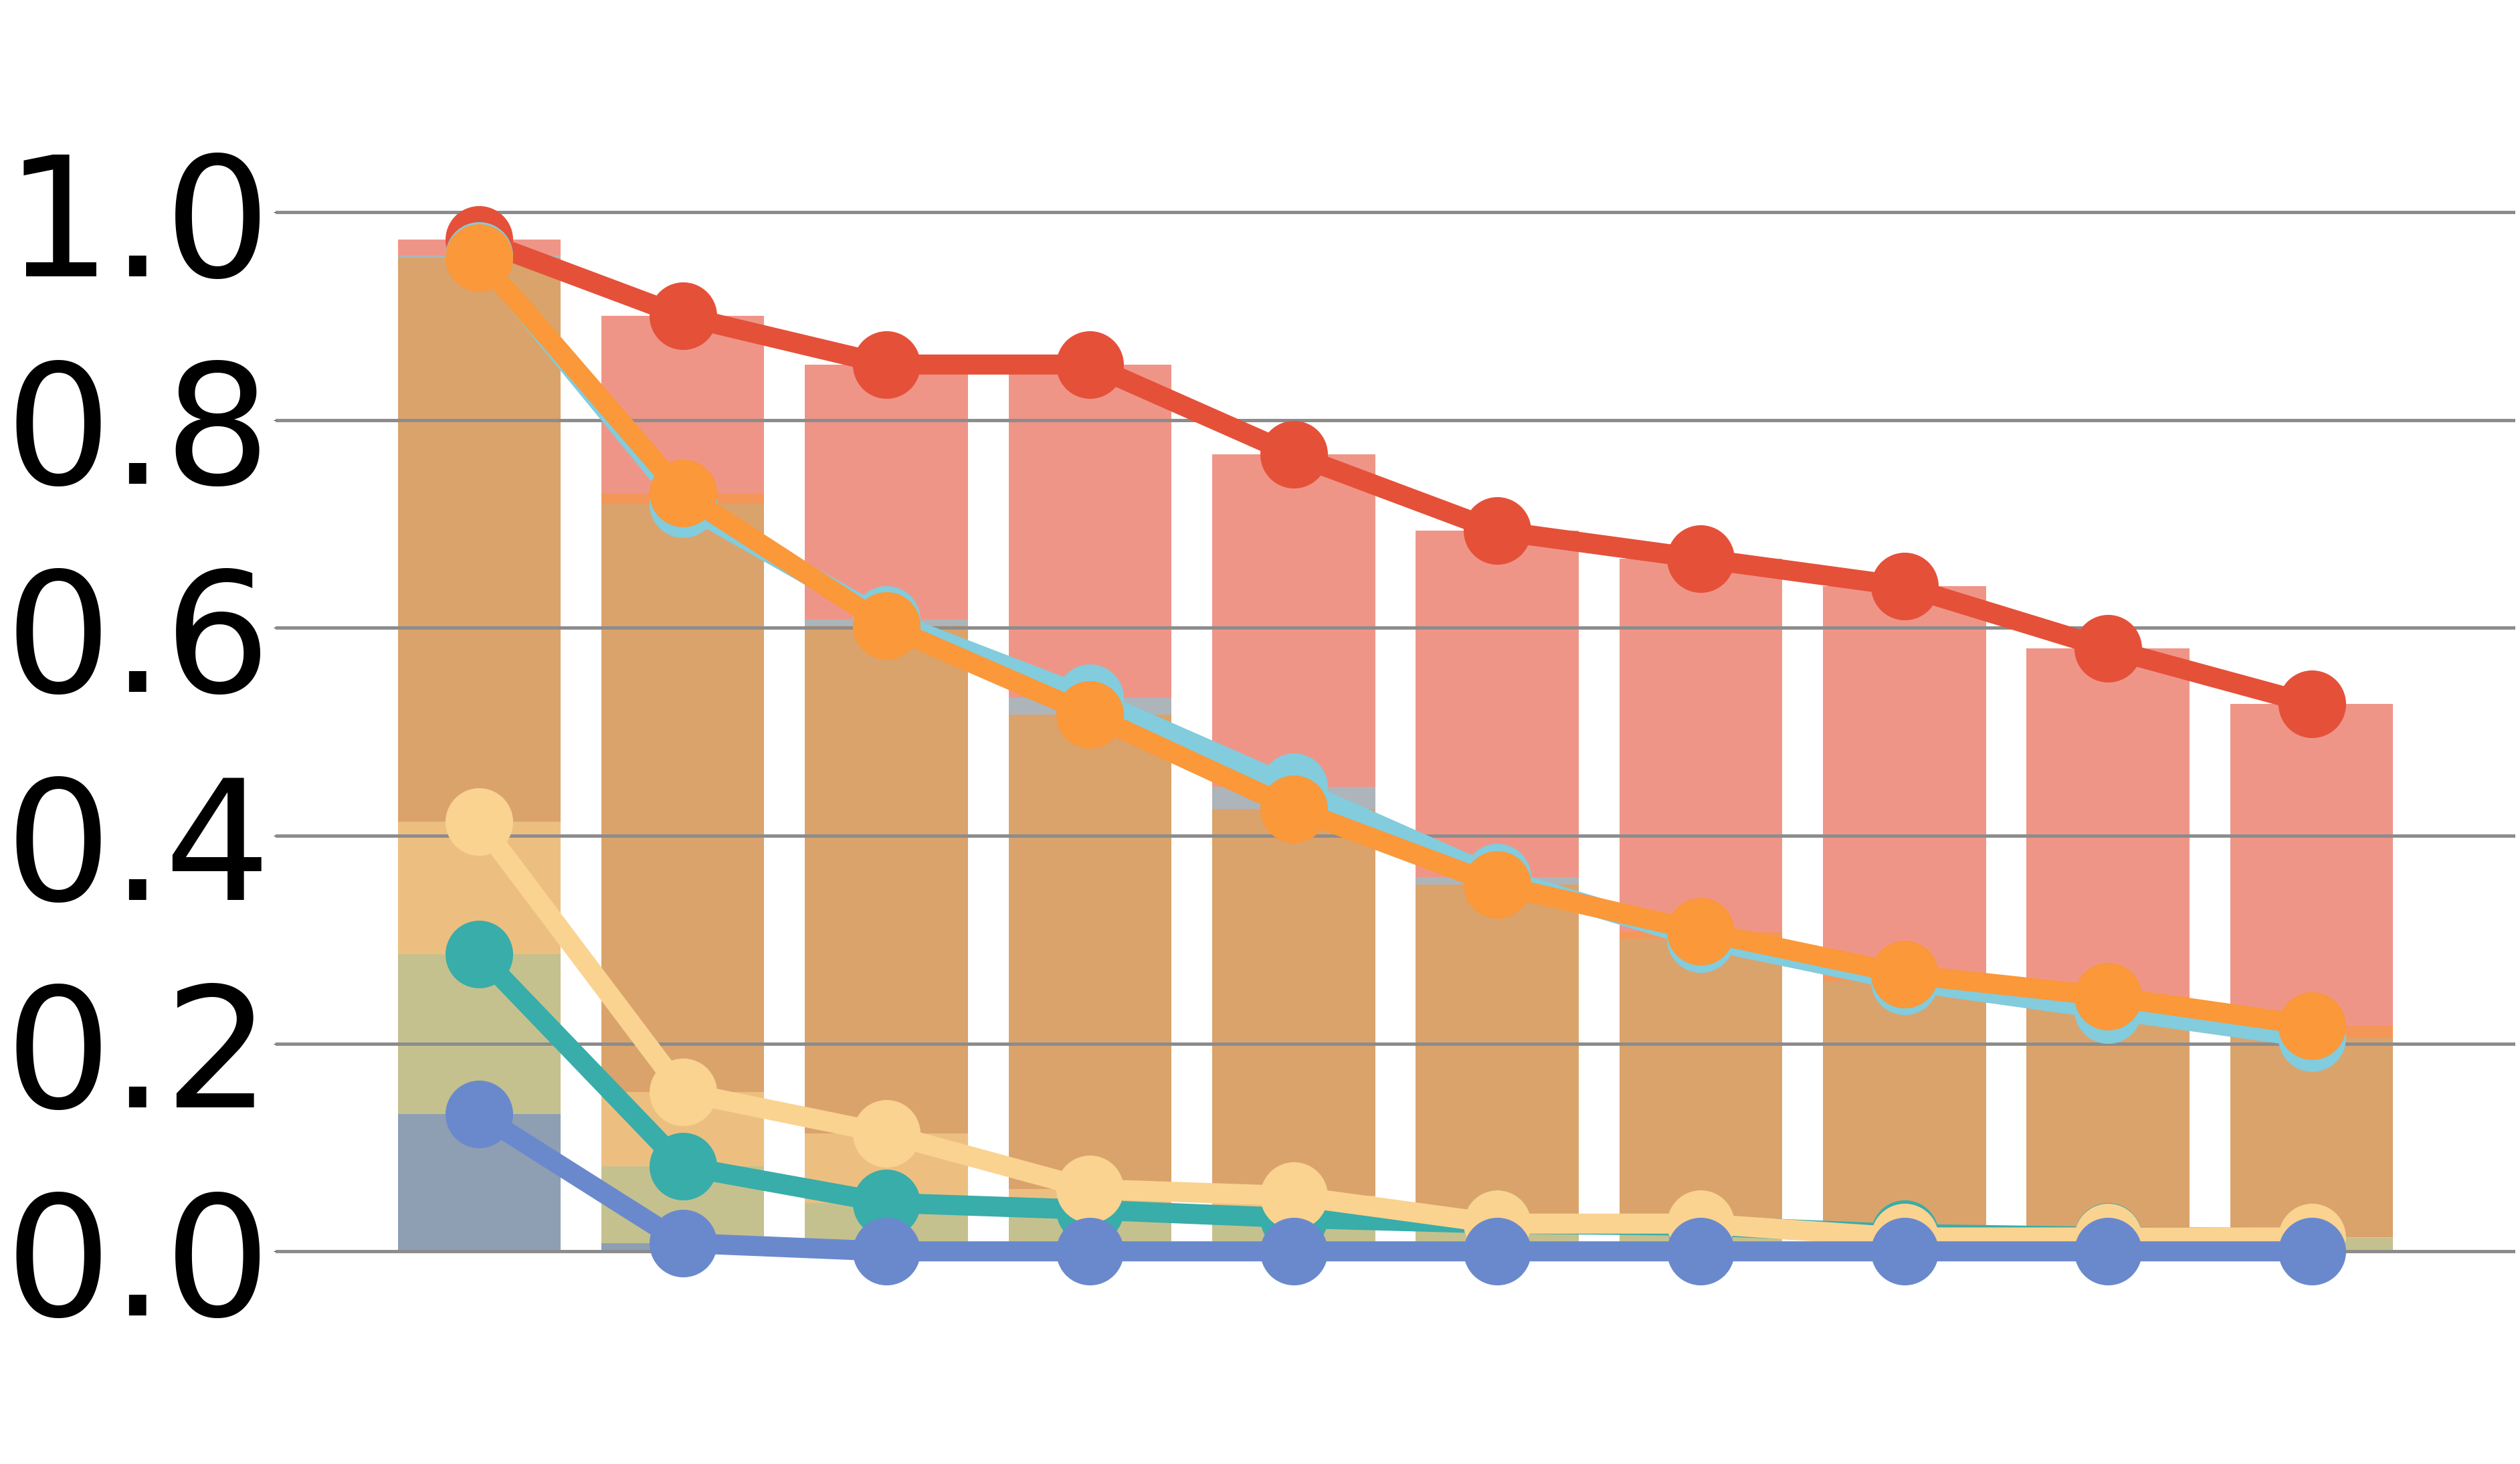

HEAD_NECK
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 142. 101.  89.  75.  62.  61.  55.  41.  35.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[55. 17. 11.  9.  8.  6.  4.  3.  3.  3.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[39. 13.  7.  5.  2.  2.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[36.  9.  4.  3.  2.  2.  2.  2.  2.  1.]
P-values dataframe  (150, 1077)
[33. 12.  5.  5.  4.  3.  3.  2.  2.  2.]
P-values dataframe  (150, 1077)
[36. 10.  6.  3.  2.  2.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[30. 10.  6.  5.  2.  2.  2.  2.  2.  1.]
P-values dataframe  (150, 1077)
[35.  8.  4.  3.  2.  2.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[39. 13.  9.  7.  4.  4.  4.  3.  3.  2.]
P-values dataframe  (150, 1077)
[34.  8.  4.  4.  3.  3.  2.  1.  1.  1.]
P-values dataframe  (150, 1077)
[38. 12.  6.  5.  4.  3.  3.  2.  2.  2.]
P-values dataframe  (150, 1077)
[3

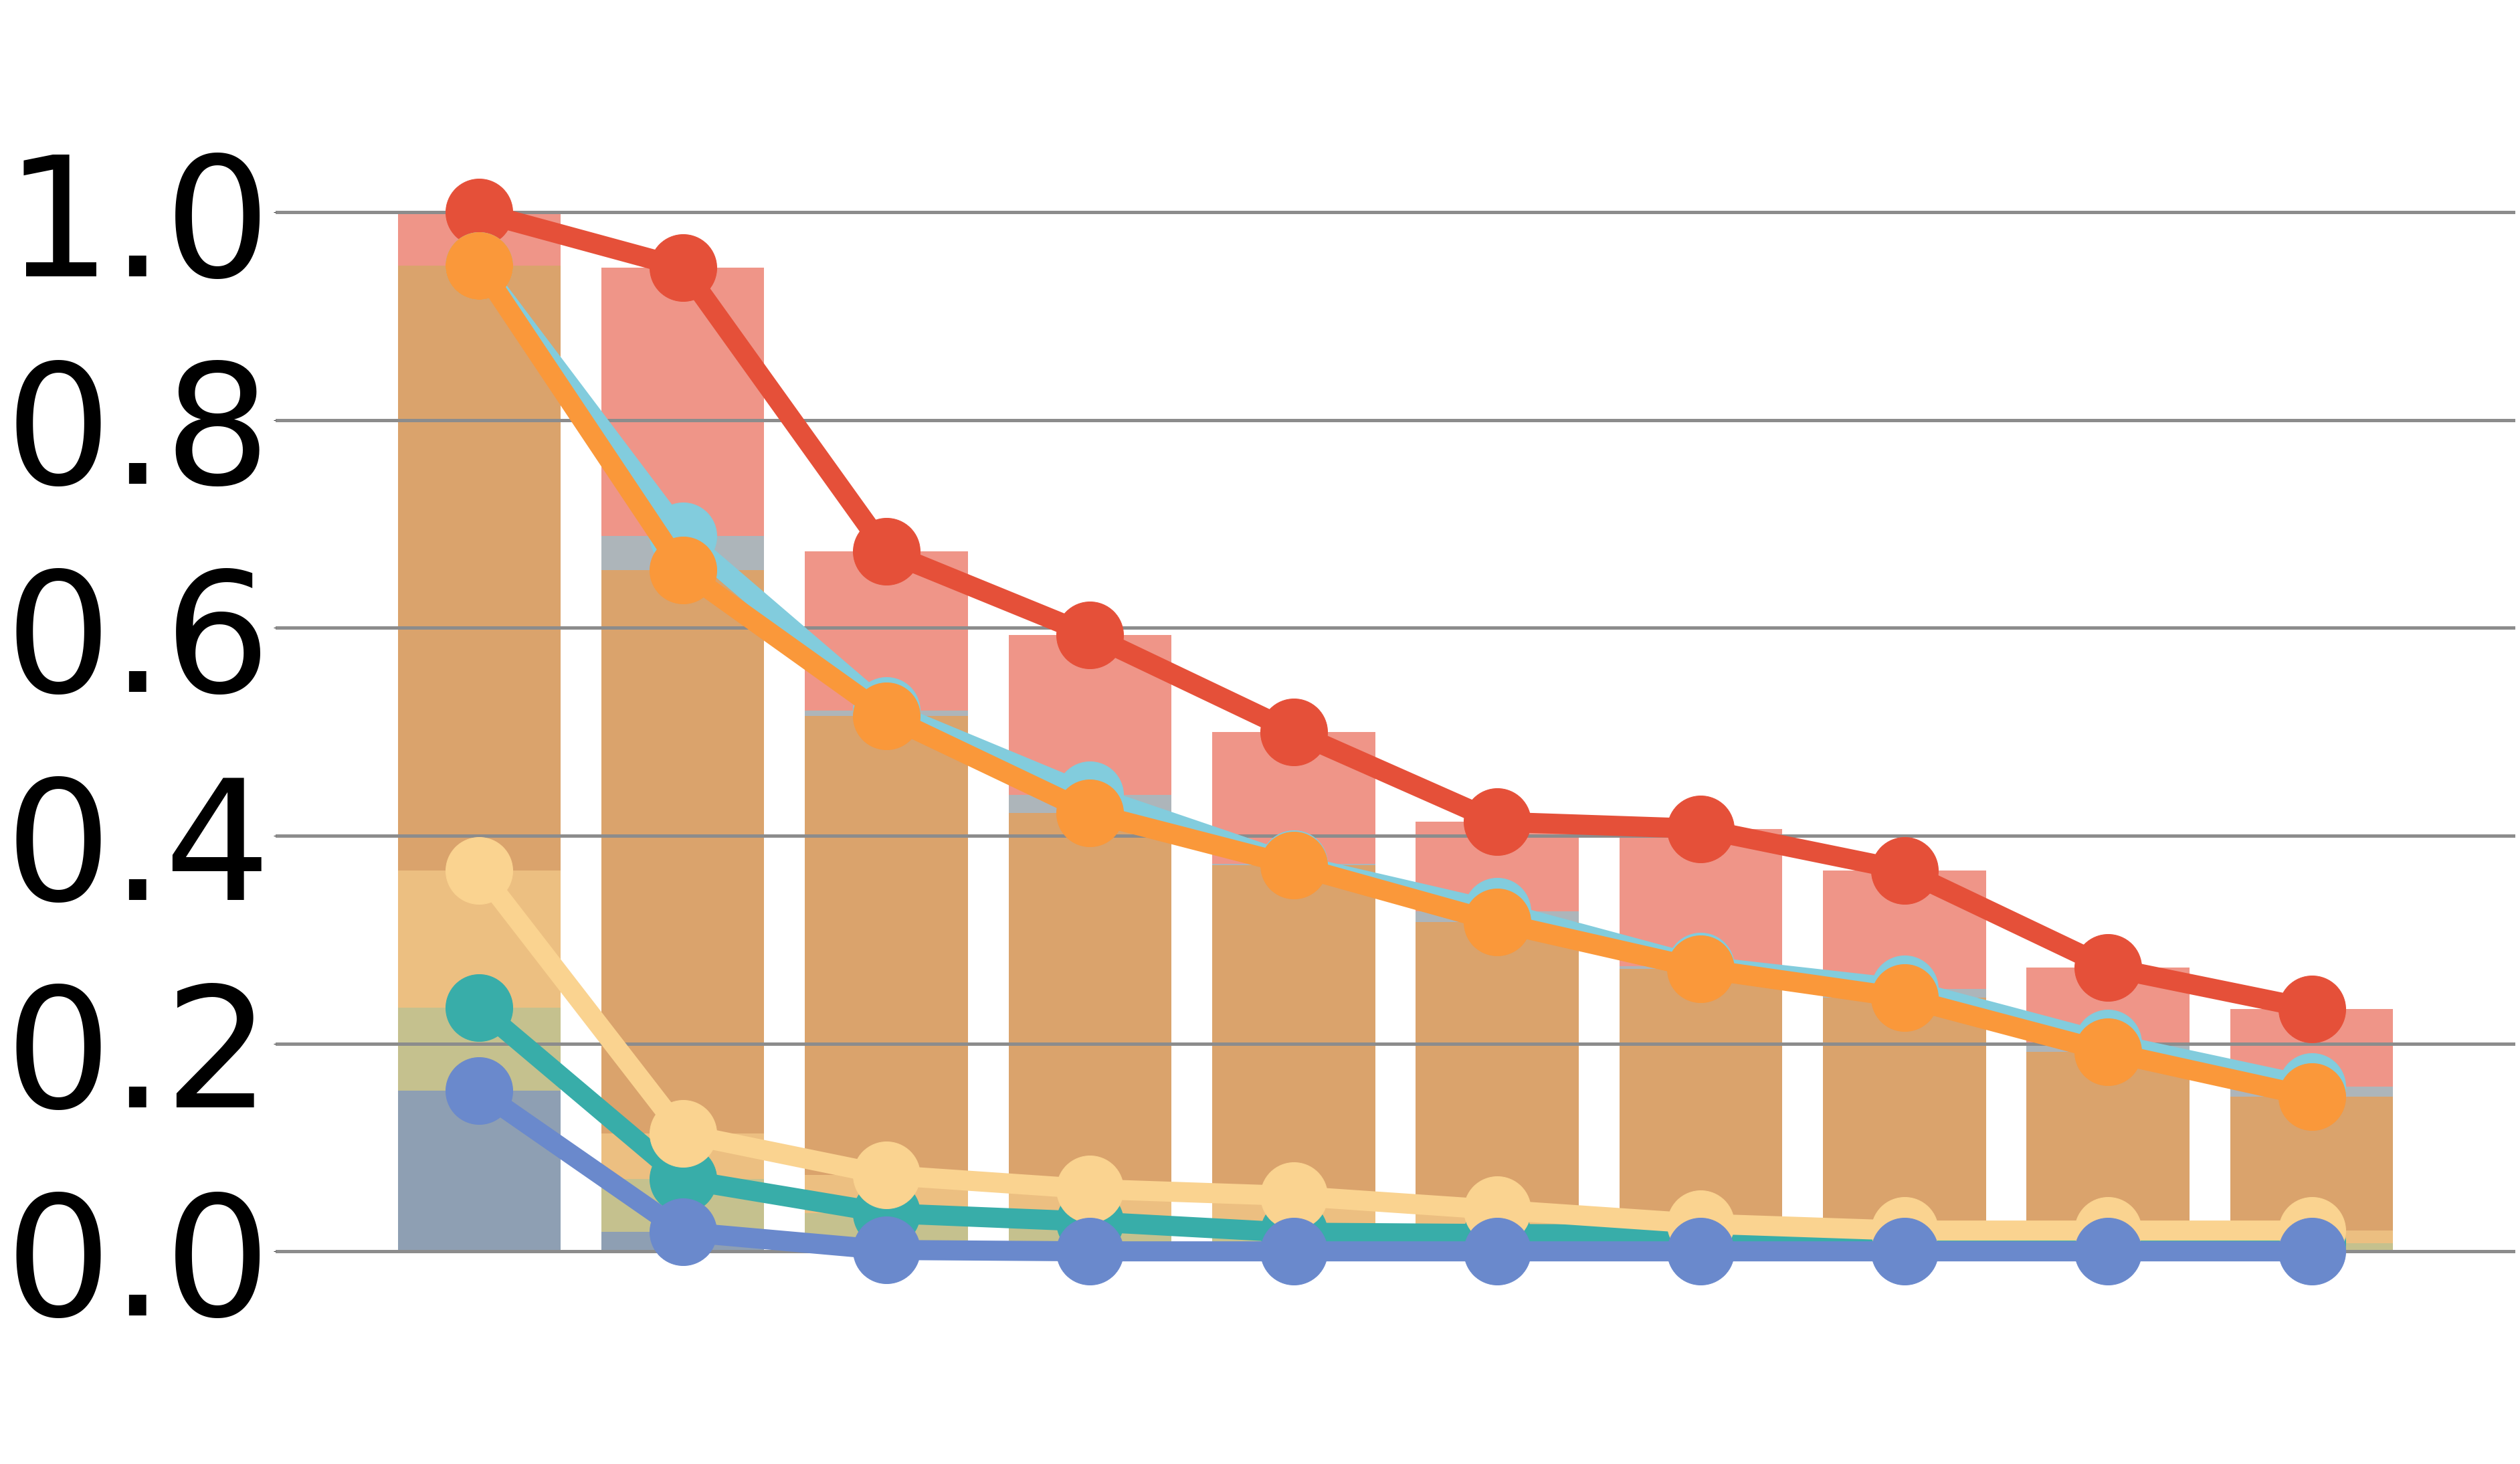

PANCREAS
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[148. 103.  74.  60.  52.  42.  29.  22.  18.  15.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[34. 13.  6.  5.  5.  4.  3.  2.  1.  1.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[33.  7.  2.  2.  2.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[41.  8.  1.  0.  0.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[34.  6.  1.  0.  0.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[30.  6.  0.  0.  0.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[29.  5.  1.  1.  1.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[32.  5.  0.  0.  0.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[37.  4.  0.  0.  0.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[36.  4.  2.  1.  1.  1.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[30.  6.  0.  0.  0.  0.  0.  0.  0.  0.]
P-values dataframe  (150, 1077)
[24

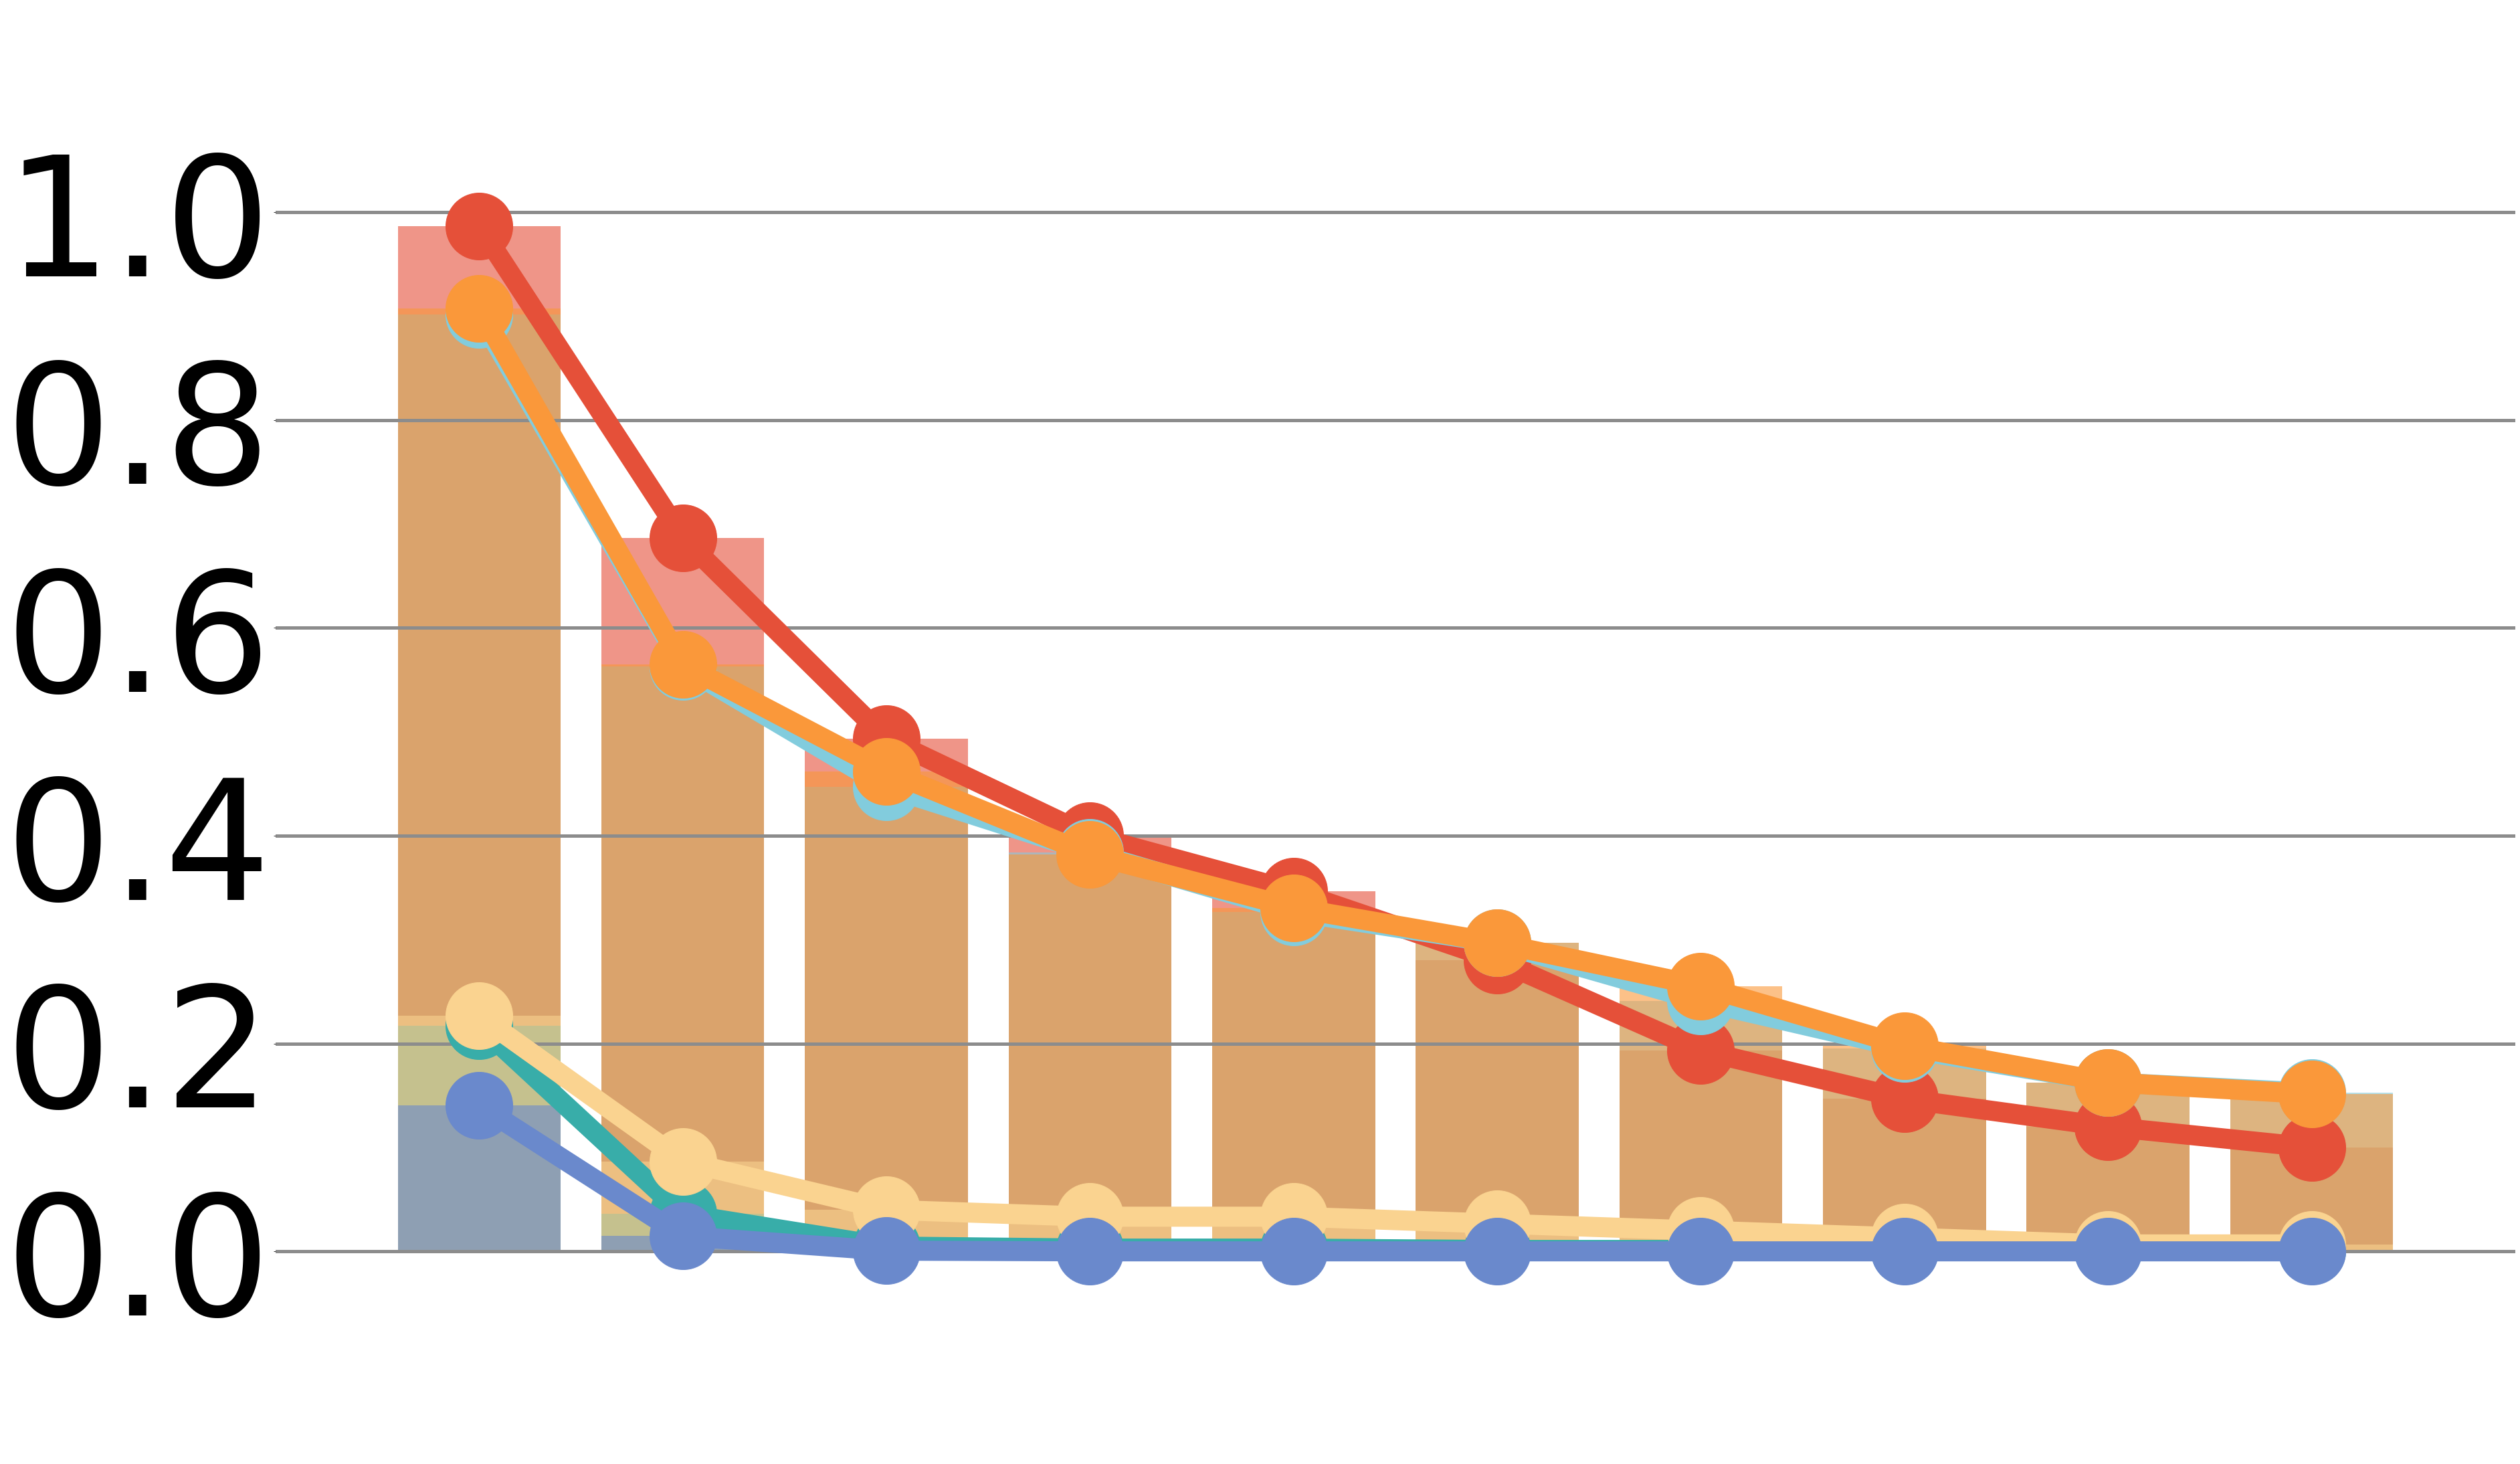

CERVICAL
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[149. 127. 105.  95.  76.  69.  65.  60.  55.  52.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[45.  9.  4.  4.  2.  2.  2.  1.  1.  1.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[50. 15.  7.  4.  3.  2.  2.  2.  2.  2.]
P-values dataframe  (150, 1077)
[51. 12.  3.  2.  2.  1.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[43. 11.  5.  2.  2.  1.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[56. 15.  7.  4.  2.  2.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[48. 10.  6.  3.  2.  2.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[52. 13.  3.  2.  2.  1.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[49. 15.  5.  4.  3.  2.  1.  1.  0.  0.]
P-values dataframe  (150, 1077)
[55. 18.  6.  2.  2.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[51. 13.  5.  3.  3.  2.  1.  1.  1.  1.]
P-values dataframe  (150, 1077)
[48

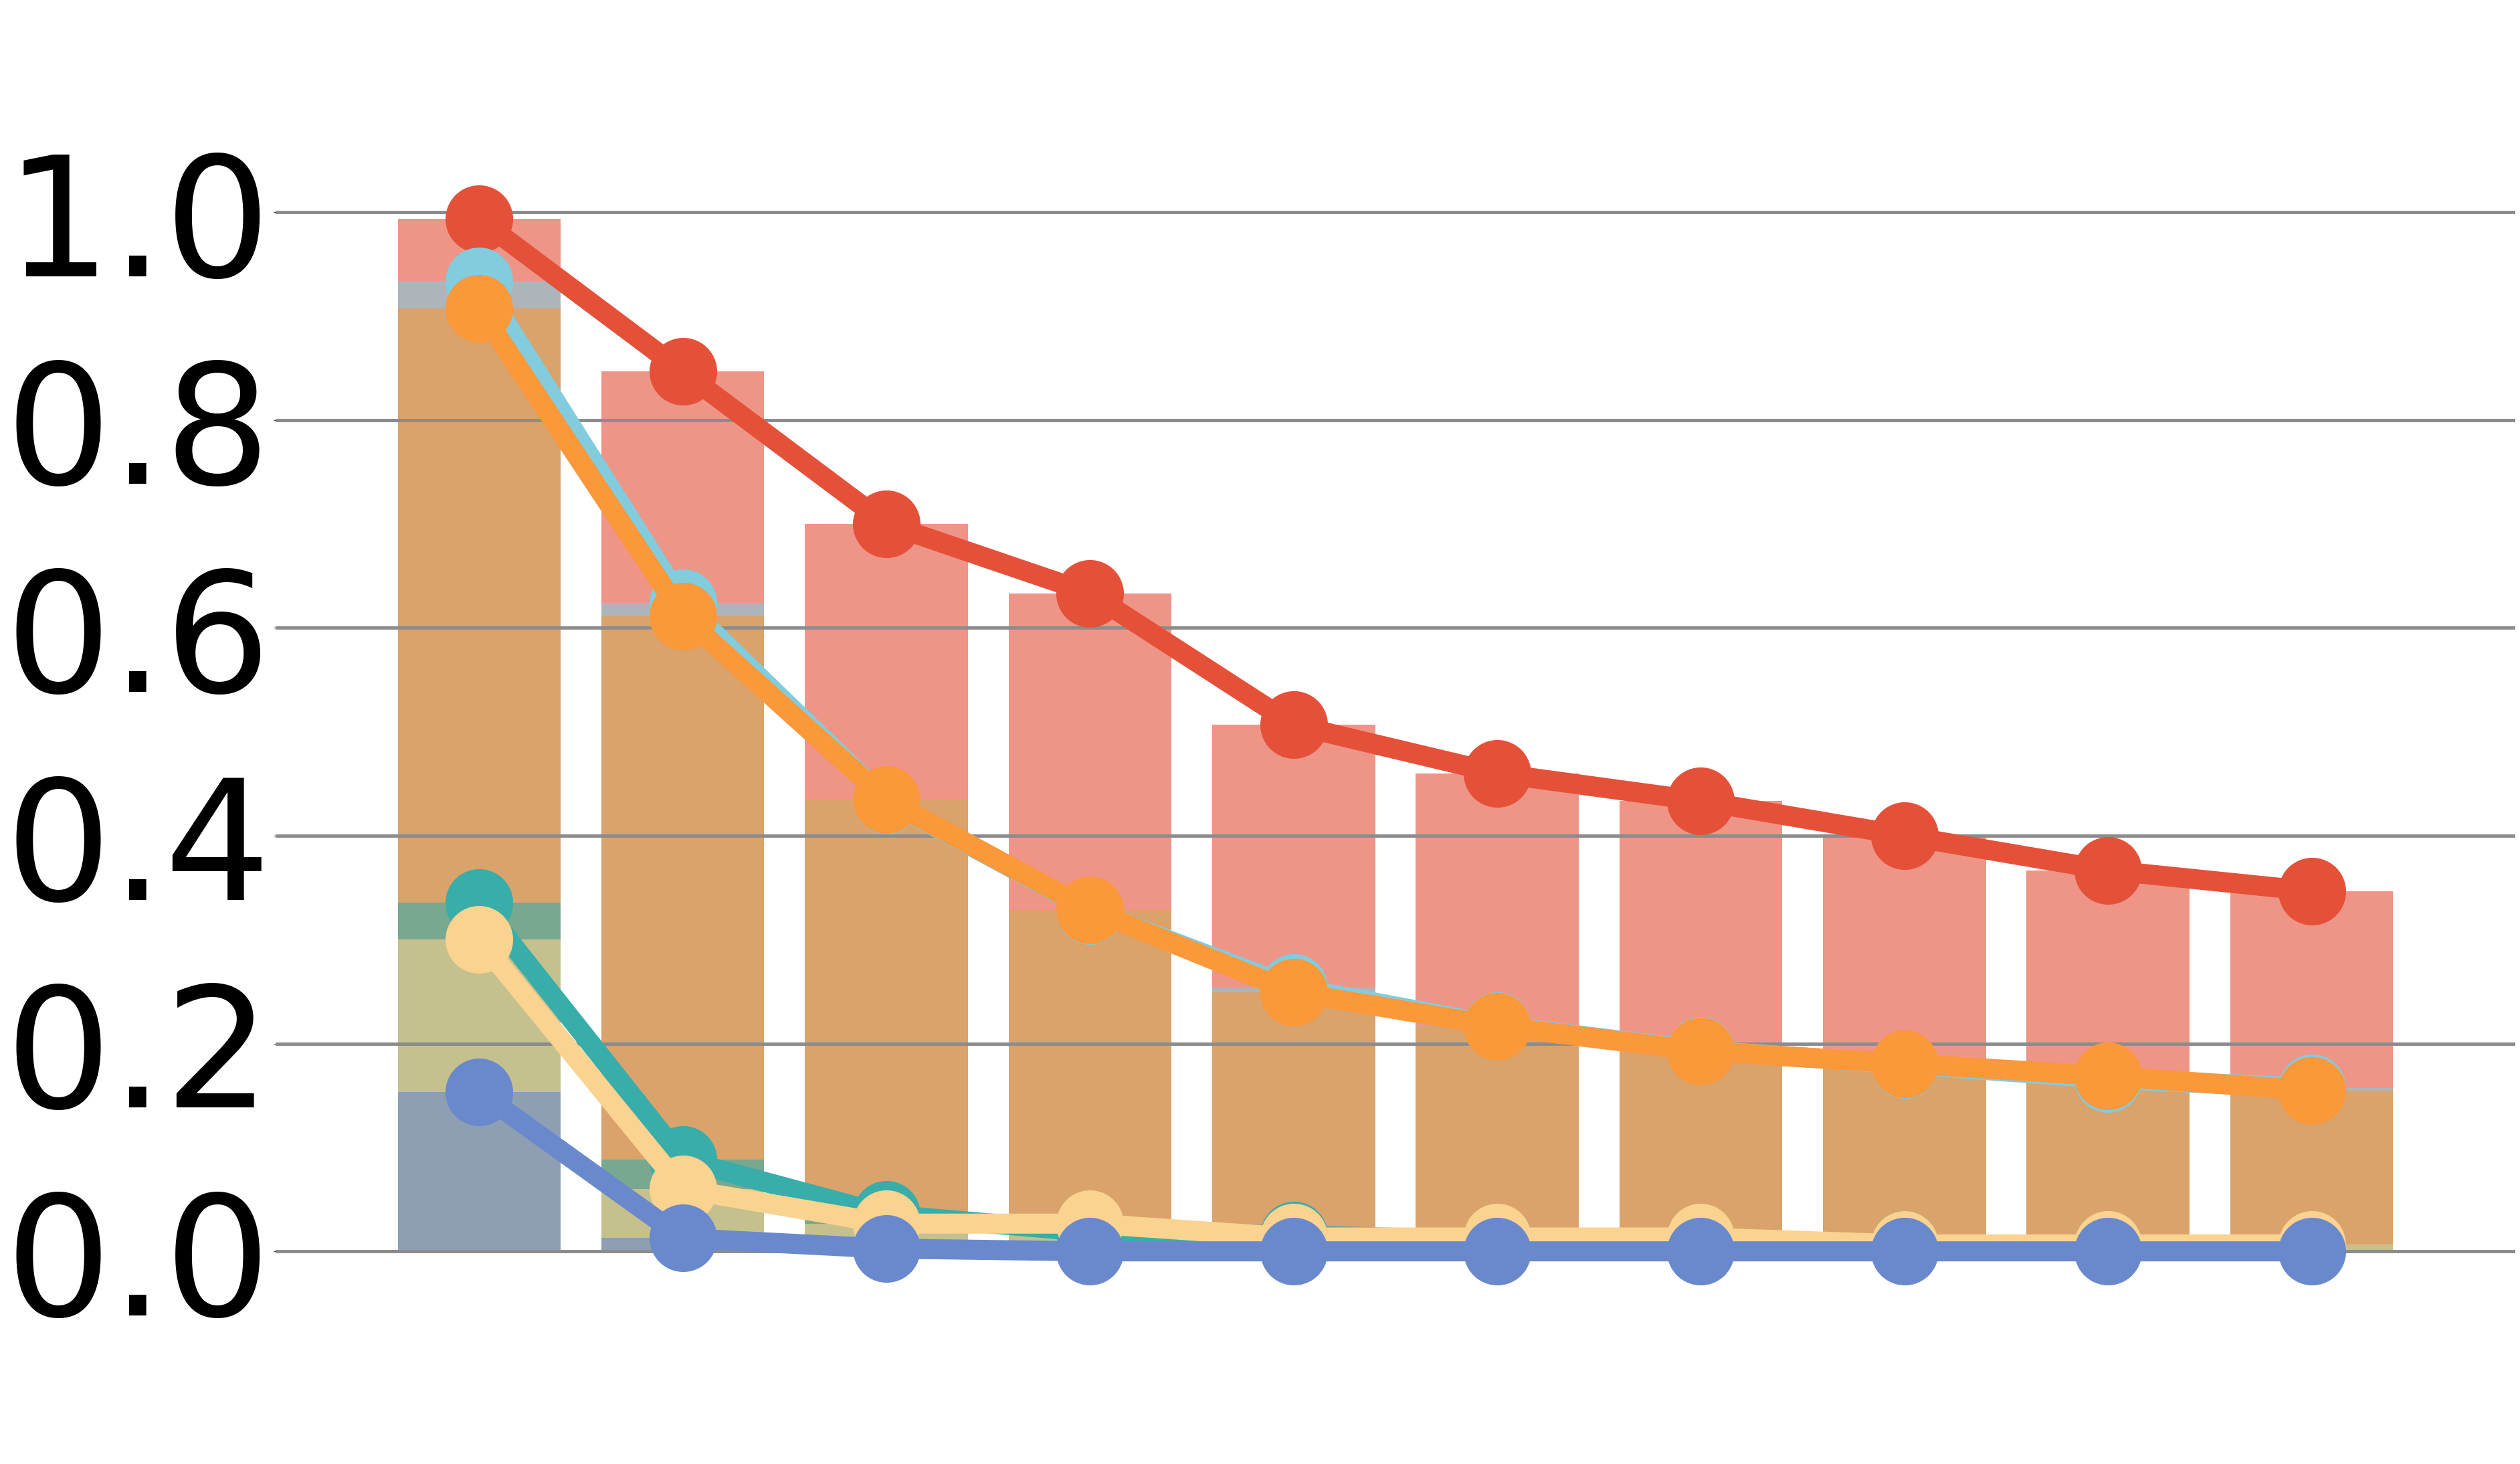

BLADDER
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[150. 143. 131. 121. 108.  90.  66.  53.  45.  42.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[30. 14.  7.  4.  3.  2.  2.  2.  2.  2.]
thresholds  [ 1  2  3  4  5  6  7  8  9 10]
P-values dataframe  (150, 1077)
[31. 12.  5.  2.  2.  2.  2.  1.  1.  0.]
P-values dataframe  (150, 1077)
[31. 13.  5.  1.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[32. 11.  4.  2.  2.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[32. 11.  4.  1.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[34. 12.  6.  2.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[39. 12.  5.  1.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[39. 13.  6.  2.  2.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[31. 12.  4.  1.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[39. 11.  5.  1.  1.  1.  1.  0.  0.  0.]
P-values dataframe  (150, 1077)
[33.

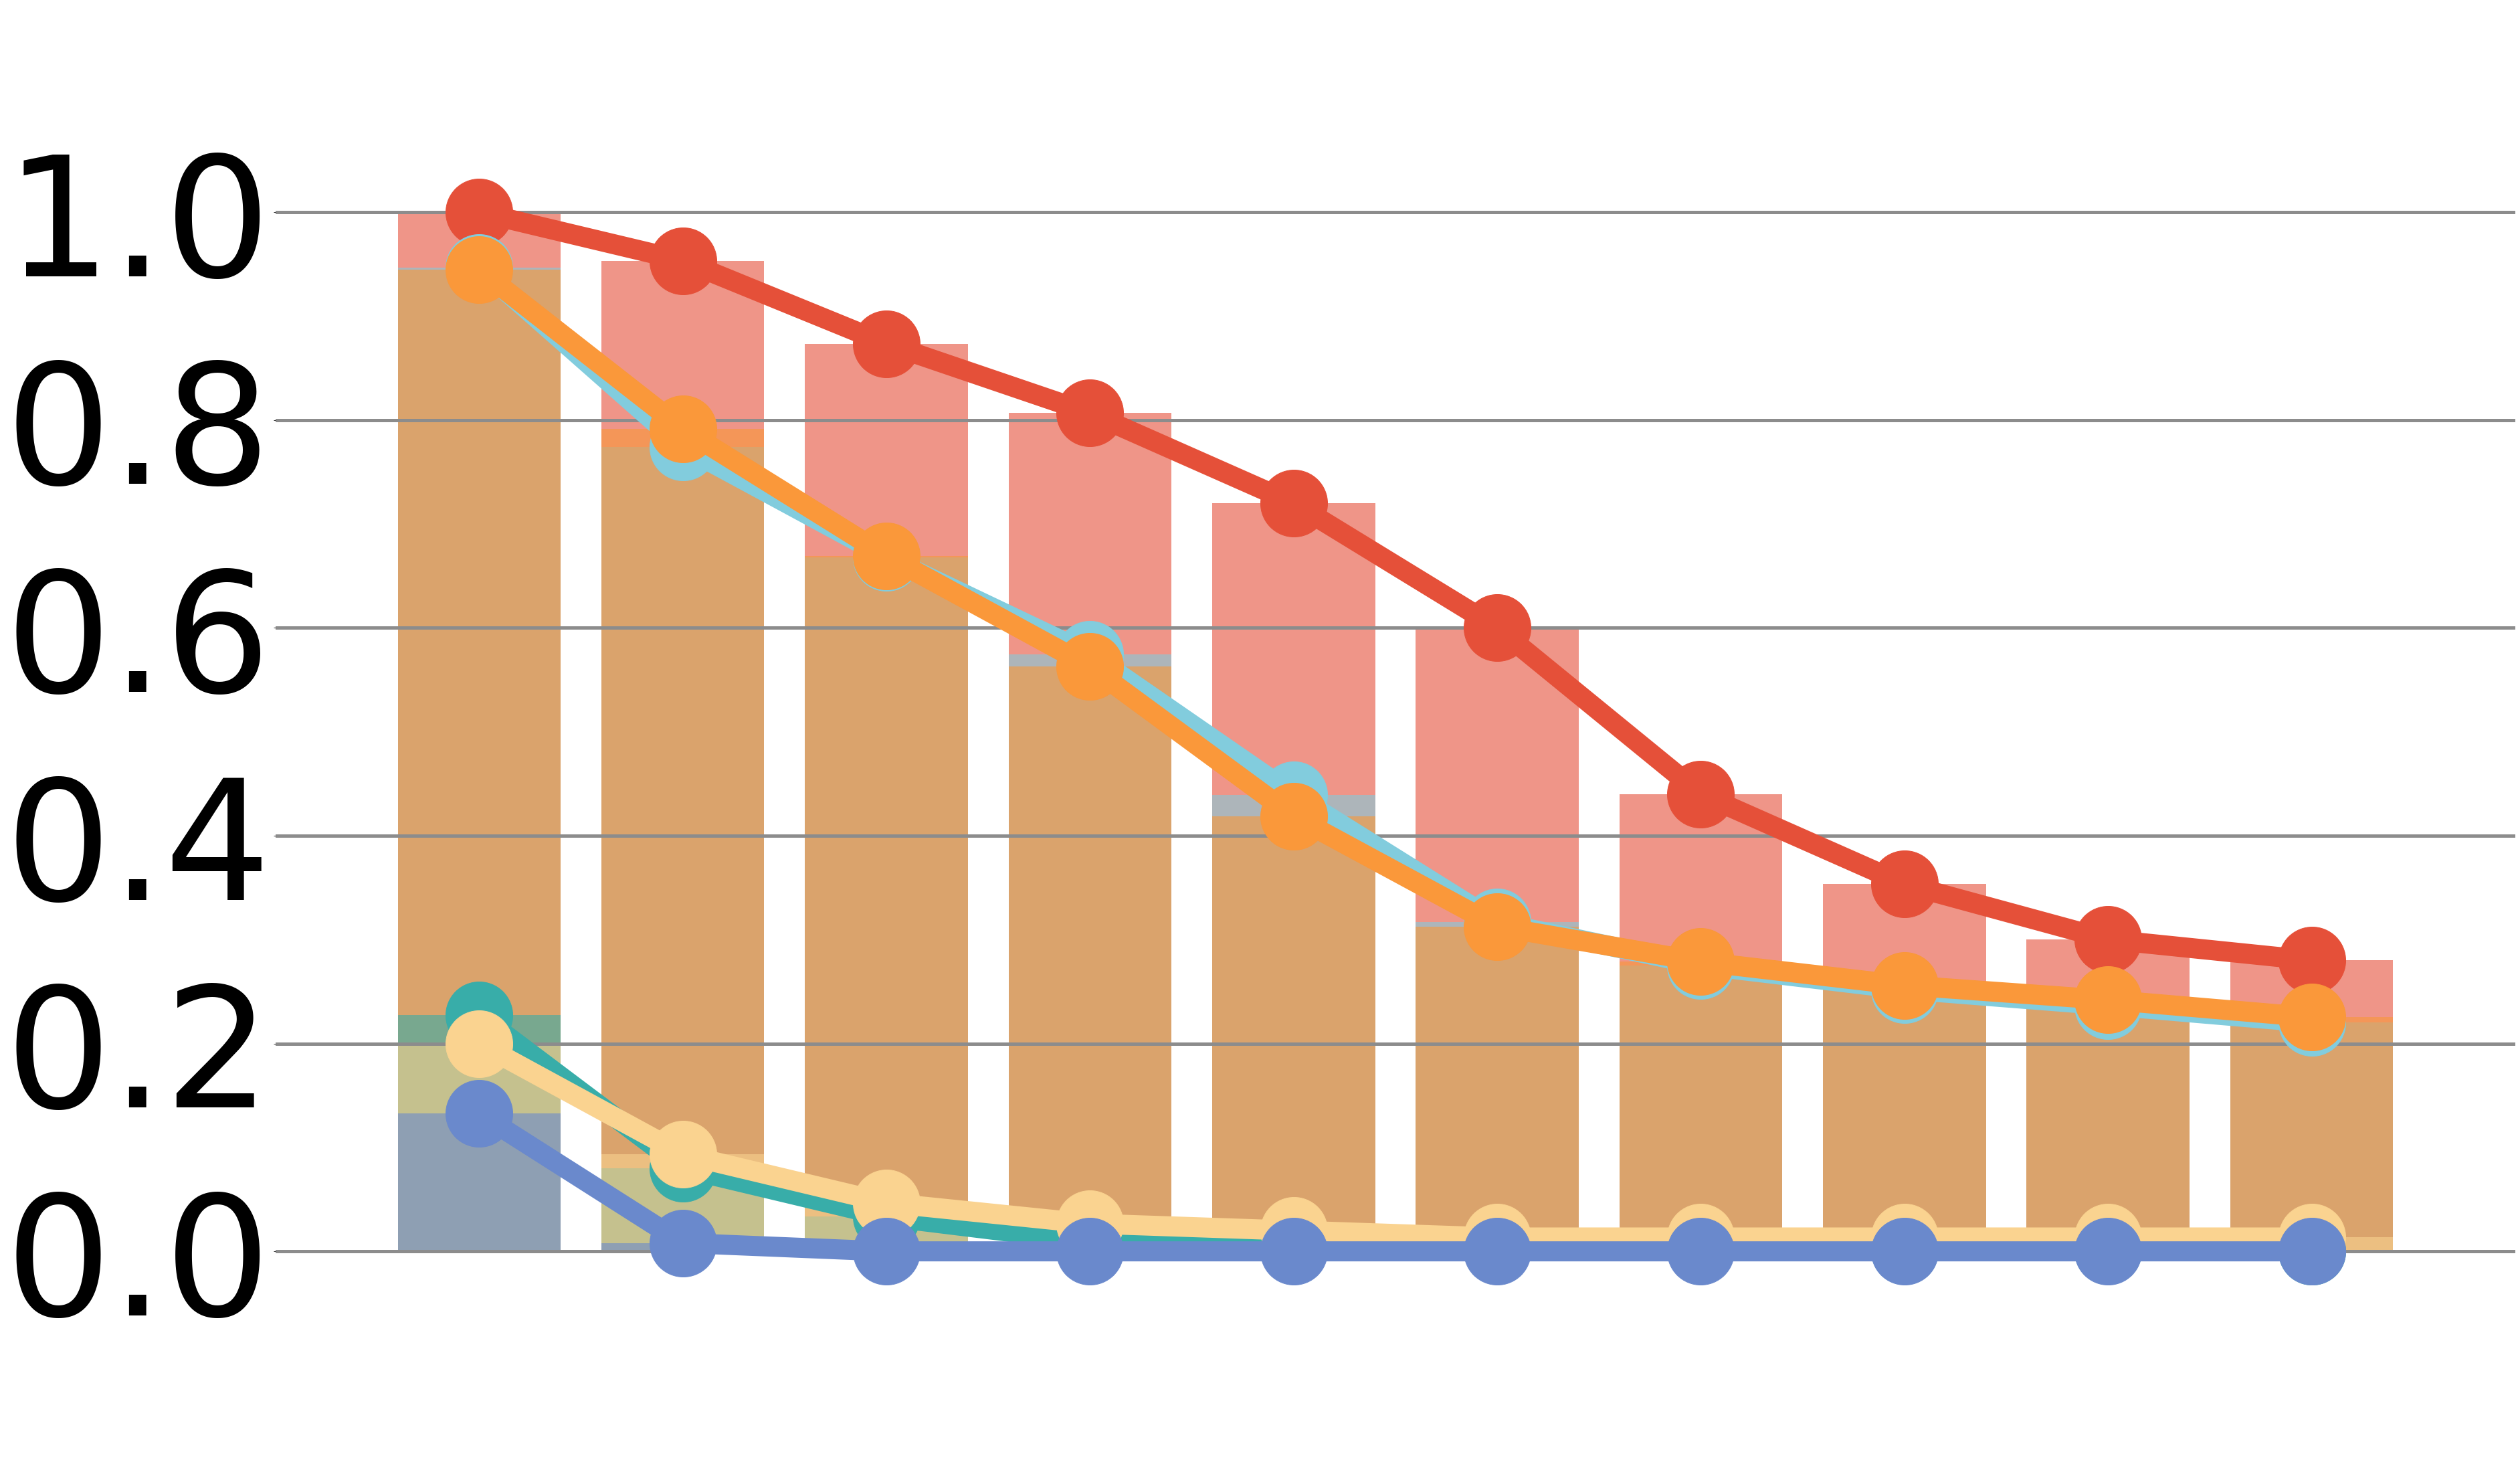

In [5]:
for cancer in cancer_types:
    print(cancer)
    createPlot(cancer)